# Описание проекта
**Проект "Телеком — Определение неэффективных операторов"**

**Задача**: Разработка методологии выявления неэффективных операторов колл-центров *(Помогите «Нупозвони» найти самых неэффективных операторов)*

Признаки низкой эффективности:
- много пропущенных входящих вызовов,
- долгое ожидания ответа при входящих внешних вызовах,
- мало исходящих вывозов — в случае тех колл-центров, что специализируются на обзвонах, а не обработке входящих звонков.

**План исследования.**
1. Загрузить данные и изучить общую информацию.
2. Выполнить предобработку данных:
    - поиск и обработка пропущенных значений;
    - изменение типов данных;
    - поиск и обработка дубликатов;
    - создание дополнительных столбцов;
    - проверка на корректность данных.
3. Провести анализ данных:
    - рассмотреть и исследовать данные о колл-центрах (в том числе данные по статистикам звонков, длительности звонков);
    - рассмотреть и исследовать данные об операторах (в том числе данные по статистикам звонков в день на одного оператора).
4. Определить критерии (показатели) неэффетиктивности операторов:
    - по направлению входящих звонков (пропущенные звонки, длительность звонков, доля входящих звонков от всех звонков колл-центра, специализирующего на приёме звонков);
    - по направлению исходящих звонков (внутренние звонки, длительность звонков, доля исходящих звонков от всех звонков колл-центра, специализирующего на обзвоне клиентов).
    - определить неэффективных операторов по каждому направлению (входящие/исходящие звонки).
5. Проверить статистические гипотезы:
    - среднее время ожидания у клиентов не зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип);
    - доля пропущенных входящих звонков не зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип).
6. Подготовить презентацию.

# Загрузка данных и общая информация о них.

Сначала импортируем необходимые библиотеки.

In [1]:
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import numpy as np
from plotly import graph_objects as go
import plotly.express as px
import scipy.stats as stats
import math as mth
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

#для размещения графиков посередины страницы
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

pd.options.mode.chained_assignment = None

## Датасет telecom_dataset.csv.

Уточняем символ-разделитель, предварительно открыв файл в текстовом редакторе (разделитель запятая ','). Считываем файл и сохраняем его в переменную.

In [2]:
try:
    dataset_original = pd.read_csv('....csv', sep=',')
except:
    dataset_original = pd.read_csv('....csv', sep=',')
        
#создадим копию исходного датасета и будем работать в дальнейшем с ней
dataset = dataset_original.copy()

С помощью метода info() посмотрим общую информацию о датасете.

In [3]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


Как видно из полученных общих сведениях о датасете:

- в датасете содержится 53 902 строки;
- в части столбцов присутствуют не все данные (есть пропуски) (столбцы "internal", "operator_id");
- в части столбцов типы данных не соответствуют содержимому столбцов (столбцы "date" (необходимо не object, а date), "internal (необходимо не object, а bool), "operator_id" (необходимо не float64, а int)).

## Датасет  telecom_clients.csv.

Уточняем символ-разделитель, предварительно открыв файл в текстовом редакторе (разделитель запятая ','). Считываем файл и сохраняем его в переменную.

In [4]:
try:
    clients_original = pd.read_csv('C:/Users/User/Downloads/telecom_clients.csv', sep=',')
except:
    clients_original = pd.read_csv('....csv', sep=',')
        
#создадим копию исходного датасета и будем работать в дальнейшем с ней
clients = clients_original.copy()

С помощью метода info() посмотрим общую информацию о датасете.

In [5]:
display(clients.head())
clients.info()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


Как видно из полученных общих сведениях о датасете:

- в датасете содержится 732 строки;
- пропуски отсутствуют;
- типы данных не соответствуют содержимому в столбце "date_start" (необходимо не object, а date).

## Вывод по пункту 2.

Файлы с данными прочитаны и сохранены в переменные.

1. Датасет telecom_dataset.csv.

    Всего в датасете содержится почти 54 тысячи строк, часть данных пропущена, в части столбцов типы данных не соответствуют содержимому.


2. Датасет telecom_clients.csv.

    Всего в датасете содержится почти 700 строк, пропусков в данных нет, в одном столбце тип данных не соответствует содержимому.

# Предобработка данных.

## Работа с пропущенными значениями.

### Датасет telecom_dataset.csv.

Сначала напишем функцию, которая отображает количество и долю пропущенных значений.

In [6]:
def count_isna(table):
    """Функция для подсчёта количества пропущенных значений в датасете"""
    table_isna = table.isna().sum()
    table_isna = table_isna.loc[table_isna != 0]
    table_isna = pd.DataFrame(table_isna)
    table_isna['ratio'] = table_isna[0] / len(table)
    table_isna.columns = ['количество пропусков', 'доля пропусков']
    table_isna.index.names = ['столбцы']


    return (table_isna
            .style
            .format('{0:,.0f}', subset='количество пропусков')
            .format('{0:,.2%}', subset='доля пропусков').background_gradient(subset='доля пропусков', cmap='Blues')
            .set_caption('Количество пропусков <br> в датасете')
            .set_table_styles([{'selector': 'caption', 
                                'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                               }])
           )

In [7]:
count_isna(dataset)

,количество пропусков,доля пропусков
столбцы,,
internal,117,0.22%
operator_id,"8,172",15.16%


В датасете telecom_dataset.csv пропущенные значения выявлены в столбцах:
- "internal" (является ли звонок внутренним звонком между операторами клиента) - менее 1% от общего количества строк датасета;
- "operator_id" (идентификатор оператора) - более 15%.

Заполнение пропусков в рассматриваемых столбцах на основании данных из других столбцов не представляется возможным (иные данные никак не указывают ни прямо, ни косвенно на то, какие данные должны быть в рассматриваемых столбцах).

Кроме того, заполнение пропусков в столбце "operator_id", например нулями, может повлиять на проведение в дальнейшем расчётов (например, подсчёт количества операторов методом count). Тажке отсутствие данных об операторе может являться следствием или особенности работы колл-центров (автоматическая система распределения звонков не успела назначить оператора до того, как звонок прервался), или наличием технических ошибок при сборе данных о работе колл-центров. В то же время, удаление 15% строк от общего количества строк датасета скорее всего повлияет на само исследование и его выводы.

Доля пропусков в столбце "internal" составляют менее 1%, следовательно, не могут оказать значительного влияния на результаты исследования данных. Таким образом, представляется целесообразным удаление таких строк.

In [8]:
def drop_rows(table, list_drop, table_original):
    """Функция для удаления строк по индексам"""
    count_rows_original = table_original.shape[0]
    count_rows_start = table.shape[0]
    print('Изначальное количество строк в датасете: ', '{0:,}'.format(count_rows_start).replace(',', ' '))
    table = table.drop(index=list_drop).reset_index(drop=True)
    count_rows_after = table.shape[0]
    print('-' * 80)
    print('Количество удалённых строк: ', '{0:,}'.format(count_rows_start - count_rows_after).replace(',', ' '))
    print('Доля удалённых строк: ', '{0:.2%}'.format((count_rows_start - count_rows_after)/count_rows_original))
    print('-' * 80)
    print('Количество строк после удаления: ', '{0:,}'.format(count_rows_after).replace(',', ' '))
    
    return table

In [9]:
#сначала создадим список с индексами строк, которые надо удалить
dataset_isna_internal = dataset.loc[dataset['internal'].isna()]
list_index_skip_internal = dataset_isna_internal.index.tolist()
dataset = drop_rows(dataset, list_index_skip_internal, dataset_original)

Изначальное количество строк в датасете:  53 902
--------------------------------------------------------------------------------
Количество удалённых строк:  117
Доля удалённых строк:  0.22%
--------------------------------------------------------------------------------
Количество строк после удаления:  53 785


### Датасет telecom_clients.csv.

Пропуски в данных отсутствуют.

## Изменение типов данных.

### Датасет telecom_dataset.csv.

Ещё раз посмотрим, какие типы данных присутствуют в столбцах датасета.

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53785 entries, 0 to 53784
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53785 non-null  int64  
 1   date                 53785 non-null  object 
 2   direction            53785 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45670 non-null  float64
 5   is_missed_call       53785 non-null  bool   
 6   calls_count          53785 non-null  int64  
 7   call_duration        53785 non-null  int64  
 8   total_call_duration  53785 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


Таким образом, необxодимо изменить типы данных в следующих столбцах:
   1) "date" (необходимо не object, а date);
   
   2) "internal" (необходимо не object, а bool);
   
   3) "operator_id" (необходимо не float64, а int).
   
При этом, изменить тип данных в столбце "operator_id" не представляется возможным, так как есть пропуски в данных. Заполнение таких пропусков, например нулями, может повлиять на проведение в дальнейшем расчётов (например, подсчёт количества операторов методом count).

In [11]:
#изменили тип данных с object на date
dataset['date'] = pd.to_datetime(dataset['date']).dt.tz_localize(None)
dataset['internal'] = dataset['internal'].astype(bool)
display(dataset.sample(n = 5, random_state = 5))
print('Тип данных в столбце "date"', dataset['date'].dtype, '.')
print('Тип данных в столбце "internal"', dataset['internal'].dtype, '.')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
849,166405,2019-09-02,in,False,882686.0,False,12,2652,2762
48769,168187,2019-11-18,in,False,937782.0,False,2,544,565
50648,168252,2019-11-22,in,False,940634.0,False,19,2448,2697
3272,166485,2019-10-18,out,True,NaN,True,3,0,11
45952,168091,2019-11-14,out,True,958478.0,False,1,54,57


Тип данных в столбце "date" datetime64[ns] .
Тип данных в столбце "internal" bool .


### Датасет telecom_clients.csv.

Ещё раз посмотрим, какие типы данных присутствуют в столбцах датасета.

In [12]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


Таким образом, необxодимо изменить тип данных в столбце "date_start" (необходимо не object, а date).

In [13]:
#изменили тип данных с object на date
clients['date_start'] = pd.to_datetime(clients['date_start'])
display(clients.sample(5))
print('Тип данных в столбце "date_start"', clients['date_start'].dtype, '.')

,user_id,tariff_plan,date_start
626,167869,B,2019-10-03
91,168350,C,2019-10-22
597,167115,B,2019-09-02
221,167027,C,2019-08-28
608,166956,B,2019-08-26


Тип данных в столбце "date_start" datetime64[ns] .


## Проверка на дубликаты.

### Датасет telecom_dataset.csv.

In [14]:
print('Количество явных дубликатов', '{0:,}'.format(dataset.duplicated().sum()).replace(',', ' '), 'дубликатов')
print('Доля дубликатов от общего количества строк датасета', '{0:.2%}'.format(dataset.duplicated().sum() / len(dataset)))

Количество явных дубликатов 4 893 дубликатов
Доля дубликатов от общего количества строк датасета 9.10%


Удалим явные дубликаты.

In [15]:
def drop_duplicates_rows(table, table_original):
    """Функция для удаления дублирующих строк"""
    count_rows_original = table_original.shape[0]
    count_rows_start = table.shape[0]
    print('Изначальное количество строк в датасете: ', '{0:,}'.format(count_rows_original).replace(',', ' '))
    table = table.drop_duplicates().reset_index(drop=True)
    count_rows_after = table.shape[0]
    print('-' * 80)
    print('Количество удалённых строк: ', '{0:,}'.format(count_rows_start - count_rows_after).replace(',', ' '))
    print('Доля удалённых строк: ', '{0:.2%}'.format((count_rows_start - count_rows_after)/count_rows_original))
    print('-' * 80)
    print('Количество строк после удаления: ', '{0:,}'.format(count_rows_after).replace(',', ' '))
    
    return table

In [16]:
dataset = drop_duplicates_rows(dataset, dataset_original)

Изначальное количество строк в датасете:  53 902
--------------------------------------------------------------------------------
Количество удалённых строк:  4 893
Доля удалённых строк:  9.08%
--------------------------------------------------------------------------------
Количество строк после удаления:  48 892


В датасете telecom_dataset.csv отображены данные по каждому оператору в разрезе дат, при этом в рамках одной даты идёт разделение данных по следующим столбцам (уникальные комбинации рассматриваемых критериев):
- идентификатор клиентского аккаунта колл-центра в сервисе (столбец "user_id");
- дата статистики (столбец "date");
- направление звонка (столбец "direction");
- метка, что звонок внутренний (столбец "internal");
- идентификатор оператора (столбец "operator_id");
- метка, пропущенный звонок или нет (столбец "is_missed_call").

Посмотрим, есть ли дубликаты по уникальным комбинациям описанных выше критериев.

In [17]:
print('Количество неявных дубликатов в датасете telecom_dataset.csv',\
      dataset.duplicated(['user_id', 'date', 'direction', 'internal', 'operator_id', 'is_missed_call']).sum(),\
     'дубликатов.')

Количество неявных дубликатов в датасете telecom_dataset.csv 0 дубликатов.


### Датасет telecom_clients.csv.

In [18]:
print('Количество явных дубликатов', clients.duplicated().sum(), 'дубликатов')
print('Доля дубликатов от общего количества строк датасета', '{0:.2%}'.format(clients.duplicated().sum() / len(clients)))

Количество явных дубликатов 0 дубликатов
Доля дубликатов от общего количества строк датасета 0.00%


## Добавление столбцов со средней длительностью звонка.

Для дальнейших расчётов при исследовании данных добавим столбцы:
- со средней длитительностью одного звонка;
- со временем ожидания;
- со средней длительностью ожидания одного звонка.

In [19]:
dataset['one_call_duration'] = (dataset['call_duration'] / dataset['calls_count']).astype(int)
dataset['waiting_duration'] = dataset['total_call_duration'] - dataset['call_duration']
dataset['one_waiting_duration'] = (dataset['waiting_duration'] / dataset['calls_count']).astype(int)

Сразу проверим, как прошло добавление столбцов.

In [20]:
dataset.head(3)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,one_call_duration,waiting_duration,one_waiting_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4,0,4,2
1,166377,2019-08-05,out,True,880022.0,True,3,0,5,0,5,1
2,166377,2019-08-05,out,True,880020.0,True,1,0,1,0,1,1


## Проверка на корретность данных в датасетах.

### Проверка на совпадание временных периодов в датасетах.

In [21]:
def times_period(column, name):
    """Функция для нахождения минимальной и максимальной даты в датасете"""
    print('Минимальная дата в датасете', name, column.min())
    print('Максимальная дата в датасете', name, column.max())

In [22]:
times_period(dataset['date'].dt.date, 'telecom_dataset.csv')
print('-' * 80)
times_period(clients['date_start'].dt.date, 'clients_dataset.csv')

Минимальная дата в датасете telecom_dataset.csv 2019-08-02
Максимальная дата в датасете telecom_dataset.csv 2019-11-28
--------------------------------------------------------------------------------
Минимальная дата в датасете clients_dataset.csv 2019-08-01
Максимальная дата в датасете clients_dataset.csv 2019-10-31


Таким образом, данные по временным периодам в датасетах совпадают: с августа по ноябрь включительно.

Так, данные о звонках за период с августа по ноябрь включительно. Данные о клиентах-колл-центрах (дата регистрации клиента в сервисе) в период с августа по октябрь.

### Нулевая длительность звонка у пропущенных звонков (датасет telecom_dataset.csv).

Проверим, что у пропущенных звонков (столбец "is_missed_call") проставлена нулевая длительность звонка.

In [23]:
dataset_is_missed_call = dataset.loc[(dataset['is_missed_call'] == True)&(dataset['call_duration'] != 0)]
display(dataset_is_missed_call.sample(3))
print('Количество выявленных строк', len(dataset_is_missed_call))

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,one_call_duration,waiting_duration,one_waiting_duration
41416,168062,2019-11-28,in,False,951508.0,True,1,72,99,72,27,27
45939,168252,2019-11-19,in,False,940622.0,True,1,175,177,175,2,2
11811,166782,2019-10-07,in,False,899250.0,True,1,1,8,1,7,7


Количество выявленных строк 295


Скорее всего, в рассматриваемых 295 строках неверно заполнен столбец "is_missed_call": вместо True должно быть False. Произведём замену и сразу проверим её корректность.

In [24]:
index_list_is_missed_call = dataset_is_missed_call.index.tolist()

for i in index_list_is_missed_call:
    dataset['is_missed_call'][i] = False

print('Количество строк, в которых у пропущенных звонков стоит отличная от нуля длительность звонка, составляет:',\
      len(dataset.loc[(dataset['is_missed_call'] == True)&(dataset['call_duration'] != 0)]), 'строк.')

Количество строк, в которых у пропущенных звонков стоит отличная от нуля длительность звонка, составляет: 0 строк.


Замены произведены корректно, строки, в которых у пропущенных звонков стоит отличная от нуля длительность звонка отсутствуют.

### Аномально высокое количество звонков одного оператора в один день (датасет telecom_dataset.csv).

Посмотрим наибольшее количество звонков одного оператора в один день.

In [25]:
operators_amont_calls = dataset.groupby(['operator_id', 'date']).agg({'calls_count':'sum'})\
                               .sort_values(by='calls_count', ascending=False)

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исзодном датасете
operators_amont_calls_1 = operators_amont_calls.reset_index()
operators_amont_calls_1.columns = ['идентификатор оператора', 'дата', 'количество звонков']
(operators_amont_calls_1.head(3)
 .style
 .format('{0:.0f}', subset='идентификатор оператора')
 .format(lambda s: s.strftime("%Y-%m-%d"), subset='дата')
 .format('{0:,.0f}', subset='количество звонков')
 .set_caption('Аномально высокие суммарные значения звонков одного оператора <br> в один день')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,идентификатор оператора,дата,количество звонков
0,929428,2019-11-11,"5,022"
1,885876,2019-10-01,"2,767"
2,929428,2019-10-31,"2,730"


На сайте beeline.ru (https://b2blog.beeline.ru/call-centr-dlia-vhodiashchikh-zvonkov/) размещена статья "Call-центр для входящих звонков. Кому нужен и как организовать", в которой указано, что "в среднем один оператор за смену обрабатывает 160–200 вызовов".

Значит, возможно, взять за верхнюю границу количества совершаемых/принимаемых оператором звонков в день значение в 300 звонков (получается, что при двенадцати часовом рабочем дне оператор совершает в час 25 звонков). Также примем, что рабочий день оператора длится 12 часов (сменный график работы, чтобы обеспечить постоянную возможность клиентам получить необходимую им информацию).

In [26]:
operators_big_amont_calls_300 = operators_amont_calls.loc[operators_amont_calls['calls_count'] > 300].reset_index()
print('Количество операторов, у которых в день более 300 звонков, составляет',\
      operators_big_amont_calls_300['operator_id'].nunique(), 'операторов.')

Количество операторов, у которых в день более 300 звонков, составляет 14 операторов.


Теперь посмотрим, какое количество строк (записей) приходится на рассматриваемых операторов.

In [27]:
#создадим списки с айди операторов и с датами, в которые у этих операторов более 300 звонков
list_operators_big_amount_calls_300 = operators_big_amont_calls_300['operator_id'].unique().tolist()
operators_big_amount_calls_dataset_300 = dataset.query('operator_id in @list_operators_big_amount_calls_300')

print('Всего записей по операторам, которые в день совершают более 300 звонков составляет',\
      '{0:,}'.format(len(operators_big_amount_calls_dataset_300)).replace(',', ' '), 'строки или',\
                     round(len(operators_big_amount_calls_dataset_300)/dataset_original.shape[0]*100, 2),\
      '% от исходного объёма датасета.')

Всего записей по операторам, которые в день совершают более 300 звонков составляет 1 242 строки или 2.3 % от исходного объёма датасета.


Так как рассматриваемое количество звонков окажет влияние на исследование и выводы по его результатам, представляется целесообразным удаление соответствующих строк датасета.

In [28]:
#сначала создадим список с индексами строк, которые надо удалить
list_mistakes_amount_calls = operators_big_amount_calls_dataset_300.index.tolist()
dataset = drop_rows(dataset, list_mistakes_amount_calls, dataset_original)

Изначальное количество строк в датасете:  48 892
--------------------------------------------------------------------------------
Количество удалённых строк:  1 242
Доля удалённых строк:  2.30%
--------------------------------------------------------------------------------
Количество строк после удаления:  47 650


### Аномально высокая суммарная длительность звонков одного оператора в один день (датасет telecom_dataset.csv).

Так как в пункте 3.4.3 приняли, что рабочий день оператора составляет 12 часов, следовательно, суммарная длительность звонков в день у оператора не может превышать 43 200 секунд.

In [29]:
operators_duration_calls = dataset.groupby(['operator_id', 'date']).agg({'call_duration':'sum'})\
                                   .sort_values(by='call_duration', ascending=False)
print('Маскимальная длительность звонков в день у одного оператора составляет',\
      '{0:,}'.format(operators_duration_calls['call_duration'].max()).replace(',', ' '), 'секунд.')

Маскимальная длительность звонков в день у одного оператора составляет 25 153 секунд.


Таким образом, аномально высокой суммарной длительности звонков одного оператора в один день не выявлено.

### Аномально высокая длительность одного звонка одного оператора в один день (датасет telecom_dataset.csv).

In [30]:
operators_duration_one_call = dataset.sort_values(by='one_call_duration', ascending=False)
operators_duration_one_call['one_call_duration_hours'] = round(operators_duration_one_call['one_call_duration'] / 3600, 0)
operators_duration_one_call['one_call_duration_minutes'] = round(operators_duration_one_call['one_call_duration'] / 60, 0)

temp_operators_duration_one_call = operators_duration_one_call['one_call_duration_minutes'].max()
print('Максимальная длительность одного звонка составляет', temp_operators_duration_one_call,\
     'минут.')
print('Количество звонков с максимальной длительностью составляет',\
      len(operators_duration_one_call.query('one_call_duration_minutes == @temp_operators_duration_one_call')), 'звонок.')

Максимальная длительность одного звонка составляет 59.0 минут.
Количество звонков с максимальной длительностью составляет 1 звонок.


В пункте 3.4.3 рассчитали, что при двенадцати часовом рабочем дне оператор совершает в час 25 звонков. Следовательно, оптимальная длительность одного звонка составляет 2,4 минуты или 144 секунды. Посмотрим сколько звонков длительностью свыше оптимальной.

In [31]:
print('Количество звонков длительностью выше оптимальной составляет',\
      '{0:,}'.format(operators_duration_one_call.query('one_call_duration > 144')['calls_count'].sum()).replace(',', ' '),\
      'звонков или', round(operators_duration_one_call.query('one_call_duration > 144')['calls_count'].sum()/\
                           operators_duration_one_call['calls_count'].sum(), 2)*100, '%.')

Количество звонков длительностью выше оптимальной составляет 51 143 звонков или 9.0 %.


Доля рассматриваемых звонков от всех звонков составляет менее 10%. Скорее всего, это неординарные случаи, требующие детального работы со стороны оператора, чем и обусловлена длительность звонков выше оптимальной.

С учётом того, что в пункте 3.4.4 случаи аномально высокой суммарной длительности звонков одного оператора в один день не выявлено, будем относить рассматриваемые 10% звонков к вариантам нормы.

## Вывод по пункту 3.

1. **Пропущенные значения.**
    В датасете telecom_dataset.csv пропущенные значения выявлены в столбцах:
    - "internal" (является ли звонок внутренним звонком между операторами клиента) - менее 1% от общего количества строк датасета;
    - "operator_id" (идентификатор оператора) - более 15%.
    Заполнение пропусков в рассматриваемых столбцах на основании данных из других столбцов не представляется возможным.

    Кроме того, заполнение пропусков в столбце "operator_id", например нулями, может повлиять на проведение в дальнейшем расчётов (например, подсчёт количества операторов методом count). Тажке отсутствие данных об операторе может являться следствием или особенности работы колл-центров (автоматическая система распределения звонков не успела назначить оператора до того, как звонок прервался), или наличием технических ошибок при сборе данных о работе колл-центров.
    
    Доля пропусков в столбце "internal" составляют менее 1%, следовательно, их удаление не может оказать значительного влияния на результаты исследования данных. Рассматриваемые 117 строк удалены. В датасете осталось 54 тысячи строк.
    
    В датасете telecom_clients.csv пропуски в данных отсутствуют.

2. **Типы данных.**
    В датасете telecom_dataset.csv изменены типы данных в столбцах:
    - "date" (с object на date);
    - "internal" (с object на bool).
    При этом, изменить тип данных в столбце "operator_id" (с float на integer) не представляется возможным, так как есть пропуски в данных. Заполнение таких пропусков, например нулями, может повлиять на проведение в дальнейшем расчётов (например, подсчёт количества операторов методом count).

    В датасете telecom_clients.csv изменёны тип данных в столбце "date_start" (с object на date).

3. **Дубликаты.**
    В датасете telecom_dataset.csv:
    - выявлены и удалены явные дубликаты (4 900 дубликатов или 9% от общего количества строк датасета);
    - неявные дубликаты отсутствуют.   

    Таким образом, в датасете осталось 49 тысяч строк.
    
    В датасете telecom_clients.csv дубликаты отсутствуют.
    
4. **Корректность данных.**
    - проведена проверка на совпадание временных периодов в датасетах: данные совпадают (с августа по ноябрь включительно);
    - выявлены строки, в которых у пропущенных звонков содержится ненулевой длительность (без учёта времени ожидания) (датасет telecom_dataset.csv), - всего 296 или менее 1% от общего количества строк датасета, в рассматриваемых строках произведена замена данных (флаг) о пропущенных звонках;
    - выявлены операторы (14 человек) с аномально высоким (ошибочным) количеством звонков в один день, соответствующие строки удалены (всего 1 242 строк или 2% от общего количества строк датасета);
    - аномально высокая суммарная длительность звонков одного оператора в один день не выявлена;
    - аномально высокая длительность одного звонка одного оператора в один день не выявлена (доля звонков длительностью выше оптимальной (2,4 минуты или 144 секунды) от всех звонков составляет менее 10%, скорее всего, это неординарные случаи, требующие детального работы со стороны оператора, чем и обусловлена длительность звонков выше оптимальной).
    
5. **Добавление столбцов.**
    Для дальнейших расчётов при исследовании данных добавлены столбцы:
    - со средней длитительностью одного звонка;
    - со временем ожидания;
    - со средней длительностью ожидания одного звонка.
    
6. **Количество строк исходного датасета после удаления части данных.**
    После удаления данных (пропущенные значения, дубликаты, ошибки в данных) в датасете осталось почти 48 тысяч строк (47 650), так всего суммарно удалено 6 тысяч строк (6 252) или почти 12% (11,6%) строк исходного датасета.

# Исследовательский анализ данных.

## Данные о колл-центрах.

### Количество колл-центров.

In [32]:
print('Количество колл-центров в датасете telecom_dataset.csv', dataset['user_id'].nunique())
print('Количество колл-центров в датасете telecom_clients.csv', clients['user_id'].nunique())

Количество колл-центров в датасете telecom_dataset.csv 307
Количество колл-центров в датасете telecom_clients.csv 732


Таким образом, дальнейшее исследование будем проводить в отношении 307 колл-центров, так как именно по ним есть данные о работе операторов. Следовательно, подготовим таблицу на основе датасета telecom_clients.csv, в которую включим рассматриваемых 307 колл-центров.

In [33]:
list_clients = dataset['user_id'].unique().tolist()
clients_general = clients.query('user_id in @list_clients')

#также сформируем отдельную таблицу с колл-центрами, по которым нет данных о работе операторов
clients_not_general = clients.query('user_id not in @list_clients')

#проверим, что правильно сформировали новую таблицу
print('Количество колл-центров с указанием тарифного плана и датой регистрации в сервисе', len(clients_general),\
      'колл-центров.')

Количество колл-центров с указанием тарифного плана и датой регистрации в сервисе 307 колл-центров.


### Колл-центры, по которым нет данных о работе операторов.

In [34]:
print('Количество колл-центров, по которым нет данных о работе операторов', len(clients_not_general),\
      'колл-центров, что составляет', '{0:.2%}'.format(len(clients_not_general) / len(clients)))

Количество колл-центров, по которым нет данных о работе операторов 425 колл-центров, что составляет 58.06%


Таким образом, в отношении более половины колл-центров, зарегистрированных в сервисе, нет данных о работе операторов. 

Посмотрим минимальную и максимальную даты регистрации в сервисе колл-центров, по которым нет данных о работе операторов, а также распределение клиентов по датам их регистрации в сервисе. Возможно такие колл-центры поздно (в последний месяц периода, по которым у нас есть данные о работе операторов) зарегистрировались в сервисе.

In [35]:
print('Минимальная дата регистрации в сервисе колл-центров, по которым нет данных о работе операторов',\
     clients_not_general['date_start'].dt.date.min())
print('Максимальная дата регистрации в сервисе колл-центров, по которым нет данных о работе операторов',\
     clients_not_general['date_start'].dt.date.max())

Минимальная дата регистрации в сервисе колл-центров, по которым нет данных о работе операторов 2019-08-01
Максимальная дата регистрации в сервисе колл-центров, по которым нет данных о работе операторов 2019-10-31


In [36]:
#подготовим данные для построения столбчатой диаграммы (bar)
clients_not_general_group = clients_not_general.groupby('date_start').agg({'user_id':'nunique'}).reset_index()
clients_not_general_group['date_start'] = clients_not_general_group['date_start'].dt.date

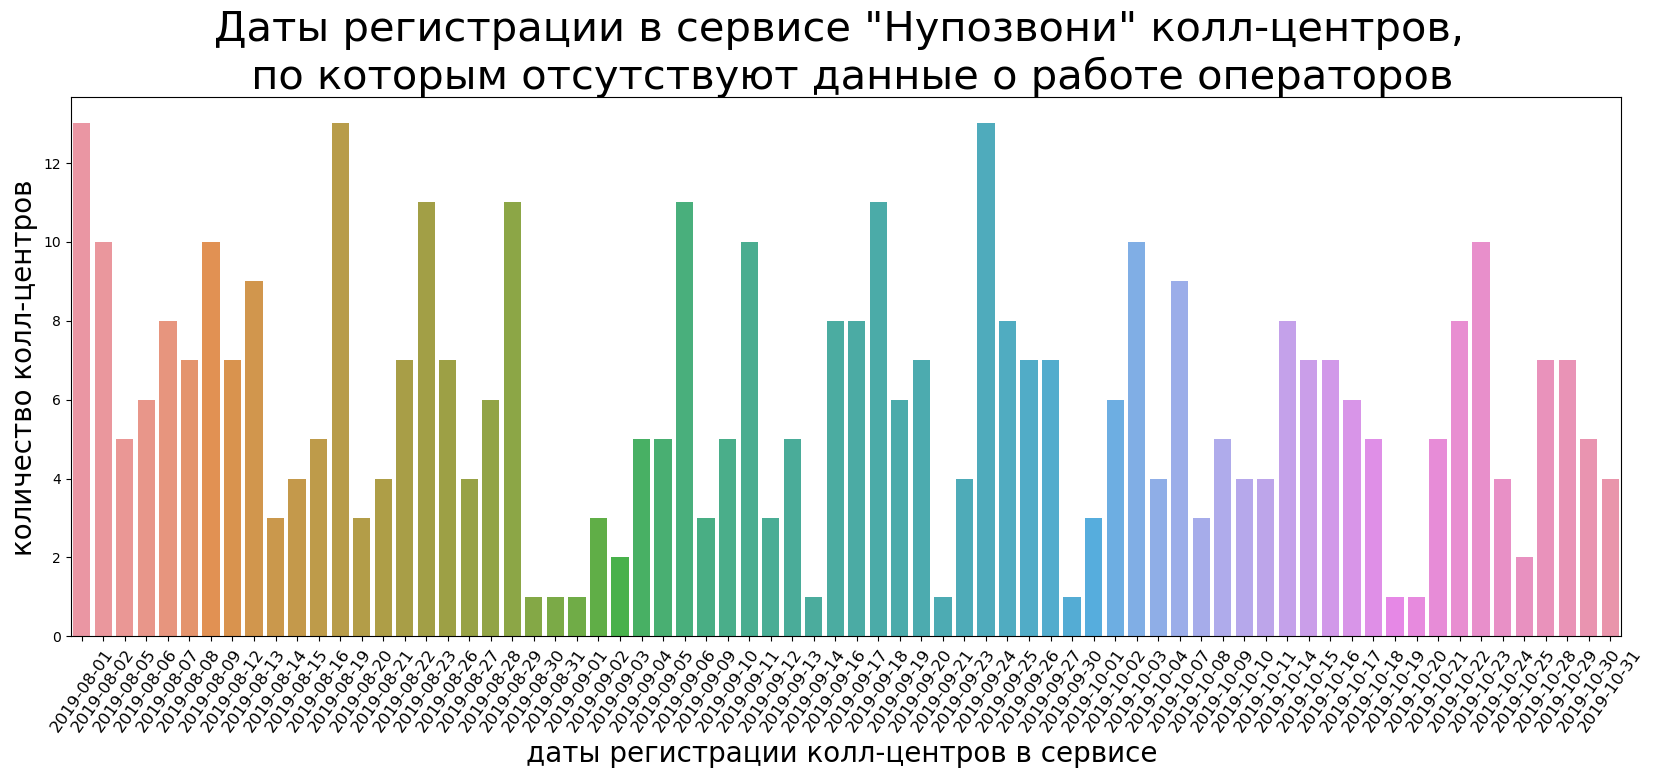

In [37]:
plt.figure(figsize=(20, 7))
ax = sns.barplot(x='date_start', y='user_id', data=clients_not_general_group)

plt.title('Даты регистрации в сервисе "Нупозвони" колл-центров, \n по которым отсутствуют данные о работе операторов',\
          fontsize = 30)
plt.xlabel('даты регистрации колл-центров в сервисе ', fontsize = 20)
plt.xticks(rotation=55, fontsize = 12)
plt.ylabel('количество колл-центров', fontsize = 20)
plt.show()

Предположение о том, что колл-центры, по которым нет данных о работе операторов, зарегистрировались в сервисе в последний месяц периода (с августа по ноябрь), не подтвердилась.

Возможно, такие клиенты зарегистрировались в сервисе, но не стали им пользоваться. Тогда необходимо узнать причины отказа колл-центров от использования услуг компании «Нупозвони».

Также возможна ситуация, когда по какой-либо причине не происходит сбор данных о работе колл-центров. Здесь также необходимо установить отсутствие факта сбора данных.

### Специализация колл-центров.

Для того, чтобы определить специализацию колл-центров (исходящие звонки, входящие звонки, смешанные звонки), посчитаем количество исходящих/входящих звонков для каждого колл-центра, а также их долю от общего количества звонков каждого колл-центра.

In [38]:
dataset_users_specialty = dataset.copy()

#посчитаем общее количество строк (звонков одного типа) и количество звонков для каждого колл-центра
dataset_users_specialty_all = dataset_users_specialty.groupby(['user_id'])\
.agg({'date':'count', 'calls_count':'sum'})
dataset_users_specialty_all.columns = ['rows_counts', 'calls_count_all']

#добавим в общую таблицу (копия исходного датасета) количество звонков одного типа для каждого колл-центра
dataset_users_specialty = dataset_users_specialty.merge(dataset_users_specialty_all, on='user_id')

#создадим сводную таблицу на основе копии исходного датасета
#и добавим долю каждого направления звонков от общего количества звонков
dataset_users_specialty_group = dataset_users_specialty.groupby(['user_id', 'direction', 'rows_counts', 'calls_count_all'])\
.agg({'calls_count': 'sum'})

dataset_users_specialty_group = dataset_users_specialty_group.reset_index()
dataset_users_specialty_group['ratio'] = round\
                                    (dataset_users_specialty_group['calls_count']/\
                                     dataset_users_specialty_group['calls_count_all']*100, 2)

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
dataset_users_specialty_group_1 = dataset_users_specialty_group.copy()
dataset_users_specialty_group_1.columns = ['идентификатор колл-центра', 'направление звонка', 'количество рабочих дней',\
                                        'общее количество звонков', 'количество входящих/исходящих звонков от всех звонков',\
                                        'доля входящих/исходящих звонков']
dataset_users_specialty_group_1.style.set_caption("Статистика звонков по колл-центрам")

dataset_users_specialty_group_1.sample(3)

,идентификатор колл-центра,направление звонка,количество рабочих дней,общее количество звонков,количество входящих/исходящих звонков от всех звонков,доля входящих/исходящих звонков
50,166658,in,1882,12792,2321,18.14
374,167908,in,21,33,33,100.00
165,167053,in,34,429,126,29.37


Посмотрим, распределение долей входящих и исходящих звонков, чтобы понимать, как категоризировать колл-центры по специализации (особенно, при какой доле звонков того или иного типа считать специализацию смешанной). При этом, уберём высокие значения долей звонков.

Так примем, что при доле звонков одного типа 70 и более процентов у колл-центра будет та или иная специализация (или входящие, или исходящие). При доле звонков менее 70 специализация будет смешанной. Создадим дополнительный столбец с категоризацией специализации колл-центров.

In [39]:
def create_specialty(column):
    '''Функция категоризирует колл-центры по специализациям'''
    if column >= 70.00:
        return 'входящие'
    elif column > 30.00 and column < 70.00:
        return 'смешанные'
    else:
        return 'исходящие'

In [40]:
#создадим таблицу, в которой направление звонка входящее (in), затем категоризируем колл-центры посредством функции
#create_specialty
dataset_users_specialty_in = dataset_users_specialty_group.loc[(dataset_users_specialty_group['direction'] == 'in')]
dataset_users_specialty_in['specialty'] = dataset_users_specialty_in['ratio'].apply(create_specialty)

#добавим столбец по специализации к исходному датасету
dataset = dataset.merge(dataset_users_specialty_in[['user_id', 'specialty']], on='user_id')

Посмотрим распределение колл-центров в зависимости от их специализации.

In [41]:
dataset_specialty = dataset.groupby('specialty').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
dataset_specialty['ratio'] = dataset_specialty['user_id'] / dataset_specialty['user_id'].sum()

dataset_specialty.columns = ['количество колл-центров', 'доля колл-центров']
dataset_specialty.index.names = ['специализации колл-центров']
(dataset_specialty
 .style
 #.format('{0:,.0f}', subset='количество заведений')
 .format('{0:,.2%}', subset='доля колл-центров')
 .background_gradient(subset='доля колл-центров')
 .set_caption('Распределение колл-центров <br> по специализациям')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,количество колл-центров,доля колл-центров
специализации колл-центров,,
входящие,148,48.21%
исходящие,85,27.69%
смешанные,74,24.10%


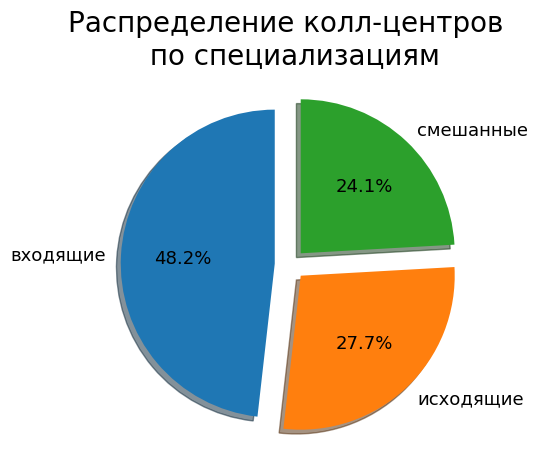

In [42]:
dataset_specialty = dataset_specialty.reset_index()
plt.figure(figsize=(15, 5))
ax = plt.pie(dataset_specialty['количество колл-центров'], labels=dataset_specialty['специализации колл-центров'],\
             startangle=90, explode=[0.1,0.1,0.1],
       shadow=True, autopct='%2.1f%%',\
             textprops={'fontsize': 13})
plt.title('Распределение колл-центров \n по специализациям', fontsize = 20)   
plt.show()

Как видно, почти половине колл-центров (48%) специализированы на приёме звонков. Доли колл-центров, специализирующихся на обзвоне, и смешанных колл-центров примерно одинаковы (28% и 24% соответственно).

### Тарифные планы колл-центров.

Посмотрим как распределяются колл-центры в зависимости от выбранного ими тарифного плана.

In [43]:
clients_general_tariff = clients_general.groupby('tariff_plan').agg({'user_id': 'nunique'})\
                         .sort_values(by='user_id', ascending=False)
clients_general_tariff['ratio'] = clients_general_tariff['user_id']/clients_general_tariff['user_id'].sum()

clients_general_tariff.columns = ['количество колл-центров', 'доля колл-центров']
clients_general_tariff.index.names = ['тарифные планы колл-центров']
(clients_general_tariff
 .style
 .format('{0:,.2%}', subset='доля колл-центров')
 .background_gradient(subset='доля колл-центров')
 .set_caption('Распределение колл-центров <br> по тарифным планам')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,количество колл-центров,доля колл-центров
тарифные планы колл-центров,,
C,161,52.44%
B,112,36.48%
A,34,11.07%


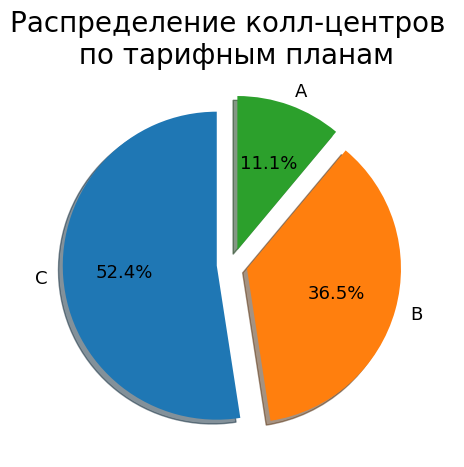

In [44]:
clients_general_tariff = clients_general_tariff.reset_index()
plt.figure(figsize=(15, 5))
ax = plt.pie(clients_general_tariff['количество колл-центров'], labels=clients_general_tariff['тарифные планы колл-центров'],\
             startangle=90, explode=[0.1,0.1,0.1],
       shadow=True, autopct='%2.1f%%',\
             textprops={'fontsize': 13})
plt.title('Распределение колл-центров \n по тарифным планам', fontsize = 20)   
plt.show()

Таким образом, колл-центры, по которым есть данные о работе операторов:
- 52%, то есть половина колл-центров, выбрали тарифный план C;
- 37% - тарифный план B;
- 11% - тарифный план A.

### Количество операторов в колл-центрах.

В рассматриваемом пункте будем работать со срезом исходного датасета, за исключением строк, в которых отсутствует идентификатор оператора.

In [45]:
operators = dataset.loc[dataset['operator_id'].notnull()]

In [46]:
print('Всего операторов', '{0:,}'.format(operators['operator_id'].nunique()).replace(',', ' '), 'сотрудников.')
print('Всего колл-центров, в которых работают операторы,', operators['user_id'].nunique(), 'организаций.')
print('Всего колл-центров, по которым нет данных об операторах,',\
      dataset['user_id'].nunique() - operators['user_id'].nunique(), 'организаций.')

Всего операторов 1 078 сотрудников.
Всего колл-центров, в которых работают операторы, 287 организаций.
Всего колл-центров, по которым нет данных об операторах, 20 организаций.


Сначала проверим, что каждый оператор работает не более чем в одном колл-центре.

In [47]:
count_clients = operators.groupby('operator_id').agg({'user_id': 'nunique'}).query('user_id > 1').reset_index()
print('Количество операторов, работающих более чем в одном колл-центре',\
     count_clients['operator_id'].count(), 'операторов.')

Количество операторов, работающих более чем в одном колл-центре 0 операторов.


Для работы создадим таблицу в разрезе каждого колл-центра с агрегированными данными по операторам.

In [48]:
#сначала создадим таблицу с количеством операторов в разрезе каждого колл-центра
operators_one_client = (
    operators.groupby(['user_id','specialty'])
    .agg({'operator_id':'nunique'})
    .reset_index()
)

#operators_one_client

#на основе предыдущей таблицы создадим таблицу с агрегированными данными в разрезе каждого колл-центра
operators_one_client_all = pd.pivot_table(operators_one_client,
                                          index=['specialty'],
                                          values=['operator_id'],
                                          aggfunc=['count', 'sum', 'mean', 'median', 'min', 'max'],
                                          margins=True, 
                                          margins_name='All')

operators_one_client_all['mean', 'operator_id'] = round(operators_one_client_all['mean', 'operator_id'], 2)

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
operators_one_client_all_1 = operators_one_client_all.copy()
operators_one_client_all_1.columns = ['количество колл-центров', 'количество операторов', 'среднее количество операторов',\
                                      'медианное количество операторов', 'минимальное количество операторов',\
                                     'максимальное количество операторов']
operators_one_client_all_1.index.names = ['специализации колл-центров']
(operators_one_client_all_1
 .style
 .format('{0:,.0f}', subset=['количество операторов', 'среднее количество операторов'])
 .background_gradient(subset='среднее количество операторов')
 .set_caption('Распределение операторов по специализациям колл-центров')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,количество колл-центров,количество операторов,среднее количество операторов,медианное количество операторов,минимальное количество операторов,максимальное количество операторов
специализации колл-центров,,,,,,
входящие,128,256,2,1,1,12
исходящие,85,499,6,3,1,48
смешанные,74,323,4,2,1,50
All,287,"1,078",4,2,1,50


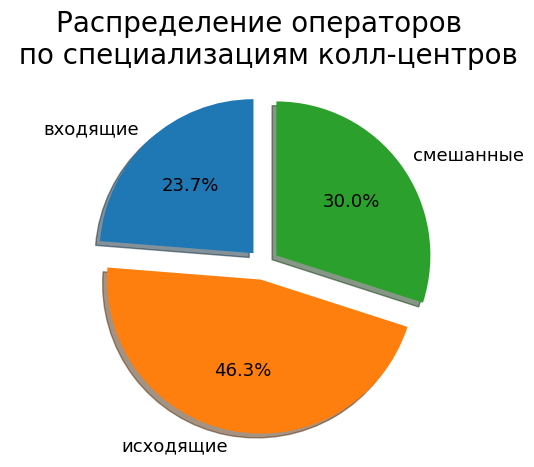

In [49]:
operators_one_client_all = operators_one_client_all.drop(index='All').reset_index()
plt.figure(figsize=(15, 5))
ax = plt.pie(operators_one_client_all[('sum', 'operator_id')],\
             labels=operators_one_client_all[('specialty', '')],\
             startangle=90, explode=[0.1,0.1,0.1],
       shadow=True, autopct='%2.1f%%',\
             textprops={'fontsize': 13})
plt.title('Распределение операторов \n по специализациям колл-центров', fontsize = 20)   
plt.show()

Таким образом, на один колл-центр в среднем приходится почти 4 оператора. При этом, медианное значение равно 2 операторам.

Наименьшее среднее количество операторов (почти 2 человека) работает в колл-центрах, специализирующихся на входящих звонках, наибольшее - в колл-центрах, занимающихся обзвоном (почти 6 человек).

Скорее всего, такая разница в статистиках происходит из-за сильного разброса в значениях. Визуализируем посредством построения боксплотов.

In [50]:
def quantiles_Q3(column, type_format, text):
    """Функция для нахождения выбросов свыше 1,5 межквартильного размаха от третьего квартиля"""
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    print(text, type_format.format(Q3  + 1.5 * IQR))

In [51]:
def print_quantiles_Q3(table, text, name, column_loc, column):
    """Функция для нахождения количества выбросов свыше 1,5 межквартильного размаха от третьего квартиля"""
    Q1 = table.loc[table[column_loc] == name][column].quantile(0.25)
    Q3 = table.loc[table[column_loc] == name][column].quantile(0.75)
    IQR = Q3 - Q1
    
    print(text,\
         table.loc[(table[column_loc] == name)&\
                                  (table[column] > (Q3  + 1.5 * IQR))][column].count()) 

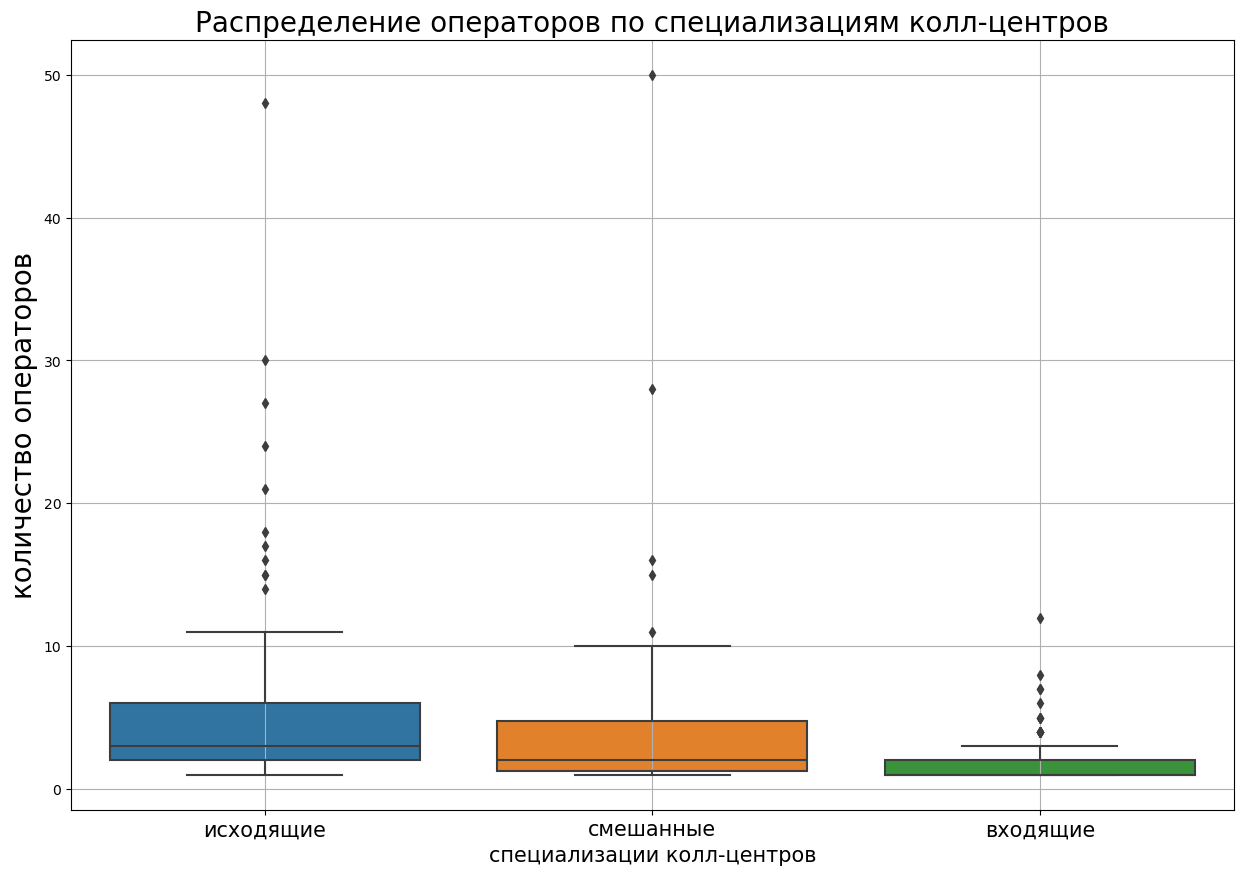

Выбросами являются данные о количестве операторов колл-центров "исходящие" свыше  12
Количество выбросов колл-центров "исходящие" по числу операторов 11
--------------------------------------------------------------------------------
Выбросами являются данные о количестве операторов колл-центров "входящие" свыше  4
Количество выбросов колл-центров "входящие" по числу операторов 15
--------------------------------------------------------------------------------
Выбросами являются данные о количестве операторов колл-центров "смешанные" свыше  10
Количество выбросов колл-центров "смешанные" по числу операторов 5


In [52]:
plt.figure(figsize=(15, 10))
#создадим таблицу для сортировки боксплотов по медиане
grouped = operators_one_client.loc[:,['specialty', 'operator_id']] \
    .groupby(['specialty']) \
    .median() \
    .sort_values(by='operator_id', ascending=False)

ax = sns.boxplot(x='specialty', y='operator_id', data=operators_one_client, order=grouped.index)
plt.title('Распределение операторов по специализациям колл-центров',fontsize = 20)
plt.xlabel('специализации колл-центров', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('количество операторов', fontsize = 20)
plt.grid(True)
plt.show()

quantiles_Q3(operators_one_client.loc[operators_one_client['specialty'] == 'исходящие']['operator_id'],\
             '{0:,.0f}', 'Выбросами являются данные о количестве операторов колл-центров "исходящие" свыше ')            
print_quantiles_Q3(operators_one_client, 'Количество выбросов колл-центров "исходящие" по числу операторов', 'исходящие',\
                  'specialty', 'operator_id')
print('-' * 80)
quantiles_Q3(operators_one_client.loc[operators_one_client['specialty'] == 'входящие']['operator_id'],\
            '{0:,.0f}', 'Выбросами являются данные о количестве операторов колл-центров "входящие" свыше ')
print_quantiles_Q3(operators_one_client, 'Количество выбросов колл-центров "входящие" по числу операторов', 'входящие', \
                  'specialty', 'operator_id')
print('-' * 80)
quantiles_Q3(operators_one_client.loc[operators_one_client['specialty'] == 'смешанные']['operator_id'],\
             '{0:,.0f}', 'Выбросами являются данные о количестве операторов колл-центров "смешанные" свыше ')
print_quantiles_Q3(operators_one_client, 'Количество выбросов колл-центров "смешанные" по числу операторов', 'смешанные',\
                  'specialty', 'operator_id')

Как видно на графиках, самое большое количество колл-центров, в которых состоит такое количество операторов, которое относится в выбросам, приходится на "входящие" организации. Самое низкое на "смешанные" колл-центры.

Ограничим ось ординат, чтобы лучше видно было сами боксплоты без выбросов.

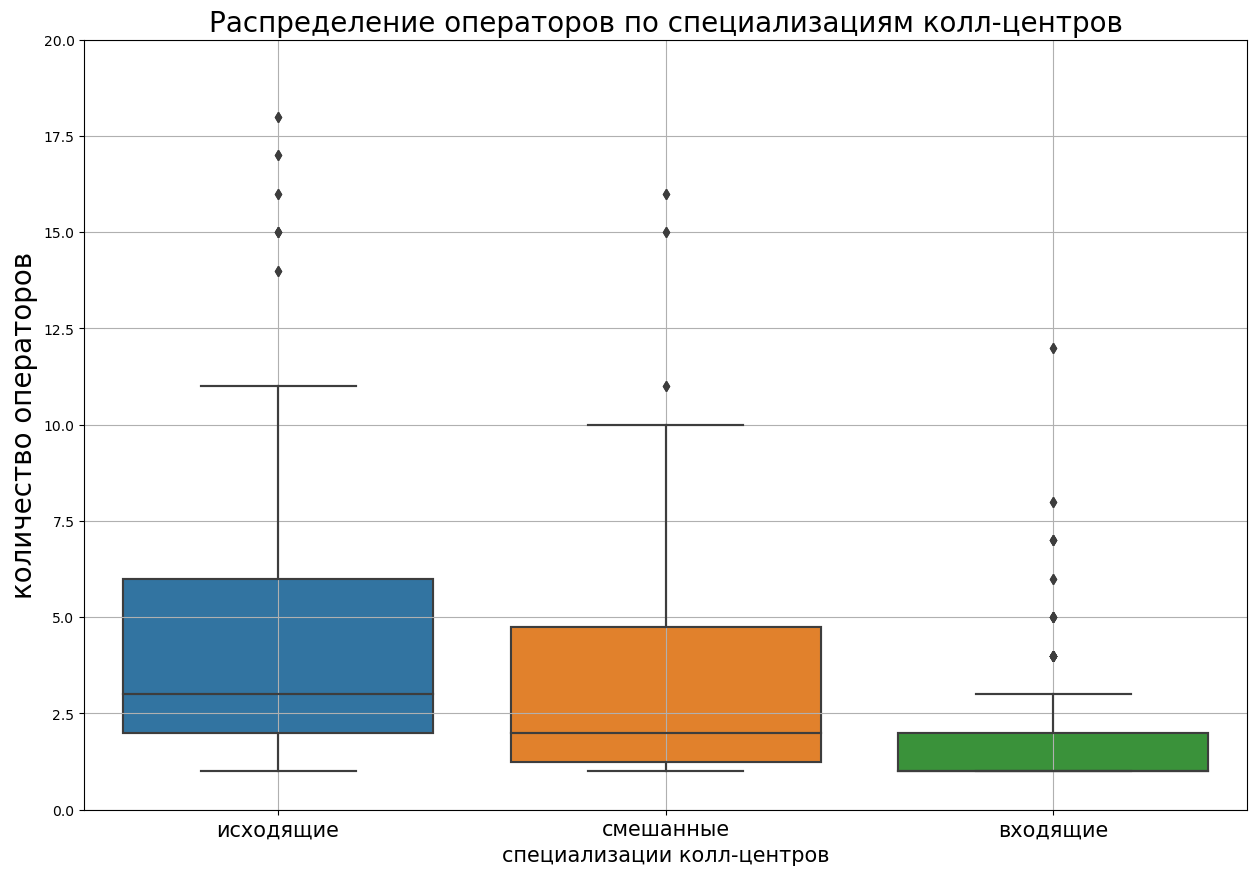

In [53]:
plt.figure(figsize=(15, 10))
#создадим таблицу для сортировки боксплотов по медиане
grouped = operators_one_client.loc[:,['specialty', 'operator_id']] \
    .groupby(['specialty']) \
    .median() \
    .sort_values(by='operator_id', ascending=False)

ax = sns.boxplot(x='specialty', y='operator_id', data=operators_one_client, order=grouped.index)
ax = sns.boxplot(x='specialty', y='operator_id', data=operators_one_client, order=grouped.index)
plt.title('Распределение операторов по специализациям колл-центров',fontsize = 20)
plt.xlabel('специализации колл-центров', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylim([0, 20])
plt.ylabel('количество операторов', fontsize = 20)
plt.grid(True)
plt.show()

Наименьшее количество различных вариантов количества операторов у колл-центров "входящие", у "исходящие" и "смешанные" данный критерий практически одинаковый. 

### Данные по статистикам звонков в колл-центрах.

#### Общие данные по количеству звонков и их распределению по месяцам.

In [54]:
dataset_month = dataset.copy()
dataset_month['month'] = dataset_month['date'].dt.month
dataset_month_calls = dataset_month.groupby('month').agg({'calls_count':'sum'})
dataset_month_calls['ratio'] = dataset_month_calls['calls_count']/dataset_month_calls['calls_count'].sum()

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
dataset_month_calls_1 = dataset_month_calls.copy()
dataset_month_calls_1.columns = ['количество звонков', 'доля звонков']
dataset_month_calls_1.index.names = ['месяцы']
(dataset_month_calls_1
 .style
 .format('{0:,.2%}', subset='доля звонков')
 .background_gradient(subset='доля звонков')
 .set_caption('Распределение колл-центров <br> по месяцам')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,количество звонков,доля звонков
месяцы,,
8,15690,2.69%
9,86719,14.85%
10,220431,37.75%
11,261063,44.71%


In [55]:
dataset_month_calls = dataset_month_calls.reset_index()
#заменим номера месяцев на их названия для построения графика (подписи данных на оси абсцисс)
import calendar

for i in dataset_month_calls['month']:
    dataset_month_calls['month'] = dataset_month_calls['month'].replace({i: calendar.month_name[i]})

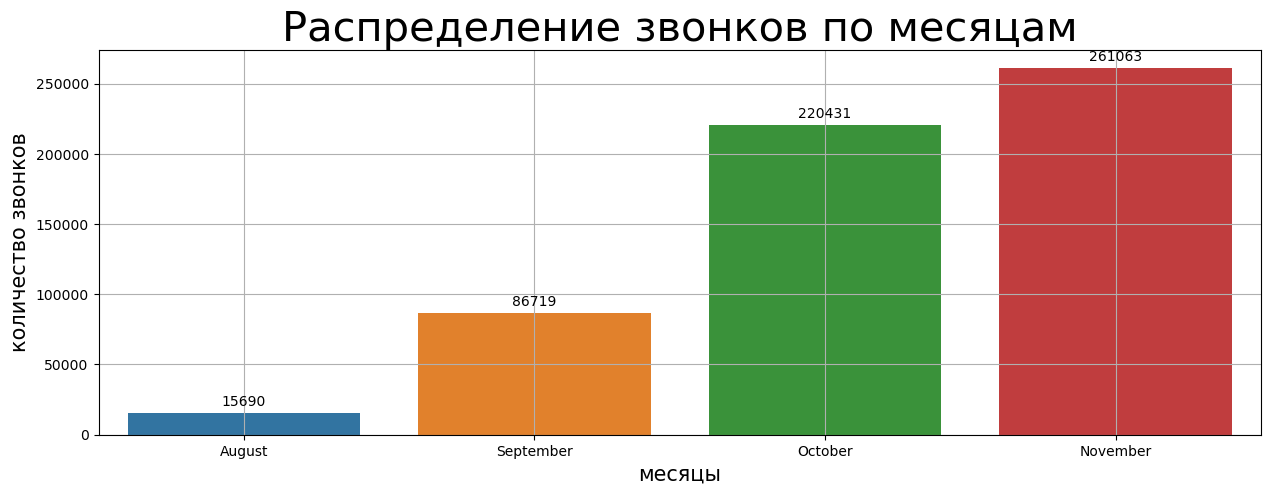

In [56]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='month', y='calls_count', data=dataset_month_calls)

for x, y in dataset_month_calls.iterrows():
    ax.text(x, y[1]+5000, str(y[1]), ha='center')
    
plt.title('Распределение звонков по месяцам', fontsize = 30)
plt.xlabel('месяцы', fontsize = 15)
plt.ylabel('количество звонков', fontsize = 15)
plt.grid(True)
plt.show()

45% (261 тысяча) всех звонков в ноябре, наименьшее - в августе - 3% (16 тысяч).

#### Данные по количеству звонков и среднему количеству звонков в день в разрезе специализаций колл-центров.

In [57]:
calls_count_specialty = dataset.groupby('specialty').agg({'calls_count':'sum', 'date':'nunique'})
calls_count_specialty['calls_one_day'] = calls_count_specialty['calls_count']/calls_count_specialty['date']
calls_count_specialty['ratio'] = calls_count_specialty['calls_count']/calls_count_specialty['calls_count'].sum()
calls_count_specialty = calls_count_specialty[['calls_count', 'ratio', 'date', 'calls_one_day']]

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
calls_count_specialty_1 = calls_count_specialty.copy()
calls_count_specialty_1.columns = ['количество звонков', 'доля звонков', 'количество дней', 'количество звонков в день']
calls_count_specialty_1.index.names = ['месяцы']
(calls_count_specialty_1
 .style
 .format('{0:,.0f}', subset='количество звонков в день')
 .format('{0:,.2%}', subset='доля звонков')
 .background_gradient(subset=['доля звонков', 'количество звонков в день'])
 .set_caption('Распределение количества звонков <br> в разрезе колл-центров')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,количество звонков,доля звонков,количество дней,количество звонков в день
месяцы,,,,
входящие,49247,8.43%,117,421
исходящие,353891,60.61%,118,"2,999"
смешанные,180765,30.96%,114,"1,586"


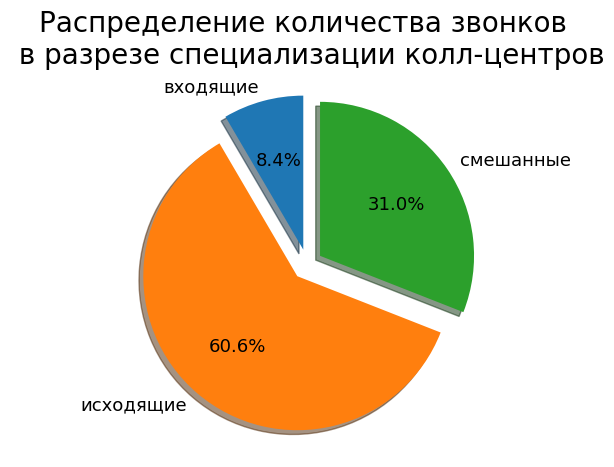

In [58]:
calls_count_specialty = calls_count_specialty.reset_index()
plt.figure(figsize=(15, 5))
ax = plt.pie(calls_count_specialty['calls_count'],\
             labels=calls_count_specialty['specialty'],\
             startangle=90, explode=[0.1,0.1,0.1],
       shadow=True, autopct='%2.1f%%',\
             textprops={'fontsize': 13})
plt.title('Распределение количества звонков \n в разрезе специализации колл-центров', fontsize = 20)   
plt.show()

Так, более половины звонков (61%) приходится на колл-центры, специализирующиеся на обзвоне клиентов, 31% - на смешанные колл-центры. Меньше всего звонков (8%) приходится на колл-центры, специализирующиеся на приёме звонков.

Больше всего в среднем в день совершают звонков (исходящие/входящие) операторы колл-центров, специализирующихся на обзвоне клиентов (почти 3 тысячи звонков в день), смешанные колл-центры - 1,6 тысячи в день. Меньше всего в среднем в день совершают операторы колл-центров, занимающихся приёмом звонков, - менее 0,5 тысячи.

#### Данные по количеству входящих и исходящих звонков в разрезе специализаций колл-центров.

In [59]:
in_out_calls_specialty_all = dataset.groupby('specialty').agg({'calls_count':'sum'}).reset_index()
in_out_calls_specialty_in = dataset.loc[dataset['direction'] == 'in'].groupby('specialty').agg({'calls_count':'sum'})\
.reset_index()
in_out_calls_specialty_out = dataset.loc[dataset['direction'] == 'out'].groupby('specialty').agg({'calls_count':'sum'})\
.reset_index()

in_out_calls_specialty_all.columns = ['specialty', 'calls_count_all']
in_out_calls_specialty_all = in_out_calls_specialty_all.merge(in_out_calls_specialty_in, on='specialty')
in_out_calls_specialty_all = in_out_calls_specialty_all.merge(in_out_calls_specialty_out, on='specialty')

In [60]:
in_out_calls_specialty_all['ratio_x'] = in_out_calls_specialty_all['calls_count_x']/\
                                              in_out_calls_specialty_all['calls_count_all']
in_out_calls_specialty_all['ratio_y'] = in_out_calls_specialty_all['calls_count_y']/\
                                              in_out_calls_specialty_all['calls_count_all']

in_out_calls_specialty_all = in_out_calls_specialty_all[['specialty', 'calls_count_all', 'calls_count_x',\
                                                         'ratio_x', 'calls_count_y', 'ratio_y']]

in_out_calls_specialty_all = in_out_calls_specialty_all.set_index('specialty')

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
in_out_calls_specialty_all_1 = in_out_calls_specialty_all.copy()
in_out_calls_specialty_all_1.columns = ['количество звонков', 'количество входящих звонков',\
                                        'доля входящих звонков', 'количество исходящих звонков', 'доля исходящих звонков']
in_out_calls_specialty_all_1.index.names = ['специализации колл-центров']
(in_out_calls_specialty_all_1
 .style
 .format('{0:,.0f}', subset=['количество звонков', 'количество входящих звонков', 'количество исходящих звонков'])
 .format('{0:,.2%}', subset=['доля входящих звонков', 'доля исходящих звонков'])
 .background_gradient(subset=['доля входящих звонков', 'доля исходящих звонков'])
 .set_caption('Распределение количества входящих и исходящих звонков <br> в разрезе специализации колл-центров')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,количество звонков,количество входящих звонков,доля входящих звонков,количество исходящих звонков,доля исходящих звонков
специализации колл-центров,,,,,
входящие,"49,247","45,890",93.18%,"3,357",6.82%
исходящие,"353,891","62,923",17.78%,"290,968",82.22%
смешанные,"180,765","81,354",45.01%,"99,411",54.99%


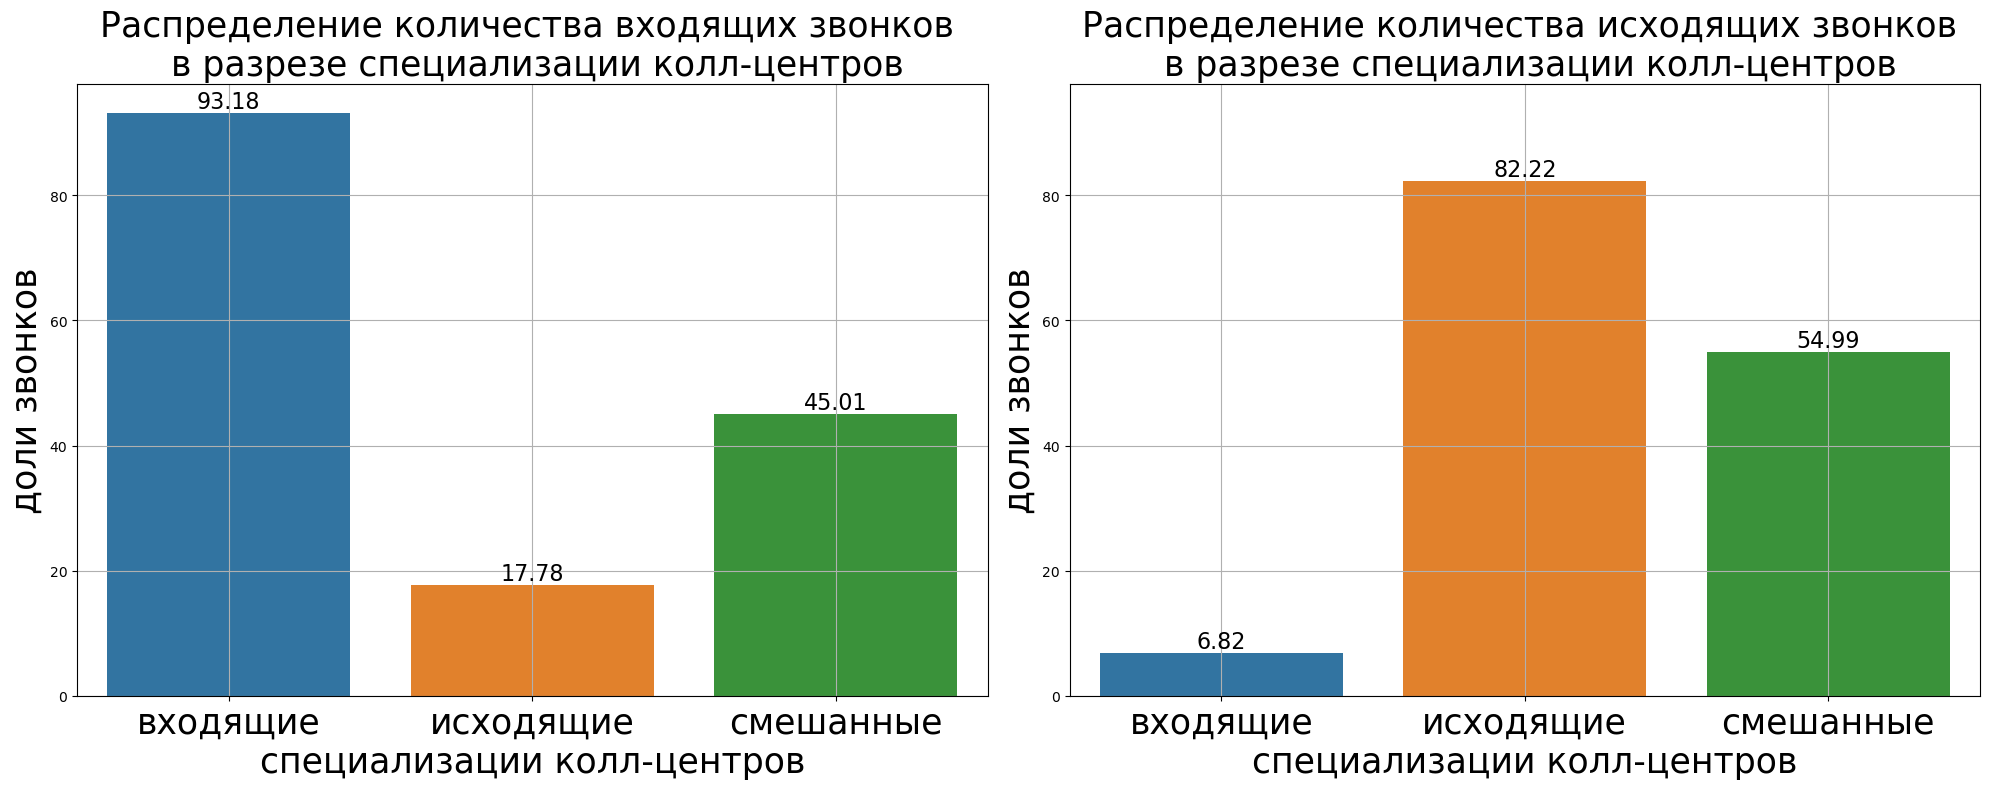

In [61]:
in_out_calls_specialty_all = in_out_calls_specialty_all.reset_index()
in_out_calls_specialty_all['ratio_x'] = round(in_out_calls_specialty_all['ratio_x']*100, 2)
in_out_calls_specialty_all['ratio_y'] = round(in_out_calls_specialty_all['ratio_y']*100, 2)

plt.figure(figsize=(20, 8))

ax1 = plt.subplot(1, 2, 1)
table_left = sns.barplot(x='specialty', y='ratio_x', data=in_out_calls_specialty_all)
plt.bar_label(table_left.containers[0], size=16, label_type='edge')
plt.title('Распределение количества входящих звонков \n в разрезе специализации колл-центров', fontsize = 25)
plt.xlabel('специализации колл-центров', fontsize = 25)
plt.ylabel('доли звонков', fontsize = 25)
plt.xticks(fontsize = 25)
plt.grid(True)

ax2 = plt.subplot(1, 2, 2, sharey = ax1)
table_right = sns.barplot(x='specialty', y='ratio_y', data=in_out_calls_specialty_all)
plt.bar_label(table_right.containers[0], size=16, label_type='edge')
plt.title('Распределение количества исходящих звонков \n в разрезе специализации колл-центров', fontsize = 25)
plt.xlabel('специализации колл-центров', fontsize = 25)
plt.ylabel('доли звонков', fontsize = 25)
plt.xticks(fontsize = 25)
plt.grid(True)

plt.tight_layout(h_pad= 5)
plt.show()

В пункте 4.1.3 определили специализацию колл-центров в зависимости от доли входящих/исходящих звонков (при доле звонков одного типа 70 и более процентров у колл-центра та или иная специализация (или входящие, или исходящие), при доле звонков одного типа менее 70 специализация смешанная). Следовательно, естественно, что наибольшая доля звонков того или иного типа будет у колл-центров соответствующей специализации.

Так:
- самая высокая доля в 93% входящих звонков от количества всех звонков колл-центров данного типа приходится на специализацию "входящие";
- у колл-центров смешанной специализации такая доля составляет 45%;
- у специализации "исходящие" - 18% (расчёт долей проводится от суммарного количества звонков той или иной направленности).

Аналогичная ситуация складывается в отношении исходящих звонков:
- доля в 82% у колл-центров, специализирующихся на обзвонах;
- 55% - смешанные колл-центры;
- 7% - у колл-центров, занимающихся в основном приёмом звонков.

#### Данные по количеству внутренних звонков в разрезе специализаций колл-центров.

In [62]:
internal_specialty = dataset.loc[dataset['internal'] == True].groupby('specialty').agg({'calls_count':'sum'})
internal_specialty['ratio'] = internal_specialty['calls_count']/internal_specialty['calls_count'].sum()

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
internal_specialty_1 = internal_specialty.copy()
internal_specialty_1.columns = ['количество звонков', 'доля звонков']
internal_specialty_1.index.names = ['специализации колл-центров']
(internal_specialty_1
 .style
 .format('{0:,.0f}', subset='количество звонков')
 .format('{0:,.2%}', subset='доля звонков')
 .background_gradient(subset='доля звонков')
 .set_caption('Распределение количества внутренних звонков <br> в разрезе колл-центров')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,количество звонков,доля звонков
специализации колл-центров,,
входящие,806,5.52%
исходящие,"8,379",57.38%
смешанные,"5,417",37.10%


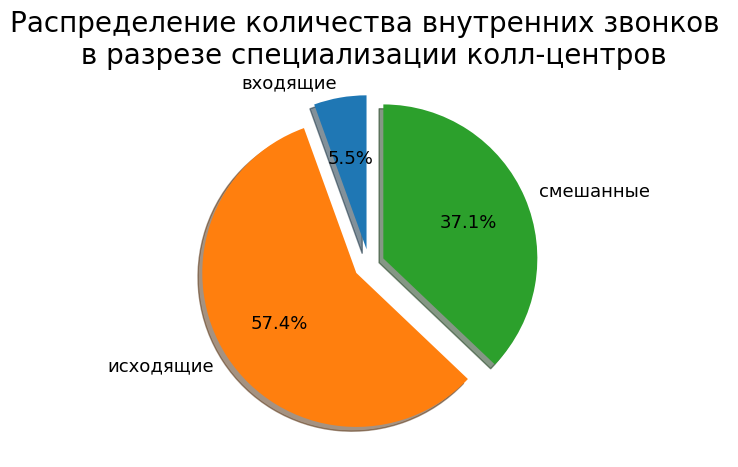

In [63]:
internal_specialty = internal_specialty.reset_index()
plt.figure(figsize=(15, 5))
ax = plt.pie(internal_specialty['calls_count'],\
             labels=internal_specialty['specialty'],\
             startangle=90, explode=[0.1,0.1,0.1],
       shadow=True, autopct='%2.1f%%',\
             textprops={'fontsize': 13})
plt.title('Распределение количества внутренних звонков \n в разрезе специализации колл-центров', fontsize = 20)   
plt.show()

Наибольшая доля внутренних звонков у колл-центров, занимающихся обзвоном клиентов, 57%, наименьшая (5%) у колл-центров, специализирующихся на приёме звонков.

В принципе, значительное количество внутренних звонков может свидетельствовать об отсутствии у операторов соответствующей квалификации (оператор имеет затруднения при звонке и переключает на более компетентного сотрудника). С другой стороны, при входящих звонках стоит учитывать, что у операторов также может быть своя специализация (в этом случае оператор перенаправляет клиента к соответствующему специалисту).

Здесь необходимо посмотреть распределение внутренних звонков по направлениям (входящие и исходящие).

In [64]:
#сначала создадим таблицу с общим количеством звонков по их направлению
internal_specialty_in_out = dataset.groupby('direction').agg({'calls_count':'sum'}).reset_index()
internal_specialty_in_out_sub = dataset.loc[dataset['internal'] == True].groupby('direction').agg({'calls_count':'sum'})\
.reset_index()
internal_specialty_in_out = internal_specialty_in_out.merge(internal_specialty_in_out_sub, on='direction')
internal_specialty_in_out['ratio_internal'] = internal_specialty_in_out['calls_count_y']/\
                                                    internal_specialty_in_out['calls_count_x']

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
internal_specialty_in_out_1 = internal_specialty_in_out.copy()
internal_specialty_in_out_1 = internal_specialty_in_out_1.set_index('direction')
internal_specialty_in_out_1.index.names = ['специализации колл-центров']
internal_specialty_in_out_1.columns = ['количество звонков', 'количество внутренних звонков', 'доля внутренних звонков']
(internal_specialty_in_out_1
 .style
 .format('{0:,.0f}', subset=['количество звонков', 'количество внутренних звонков'])
 .format('{0:,.2%}', subset='доля внутренних звонков')
 .background_gradient(subset='доля внутренних звонков')
 .set_caption('Распределение количества внутренних звонков <br> в разрезе направлений звонков')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,количество звонков,количество внутренних звонков,доля внутренних звонков
специализации колл-центров,,,
in,"190,167","1,621",0.85%
out,"393,736","12,981",3.30%


Получается, что при исходящих звонках доля внутренних звонков более чем в 3 раза выше, чем при входящих (3% и 1% соответственно).

Так как рассматриваемый критерий может являться одним из показателей эффективности работы операторов, найдём колл-центры с наибольшими долями внутренних исходящих звонков.

In [65]:
internal_users_out = dataset.loc[dataset['direction'] == 'out']\
                                  .groupby(['user_id', 'specialty', 'direction']).agg({'calls_count':'sum'}).reset_index()
internal_users_out_sub = dataset.loc[(dataset['direction'] == 'out')&(dataset['internal'] == True)]\
                     .groupby(['user_id', 'specialty', 'direction']).agg({'calls_count':'sum'}).reset_index()
internal_users_out_sub = internal_users_out_sub[['user_id', 'calls_count']]
internal_users_out = internal_users_out.merge(internal_users_out_sub, on='user_id')

internal_users_out['ratio_internal'] = internal_users_out['calls_count_y']/\
internal_users_out['calls_count_x']

internal_users_out.sort_values(by='ratio_internal', ascending=False).head()

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
internal_users_out_1 = internal_users_out.copy()
internal_users_out_1.columns = ['идентификатор колл-центра', 'специализация колл-центра',\
                                'направление звонка', 'количество звонков', 'количество внутренних звонков',\
                                'доля внутренних звонков']
(internal_specialty_in_out_1
 .style
 .format('{0:,.0f}', subset=['количество звонков', 'количество внутренних звонков'])
 .format('{0:,.2%}', subset='доля внутренних звонков')
 .background_gradient(subset='доля внутренних звонков')
 .set_caption('Колл-центры с наибольшими долями внутренних исходящих звонков')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,количество звонков,количество внутренних звонков,доля внутренних звонков
специализации колл-центров,,,
in,"190,167","1,621",0.85%
out,"393,736","12,981",3.30%


Так как есть колл-центры, у которых незначительное количество звонков (например, всего один исходящий звонок, который также является и внутренним), сделаем срез рассматриваемой таблицы, чтобы определить клиентов с высокой долей внутренних исходящих звонков. Возьмём для проведения расчётов те колл-центры, в которых в абсолютном выражении количество исходящих звонков более 50.

Также, необходимо определить пороговое значение, при превышении которого стоит обратить внимание на значительное количество внутренних исходящих звонков.

Для этого построим боксплот, чтобы понять распределение долей внутренних исходящих звонков от количества всех исходящих звонков в разрезе каждого колл-центра.

In [66]:
def calculation_quantile(number_quantile, column):
    """Функция для расчёта квартилей и границ ящика с усами"""
    if number_quantile == 1:
        return round(column.quantile(0.25) - 1.5*(column.quantile(0.75) - column.quantile(0.25)), 2)
    elif number_quantile == 2:
        return round(column.quantile(0.25), 2)
    elif number_quantile == 3:
        return round(column.quantile(0.50), 2)
    elif number_quantile == 4:
        return round(column.quantile(0.75), 2)
    elif number_quantile == 5:
        return round(column.quantile(0.75) + 1.5*(column.quantile(0.75) - column.quantile(0.25)), 2)

In [67]:
def calculation_quantile_ratio(number_quantile, column):
    """Функция для расчёта квартилей и границ ящика с усами для процентных показателей"""
    if number_quantile == 1:
        return round(column.min(), 2)
    elif number_quantile == 2:
        return round(column.quantile(0.25), 2)
    elif number_quantile == 3:
        return round(column.quantile(0.50), 2)
    elif number_quantile == 4:
        return round(column.quantile(0.75), 2)
    elif number_quantile == 5:
        return round(column.max(), 2)

In [68]:
def create_boxplot(column, title, title_x):
    """Функция для построения боксплотов"""
    plt.figure(figsize=(15, 5))
    ax = sns.boxplot(x=column)
    plt.title(title,fontsize = 20)
    plt.xlabel(title_x, fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.grid(True)
    plt.show()

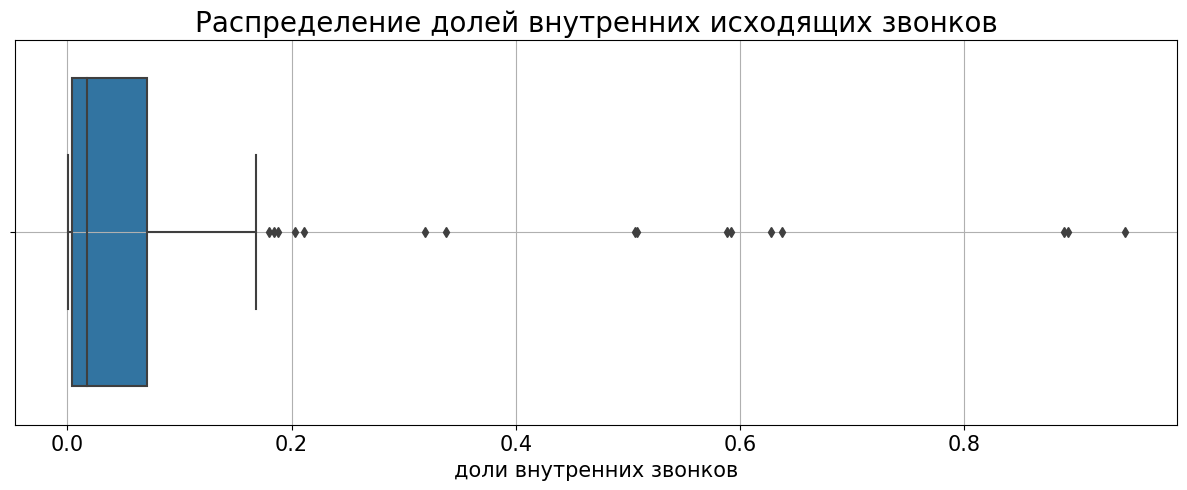

Первый квартиль для доли внутренних исходящих звонков в разрезе колл-центров 0.0
Второй квартиль (медиана) для доли внутренних исходящих звонков в разрезе колл-центров 0.02
Третий квартиль для доли внутренних исходящих звонков в разрезе колл-центров 0.07
Верхняя граница "ящика с усами" для доли внутренних исходящих звонков в разрезе колл-центров 0.17


In [69]:
#выделим отдельно столбец с долями внутренних исходящих звонков, где количество исходящих звонков более 50
create_boxplot(internal_users_out.loc[internal_users_out['calls_count_x'] > 50]['ratio_internal'],\
               'Распределение долей внутренних исходящих звонков',\
               'доли внутренних звонков')
column = internal_users_out.loc[internal_users_out['calls_count_x'] > 50]['ratio_internal']
print('Первый квартиль для доли внутренних исходящих звонков в разрезе колл-центров', \
      calculation_quantile(2, column))
print('Второй квартиль (медиана) для доли внутренних исходящих звонков в разрезе колл-центров', \
      calculation_quantile(3, column))
print('Третий квартиль для доли внутренних исходящих звонков в разрезе колл-центров', \
      calculation_quantile(4, column))
print('Верхняя граница "ящика с усами" для доли внутренних исходящих звонков в разрезе колл-центров',\
      calculation_quantile(5, column))

На боксплоте видно, что выбросы начинаются при значении доля внутренних исходящих звонков свыше 17%, при этом половина значений находятся в диапазоне от 0,5% до 7% (сам "ящик" без учёта "усов").

Первый квартиль составляет всего 0,5%, поэтому не будем брать его в качестве порогового значения для рассматриваемого показателя. Медиана, также, показала невысокую долю (2%), что, скорее всего, является допустимым (например, при возникновении различных внештатных ситуаций в работе оператора).

Третий квартиль составляет 7%, что также представляется допустимым в работе операторов.

Следовательно, возьмём в качестве порогового значения 17% (верхняя граница "усов" графика). То есть допустим, что примерно каждый пятый исходящий звонок может быть внутренним. 

In [70]:
internal_users_out_result = internal_users_out.loc[(internal_users_out['calls_count_x'] > 50)&\
                                            (internal_users_out['ratio_internal'] > 0.17)]\
                                            .sort_values(by='ratio_internal', ascending=False)
#display(internal_users_out_result.head(10))
print('Всего колл-центров с долей внутренних исходящих звонков более 17%: ',\
     len(internal_users_out_result), 'организации.')

Всего колл-центров с долей внутренних исходящих звонков более 17%:  16 организации.


Таким образом, в 16 колл-центрах доля исходящих внутренних звонков от количества исходящих звонков превышает пороговое значение в 17% (верхняя граница "усов" графика или третий квартиль плюс полуторный межквартильный размах).

Посмотрим распределение рассматриваемых колл-центров в зависимости от их специализации.

In [71]:
internal_out_result_group = internal_users_out_result.reset_index()\
                                                     .groupby('specialty')\
                                                     .agg({'user_id':'count'})
internal_out_result_group['ratio'] = internal_out_result_group['user_id'] / \
internal_out_result_group['user_id'].sum()

internal_out_result_group.index.names = ['специализации колл-центров']
internal_out_result_group.columns = ['количество звонков', 'доля внутренних звонков']
(internal_out_result_group
 .style
 .format('{0:,.2%}', subset='доля внутренних звонков')
 .background_gradient(subset='доля внутренних звонков')
 .set_caption('Распределение количества внутренних <br> звонков в разрезе колл-центров, в которых доля таких звонков более 17%')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,количество звонков,доля внутренних звонков
специализации колл-центров,,
входящие,2,12.50%
исходящие,10,62.50%
смешанные,4,25.00%


63% составляют колл-центры, специализирующиеся на обзвоне клиентов (10 организаций), доля смешанных колл-центров составляет 25% (4 организации). Колл-центры, занимающиеся приёмом звонков, составили 13% (2 организации).

#### Данные по количеству пропущенных звонков в разрезе специализаций колл-центров.

In [72]:
is_missed_specialty = dataset.loc[dataset['is_missed_call'] == True].groupby('specialty').agg({'calls_count':'sum'})
is_missed_specialty['ratio'] = is_missed_specialty['calls_count']/is_missed_specialty['calls_count'].sum()

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
is_missed_specialty_1 = is_missed_specialty.copy()
is_missed_specialty_1.columns = ['количество звонков', 'доля звонков']
is_missed_specialty_1.index.names = ['специализации колл-центров']
(is_missed_specialty_1
 .style
 .format('{0:,.0f}', subset='количество звонков')
 .format('{0:,.2%}', subset='доля звонков')
 .background_gradient(subset='доля звонков')
 .set_caption('Распределение количества пропущенных звонков <br> в разрезе колл-центров')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,количество звонков,доля звонков
специализации колл-центров,,
входящие,"23,180",8.54%
исходящие,"179,863",66.26%
смешанные,"68,404",25.20%


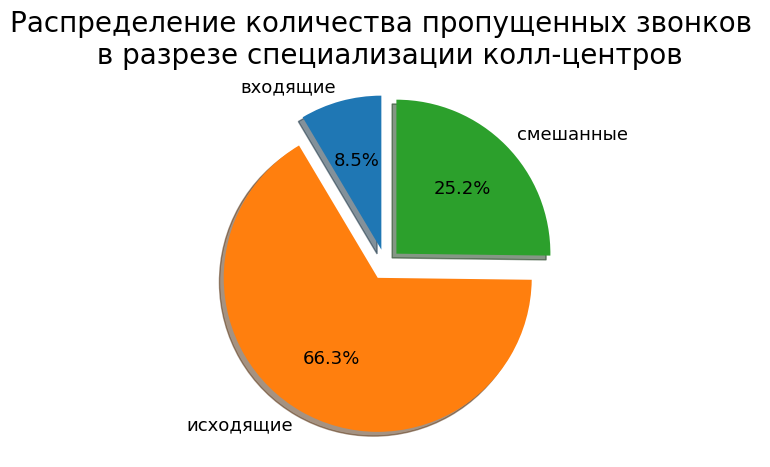

In [73]:
is_missed_specialty = is_missed_specialty.reset_index()
plt.figure(figsize=(15, 5))
ax = plt.pie(is_missed_specialty['calls_count'],\
             labels=is_missed_specialty['specialty'],\
             startangle=90, explode=[0.1,0.1,0.1],
       shadow=True, autopct='%2.1f%%',\
             textprops={'fontsize': 13})
plt.title('Распределение количества пропущенных звонков \n в разрезе специализации колл-центров', fontsize = 20)   
plt.show()

Наибольшая доля пропущенных звонков (66%) у колл-центров, специализирующихся на обзвоне клиентов. Наименьшая у колл-центров, занимающихся приёмом звонков (9%).

При этом, надо посмотреть распределение пропущенных звонков по направлению звонка (исходящие/входящие).

In [74]:
#сначала создадим таблицу с общим количеством звонков по их направлению
is_missed_specialty_in_out = dataset.groupby('direction').agg({'calls_count':'sum'}).reset_index()
is_missed_specialty_in_out_sub = dataset.loc[dataset['is_missed_call'] == True]\
.groupby('direction').agg({'calls_count':'sum'}).reset_index()
is_missed_specialty_in_out = is_missed_specialty_in_out.merge(is_missed_specialty_in_out_sub, on='direction')
is_missed_specialty_in_out['ratio_is_missed_call'] = is_missed_specialty_in_out['calls_count_y']/\
                                                    is_missed_specialty_in_out['calls_count_x']

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
is_missed_specialty_in_out_1 = is_missed_specialty_in_out.copy()
is_missed_specialty_in_out_1 = is_missed_specialty_in_out_1.set_index('direction')
is_missed_specialty_in_out_1.index.names = ['специализации колл-центров']
is_missed_specialty_in_out_1.columns = ['количество звонков', 'количество пропущенных звонков', 'доля пропущенных звонков']
(is_missed_specialty_in_out_1
 .style
 .format('{0:,.0f}', subset=['количество звонков', 'количество пропущенных звонков'])
 .format('{0:,.2%}', subset='доля пропущенных звонков')
 .background_gradient(subset='доля пропущенных звонков')
 .set_caption('Распределение количества пропущенных звонков <br> в разрезе направлений звонков')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,количество звонков,количество пропущенных звонков,доля пропущенных звонков
специализации колл-центров,,,
in,"190,167","103,713",54.54%
out,"393,736","167,734",42.60%


55% пропущенных звонков составляют входящие звонки от всех звонков данного направления, 43% - исходящие звонки.

При этом, стоит иметь ввиду, что исходящий звонок может быть пропущен по независящим от оператора колл-центра причинам. Поэтому посмотрим на долю пропущенных входящих звонков в разрезе колл-центров, так как рассматриваемый критерий может являться одним из показателей эффективности работы операторов.

In [75]:
is_missed_users_in = dataset.loc[dataset['direction'] == 'in']\
                                  .groupby(['user_id', 'specialty', 'direction']).agg({'calls_count':'sum'}).reset_index()
is_missed_users_in_sub = dataset.loc[(dataset['direction'] == 'in')&(dataset['is_missed_call'] == True)]\
                     .groupby(['user_id', 'specialty','direction']).agg({'calls_count':'sum'}).reset_index()
is_missed_users_in_sub = is_missed_users_in_sub[['user_id', 'calls_count']]
is_missed_users_in = is_missed_users_in.merge(is_missed_users_in_sub, on='user_id')

is_missed_users_in['ratio_is_missed_call'] = is_missed_users_in['calls_count_y']/\
                                             is_missed_users_in['calls_count_x']

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
is_missed_users_in_1 = is_missed_users_in.copy()
is_missed_users_in_1.columns = ['идентификатор колл-центра', 'специализация колл-центра',\
                                'направление звонка', 'количество звонков', 'количество пропущенных звонков',\
                                'доля пропущенных звонков']
(is_missed_users_in_1.head(5)
 .style
 .format('{0:,.0f}', subset=['количество звонков', 'количество пропущенных звонков'])
 .format('{0:,.2%}', subset='доля пропущенных звонков')
 .highlight_min(axis=0, subset='количество звонков')
 .set_caption('Колл-центры с наибольшими долями пропущенных входящих звонков')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,идентификатор колл-центра,специализация колл-центра,направление звонка,количество звонков,количество пропущенных звонков,доля пропущенных звонков
0,166377,исходящие,in,196,94,47.96%
1,166391,входящие,in,26,20,76.92%
2,166392,входящие,in,209,107,51.20%
3,166399,входящие,in,24,11,45.83%
4,166405,смешанные,in,"7,709","5,532",71.76%


Так как есть колл-центры, у которых незначительное количество звонков (например, всего один входящий звонок, который также является и пропущенным), сделаем срез рассматриваемой таблицы, чтобы определить клиентов с высокой долей пропущенных входящих звонков. Возьмём для проведения расчётов те колл-центры, в которых в абсолютном выражении количество входящих звонков более 50.

Также, необходимо определить пороговое значение, при превышении которого стоит обратить внимание на значительное количество пропущенных входящих звонков.

Для этого построим боксплот, чтобы понять распределение долей пропущенных входящих звонков от количества всех входящих звонков в разрезе каждого колл-центра.

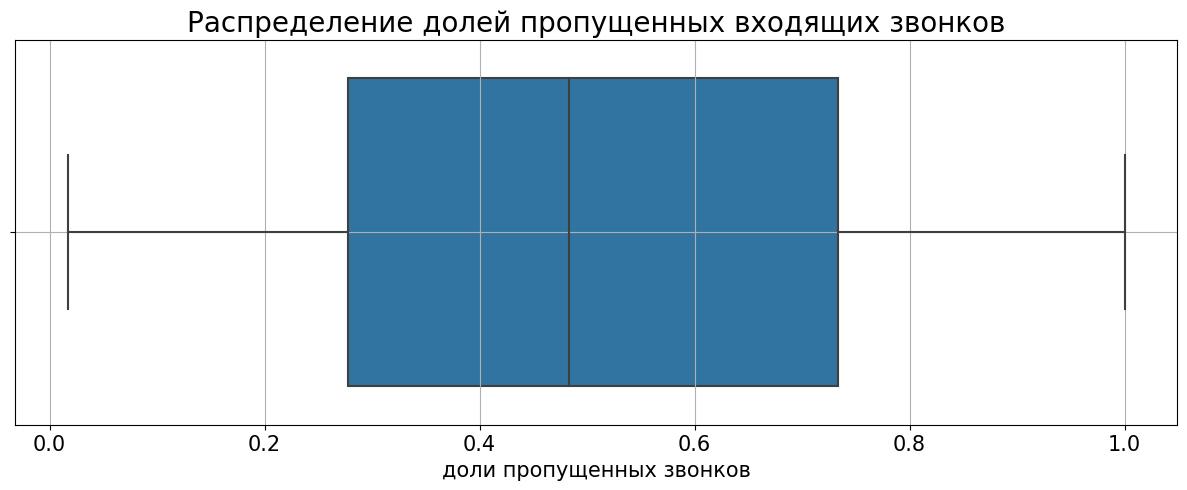

Нижняя граница "ящика с усами" для доли пропущенных входящих звонков в разрезе колл-центров 0.02
Первый квартиль для доли пропущенных входящих звонков в разрезе колл-центров 0.28
Второй квартиль (медиана) для доли пропущенных входящих  звонков в разрезе колл-центров 0.48
Третий квартиль для доли пропущенных входящих  в разрезе колл-центров 0.73
Верхняя граница "ящика с усами" для доли пропущенных входящих звонков в разрезе колл-центров 1.0


In [76]:
#выделим отдельно столбец с долями внутренних исходящих звонков, где количество исходящих звонков более 50
create_boxplot(is_missed_users_in.loc[is_missed_users_in['calls_count_x'] > 50]['ratio_is_missed_call'],\
               'Распределение долей пропущенных входящих звонков',\
               'доли пропущенных звонков')

column = is_missed_users_in.loc[is_missed_users_in['calls_count_x'] > 50]['ratio_is_missed_call']
print('Нижняя граница "ящика с усами" для доли пропущенных входящих звонков в разрезе колл-центров', \
      calculation_quantile_ratio(1, column))
print('Первый квартиль для доли пропущенных входящих звонков в разрезе колл-центров', \
      calculation_quantile_ratio(2, column))
print('Второй квартиль (медиана) для доли пропущенных входящих  звонков в разрезе колл-центров', \
      calculation_quantile_ratio(3, column))
print('Третий квартиль для доли пропущенных входящих  в разрезе колл-центров', \
      calculation_quantile_ratio(4, column))
print('Верхняя граница "ящика с усами" для доли пропущенных входящих звонков в разрезе колл-центров',\
      calculation_quantile_ratio(5, column))

Первый квартиль составляет 28%, то есть получается, что, примерно, каждый третий входящий звонок пропущен. С учётом того, что работа оператора состоит именно в приёме звонков, пропуск каждого третьего звонка является недопустимым. Именно поэтому установим пороговое значение, свыше которого доля пропущенных входящих звонков уже может свидетельствовать о неэффективности оператора, на уровне нижней границы графика (свыше 2%).

In [77]:
is_missed_users_in_result = is_missed_users_in.loc[(is_missed_users_in['calls_count_x'] > 50)&\
                                            (is_missed_users_in['ratio_is_missed_call'] > 0.02)]\
                                            .sort_values(by='ratio_is_missed_call', ascending=True)
#display(is_missed_users_in_result.head(10))
print('Всего колл-центров с долей пропущенных входящих звонков более 2%: ',\
     len(is_missed_users_in_result), 'организации.')

Всего колл-центров с долей пропущенных входящих звонков более 2%:  190 организации.


Таким образом, в 190 колл-центрах доля пропущенных входящих звонков от количества входящих звонков превышает пороговое значение в 2% (нижняя границы графика).

Посмотрим распределение рассматриваемых колл-центров в зависимости от их специализации.

In [78]:
is_missed_users_in_result_group = is_missed_users_in.reset_index()\
                                                     .groupby('specialty')\
                                                     .agg({'user_id':'count'})
is_missed_users_in_result_group['ratio'] = is_missed_users_in_result_group['user_id'] / \
                                           is_missed_users_in_result_group['user_id'].sum()

is_missed_users_in_result_group.index.names = ['специализации колл-центров']
is_missed_users_in_result_group.columns = ['количество звонков', 'доля пропущенных звонков']
(is_missed_users_in_result_group
 .style
 .format('{0:,.2%}', subset='доля пропущенных звонков')
 .background_gradient(subset='доля пропущенных звонков')
 .set_caption('Распределение количества пропущенных <br> звонков в разрезе колл-центров, в которых доля таких звонков более 2%')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,количество звонков,доля пропущенных звонков
специализации колл-центров,,
входящие,146,47.87%
исходящие,85,27.87%
смешанные,74,24.26%


Наибольшая доля пропущенных звонков у колл-центров, специализирующихся на приёме звонков (48%), доли колл-центров со специализациями "исходящие" и "смешанные" примерно одинаковы и составляют 28% и 24% соответственно.

### Данные по статистикам звонков в колл-центрах (длительность звонков).

#### Данные по суммарной длительности звонков в разрезе специализаций колл-центров.

In [79]:
users_call_duration = dataset.loc[dataset['call_duration'] != 0].groupby('specialty').agg({'call_duration':'sum'})\
.sort_values(by='call_duration', ascending=False)
users_call_duration['minutes'] = round(users_call_duration['call_duration']/60, 2)
users_call_duration['hours'] = round(users_call_duration['call_duration']/3600, 2)

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
users_call_duration_1 = users_call_duration.copy()
users_call_duration_1.index.names = ['специализации колл-центров']
users_call_duration_1.columns = ['в секундах', 'в минутах', 'в часах']

(users_call_duration_1
 .style
 .format('{0:,.0f}', subset=['в секундах', 'в минутах', 'в часах'])
 .background_gradient(subset='в часах')
 .set_caption('Общая длительность звонков <br> в разрезе специализаций колл-центров')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,в секундах,в минутах,в часах
специализации колл-центров,,,
исходящие,"18,393,609","306,560","5,109"
смешанные,"10,938,918","182,315","3,039"
входящие,"2,501,874","41,698",695


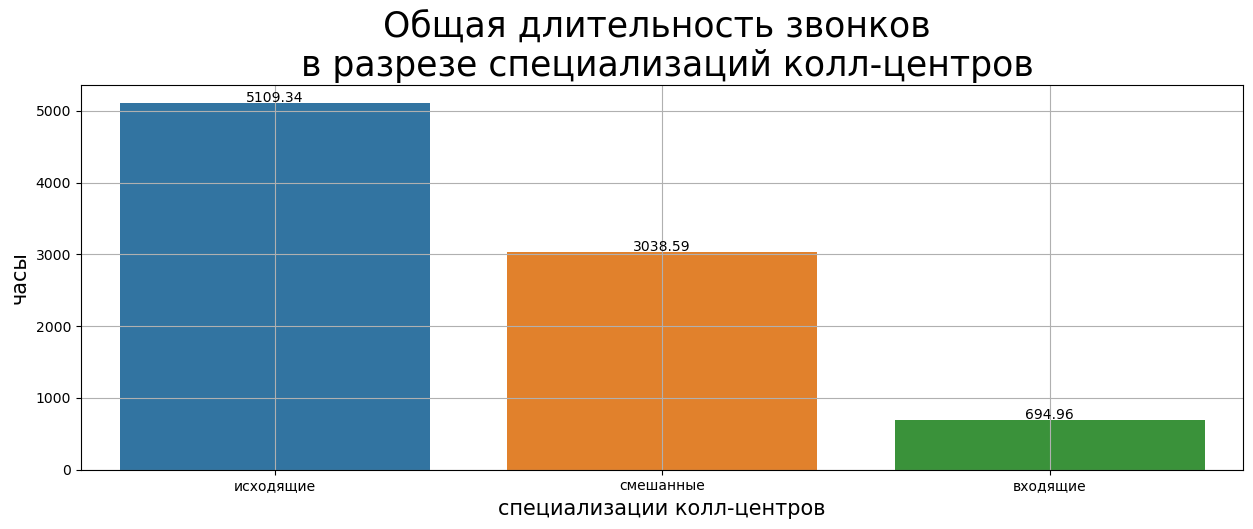

In [80]:
users_call_duration = users_call_duration.reset_index()
users_call_duration_bar = users_call_duration[['specialty', 'hours']]
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='specialty', y='hours', data=users_call_duration_bar)

for x, y in users_call_duration_bar.iterrows():
    ax.text(x, y[1]+10, str(y[1]), ha='center')
    
plt.title('Общая длительность звонков \n в разрезе специализаций колл-центров', fontsize = 25)
plt.xlabel('специализации колл-центров', fontsize = 15)
plt.ylabel('часы', fontsize = 15)
plt.grid(True)
plt.show()

Самая высокая суммарная длительность звонков (5 тысяч часов) у колл-центров, специализирующихся на обзвоне клиентов. У смешанных колл-центров такой показатель составляет 3 тысячи часов, у колл-центров, занимающихся в основном обзвоном клиентов, менее 0,7 тысячи часов.

Также посмотрим распределение суммарной длительности звонков по их направлениям (входящие/исходящие).

In [81]:
users_call_duration_in_out = dataset.loc[dataset['call_duration'] != 0]\
.groupby(['specialty', 'direction']).agg({'call_duration':'sum'})

users_call_duration_in_out['minutes'] = round(users_call_duration_in_out['call_duration']/60, 2)
users_call_duration_in_out['hours'] = round(users_call_duration_in_out['call_duration']/3600, 2)

users_call_duration_in_out = users_call_duration_in_out.reset_index()
users_call_duration_in_out_sub = users_call_duration[['specialty', 'hours']]
users_call_duration_in_out = users_call_duration_in_out.merge(users_call_duration_in_out_sub, on='specialty')

users_call_duration_in_out['ratio'] = users_call_duration_in_out['hours_x']/\
                                            users_call_duration_in_out['hours_y']

users_call_duration_in_out.sort_values(by='hours_y', ascending=False)

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
users_call_duration_in_out_1 = users_call_duration_in_out.copy()

users_call_duration_in_out_1.columns = ['специализации колл-центров', 'направления звонков',\
                                        'общая длительность звонков в секундах', 'общая длительность звонков в минутах',\
                                        'общая длительность звонков в часах',\
                                        'общая длительность всех звонков (исх + вх) в часах', 'доля исх/вх звонков']

(users_call_duration_in_out_1
 .style
 .format('{0:,.0f}', subset=['общая длительность звонков в секундах', 'общая длительность звонков в минутах',\
                             'общая длительность звонков в часах', 'общая длительность всех звонков (исх + вх) в часах'])
 .format('{0:,.2%}', subset=['доля исх/вх звонков'])
 .background_gradient(subset='доля исх/вх звонков')
 .set_caption('Общая длительность входящих/исходящих звонков <br> в разрезе специализаций колл-центров')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,специализации колл-центров,направления звонков,общая длительность звонков в секундах,общая длительность звонков в минутах,общая длительность звонков в часах,общая длительность всех звонков (исх + вх) в часах,доля исх/вх звонков
0,входящие,in,"2,344,028","39,067",651,695,93.69%
1,входящие,out,"157,846","2,631",44,695,6.31%
2,исходящие,in,"1,458,670","24,311",405,"5,109",7.93%
3,исходящие,out,"16,934,939","282,249","4,704","5,109",92.07%
4,смешанные,in,"5,451,716","90,862","1,514","3,039",49.84%
5,смешанные,out,"5,487,202","91,453","1,524","3,039",50.16%


Таким образом:
- у колл-центров со специализацией "исходящие": 92% суммарной длительности звонков занимают исходящие звонки (4,7 тысячи из 5,1 тысячи);
- у колл-центров со специализацией "смешанные": суммарная длительность звонков между входящим и исходящим направлениями практически равны (1,5 тысячи часов каждого направления из 3 тысяч часов);
- у колл-центров со специализацией "входящие" : 93% суммарной длительности звонков занимают входящие звонки (0,65 тысячи из 0,69 тысяч).

#### Данные по суммарной длительности ожидания в разрезе специализаций колл-центров.

In [82]:
users_waiting_duration = dataset.loc[dataset['waiting_duration'] != 0].groupby('specialty').agg({'waiting_duration':'sum'})\
.sort_values(by='waiting_duration', ascending=False)
users_waiting_duration['minutes'] = round(users_waiting_duration['waiting_duration']/60, 2)
users_waiting_duration['hours'] = round(users_waiting_duration['waiting_duration']/3600, 2)

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
users_waiting_duration_1 = users_waiting_duration.copy()
users_waiting_duration_1.index.names = ['специализации колл-центров']
users_waiting_duration_1.columns = ['общая длительность ожидания в секундах', 'общая длительность ожидания в минутах',\
                                    'общая длительность ожидания в часах']

(users_waiting_duration_1
 .style
 .format('{0:,.0f}', subset=['общая длительность ожидания в секундах', 'общая длительность ожидания в минутах',\
                                    'общая длительность ожидания в часах'])
 .background_gradient(subset='общая длительность ожидания в часах')
 .set_caption('Общая длительность ожидания <br> в разрезе специализаций колл-центров')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,общая длительность ожидания в секундах,общая длительность ожидания в минутах,общая длительность ожидания в часах
специализации колл-центров,,,
исходящие,"5,798,752","96,646","1,611"
смешанные,"3,029,716","50,495",842
входящие,"879,769","14,663",244


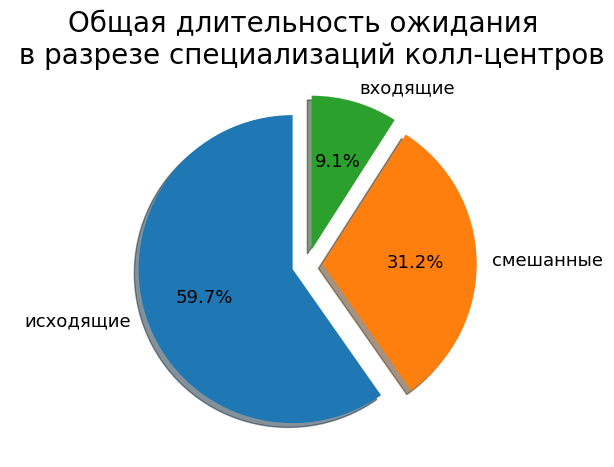

In [83]:
users_waiting_duration = users_waiting_duration.reset_index()
plt.figure(figsize=(15, 5))
ax = plt.pie(users_waiting_duration['hours'],\
             labels=users_waiting_duration['specialty'],\
             startangle=90, explode=[0.1,0.1,0.1],
       shadow=True, autopct='%2.1f%%',\
             textprops={'fontsize': 13})
plt.title('Общая длительность ожидания \n в разрезе специализаций колл-центров', fontsize = 20)   
plt.show()

Самая высокая суммарная длительность ожидания (1,6 тысяч часов) у колл-центров, специализирующихся на обзвоне клиентов. У смешанных колл-центров такой показатель составляет 0,8 тысячи часов, у колл-центров, занимающихся в основном обзвоном клиентов, - 0,2 тысячи часов.

Также посмотрим распределение суммарной длительности звонков по их направлениям (входящие/исходящие).

In [84]:
users_waiting_duration_in_out = dataset.loc[dataset['waiting_duration'] != 0]\
.groupby(['specialty', 'direction']).agg({'waiting_duration':'sum'})

users_waiting_duration_in_out['minutes'] = round(users_waiting_duration_in_out['waiting_duration']/60, 2)
users_waiting_duration_in_out['hours'] = round(users_waiting_duration_in_out['waiting_duration']/3600, 2)

users_waiting_duration_in_out = users_waiting_duration_in_out.reset_index()
users_waiting_duration_in_out_sub = users_waiting_duration[['specialty', 'hours']]
users_waiting_duration_in_out = users_waiting_duration_in_out.merge(users_waiting_duration_in_out_sub, on='specialty')

users_waiting_duration_in_out['ratio'] = users_waiting_duration_in_out['hours_x']/users_waiting_duration_in_out['hours_y']

users_waiting_duration_in_out.sort_values(by='hours_y', ascending=False)

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
users_waiting_duration_in_out_1 = users_waiting_duration_in_out.copy()

users_waiting_duration_in_out_1.columns = ['специализации колл-центров', 'направления звонков',\
                                        'общая длительность ожидания в секундах', 'общая длительность ожидания в минутах',\
                                        'общая длительность ожидания в часах',\
                                        'общая длительность ожидания (исх + вх) в часах', 'доля ожидания исх/вх звонков']

(users_waiting_duration_in_out_1
 .style
 .format('{0:,.0f}', subset=['общая длительность ожидания в секундах', 'общая длительность ожидания в минутах',\
                             'общая длительность ожидания в часах', 'общая длительность ожидания (исх + вх) в часах'])
 .format('{0:,.2%}', subset=['доля ожидания исх/вх звонков'])
 .background_gradient(subset='доля ожидания исх/вх звонков')
 .set_caption('Общая длительность ожидания входящих/исходящих звонков <br> в разрезе специализаций колл-центров')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,специализации колл-центров,направления звонков,общая длительность ожидания в секундах,общая длительность ожидания в минутах,общая длительность ожидания в часах,общая длительность ожидания (исх + вх) в часах,доля ожидания исх/вх звонков
0,входящие,in,"830,385","13,840",231,244,94.39%
1,входящие,out,"49,384",823,14,244,5.61%
2,исходящие,in,"397,477","6,625",110,"1,611",6.85%
3,исходящие,out,"5,401,275","90,021","1,500","1,611",93.15%
4,смешанные,in,"1,236,884","20,615",344,842,40.83%
5,смешанные,out,"1,792,832","29,881",498,842,59.17%


Таким образом:
- у колл-центров со специализацией "входящие" : 94% суммарной длительности звонков занимают входящие звонки (0,23 тысячи из 0,24 тысяч);
- у колл-центров со специализацией "исходящие": 93% суммарной длительности ожидания занимают исходящие звонки (1,5 тысячи из 1,6 тысячи);
- у колл-центров со специализацией "смешанные": 59% суммарной длительности ожидания занимают исходящие звонки (0,5 тысячи из 0,8 тысячи).

#### Данные по длительности одного звонка в разрезе специализаций колл-центров.

In [85]:
users_one_call_duration = dataset.loc[dataset['one_call_duration'] != 0]\
.groupby('specialty').agg({'one_call_duration':['mean', 'median','max','min']})\
.sort_values(by=('one_call_duration', 'mean'), ascending=False)

users_one_call_duration[('one_call_duration', 'mean')] = round(users_one_call_duration[('one_call_duration', 'mean')], 2)
users_one_call_duration['minutes'] = round(users_one_call_duration[('one_call_duration', 'max')]/60, 2)
users_one_call_duration['hours'] = round(users_one_call_duration[('one_call_duration', 'max')]/3600, 2)

users_one_call_duration = users_one_call_duration[[('one_call_duration', 'mean'), ('one_call_duration', 'median'),\
                                                  ('one_call_duration', 'max'), ('minutes', ''), ('hours', ''),\
                                                  ('one_call_duration', 'min')]]

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
users_one_call_duration_1 = users_one_call_duration.copy()
users_one_call_duration_1.index.names = ['специализации колл-центров']
users_one_call_duration_1.columns = ['средняя длительность одного звонка', 'медианная длительность одного звонка',\
                                    'максимальная длительность одного звонка в секундах',\
                                    'максимальная длительность одного звонка в минутах',\
                                    'максимальная длительность одного звонка в часах',\
                                    'минимальная длительность одного звонка в секундах']

(users_one_call_duration_1
 .style
 .format('{0:,.0f}', subset=['средняя длительность одного звонка', 'медианная длительность одного звонка',\
                            'максимальная длительность одного звонка в секундах'])
 .format('{0:,.2f}', subset=['максимальная длительность одного звонка в минутах',\
                            'максимальная длительность одного звонка в часах'])
 .background_gradient(subset=['средняя длительность одного звонка', 'медианная длительность одного звонка',\
                            'максимальная длительность одного звонка в секундах',\
                            'максимальная длительность одного звонка в минутах',\
                            'максимальная длительность одного звонка в часах'])
 .set_caption('Статистики одного звонка <br> в разрезе специализаций колл-центров')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,средняя длительность одного звонка,медианная длительность одного звонка,максимальная длительность одного звонка в секундах,максимальная длительность одного звонка в минутах,максимальная длительность одного звонка в часах,минимальная длительность одного звонка в секундах
специализации колл-центров,,,,,,
исходящие,134,84,"2,899",48.32,0.81,1
смешанные,106,79,"3,550",59.17,0.99,1
входящие,104,74,"2,325",38.75,0.65,1


Средняя длительность одного звонка составляет:
- у "исходящих" колл-центров - 134 секунды;
- у "смешанных" - 107 секунд;
- у "входящих" - 104 секунды.

При этом, медианные значения длительности одного звонка значительно ниже средних значений, что свидетельствует о сильном смещении средних значений из-за выбросов.

Максимальные значения длительности одного звонка составляют:
- у "исходящих" колл-центров - 48 минут;
- у "смешанных" - 59 минут;
- у "входящих" - 39 минут.

Построим диаграмму размаха, чтобы наглядно посмотреть распределения длительности одного звонка в разрезе специализации колл-центров.

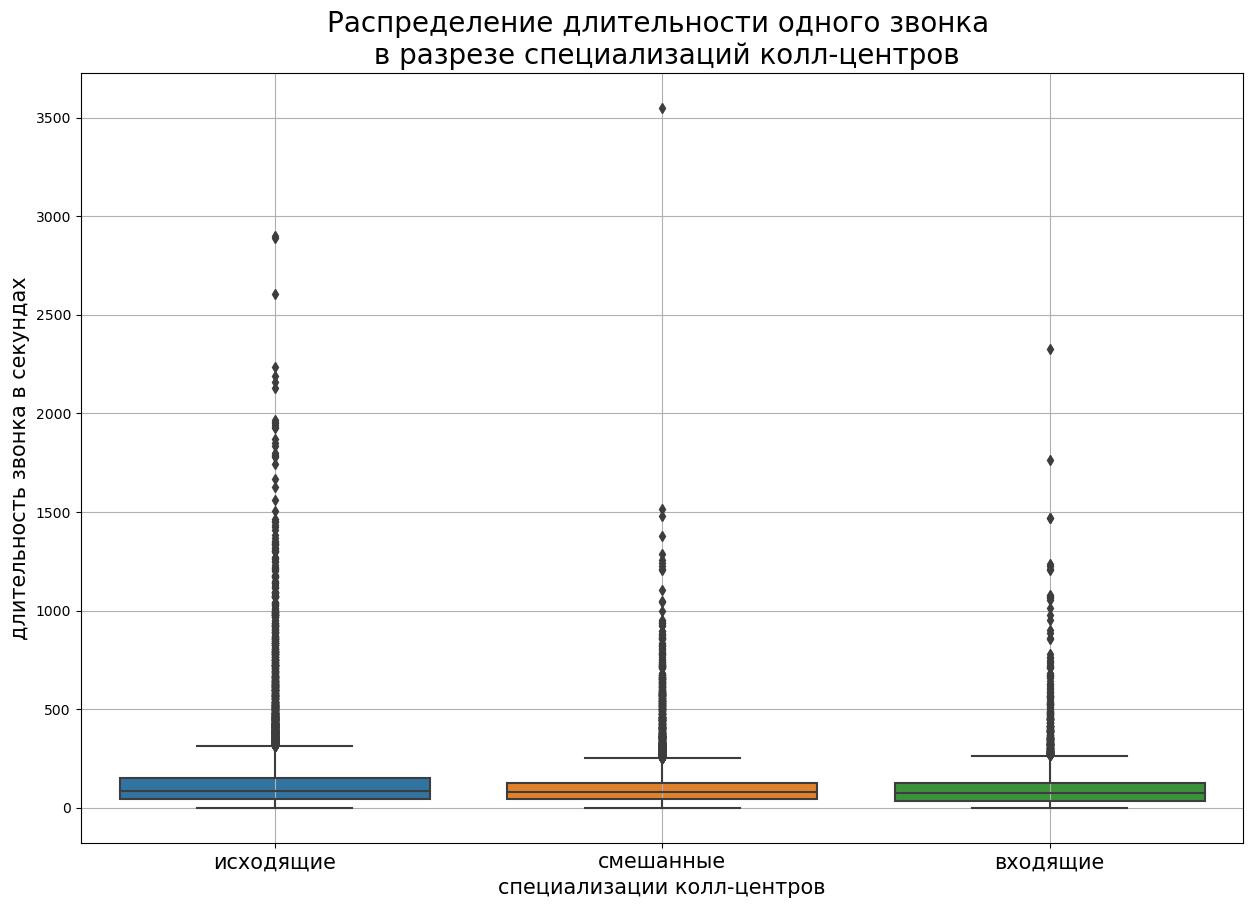

Выбросами являются данные о длительности одного звонка колл-центров "исходящие" свыше  314
Количество выбросов колл-центров "исходящие" по длительности одного звонка 937
--------------------------------------------------------------------------------
Выбросами являются данные о длительности одного звонка колл-центров "входящие" свыше  266
Количество выбросов колл-центров "входящие" по длительности одного звонка 294
--------------------------------------------------------------------------------
Выбросами являются данные о длительности одного звонка колл-центров "смешанные" свыше  252
Количество выбросов колл-центров "смешанные" по длительности одного звонка 746


In [86]:
plt.figure(figsize=(15, 10))
#создадим таблицу для сортировки боксплотов по медиане
dataset_add = dataset.loc[dataset['one_call_duration'] != 0]

grouped_one_call_duration = dataset_add.loc[:,['specialty', 'one_call_duration']] \
    .groupby(['specialty']) \
    .median() \
    .sort_values(by='one_call_duration', ascending=False)

ax = sns.boxplot(x='specialty', y='one_call_duration', \
                 data=dataset.loc[dataset['one_call_duration'] != 0], order=grouped_one_call_duration.index)
plt.title('Распределение длительности одного звонка \n в разрезе специализаций колл-центров',fontsize = 20)
plt.xlabel('специализации колл-центров', fontsize = 15)
plt.ylabel('длительность звонка в секундах', fontsize = 15)
plt.xticks(fontsize = 15)
plt.grid(True)
plt.show()


quantiles_Q3(dataset.loc[(dataset['specialty'] == 'исходящие')&(dataset['one_call_duration'] != 0)]['one_call_duration'],\
             '{0:,.0f}', 'Выбросами являются данные о длительности одного звонка колл-центров "исходящие" свыше ')            
print_quantiles_Q3(dataset.loc[dataset['one_call_duration'] != 0],\
             'Количество выбросов колл-центров "исходящие" по длительности одного звонка', 'исходящие',\
             'specialty', 'one_call_duration')
print('-' * 80)
quantiles_Q3(dataset.loc[(dataset['specialty'] == 'входящие')&(dataset['one_call_duration'] != 0)]['one_call_duration'],\
             '{0:,.0f}', 'Выбросами являются данные о длительности одного звонка колл-центров "входящие" свыше ')
print_quantiles_Q3(dataset.loc[dataset['one_call_duration'] != 0],\
             'Количество выбросов колл-центров "входящие" по длительности одного звонка', 'входящие',\
             'specialty', 'one_call_duration')
print('-' * 80)
quantiles_Q3(dataset.loc[(dataset['specialty'] == 'смешанные')&(dataset['one_call_duration'] != 0)]['one_call_duration'],\
             '{0:,.0f}', 'Выбросами являются данные о длительности одного звонка колл-центров "смешанные" свыше ')
print_quantiles_Q3(dataset.loc[dataset['one_call_duration'] != 0],\
             'Количество выбросов колл-центров "смешанные" по длительности одного звонка', 'смешанные',\
             'specialty', 'one_call_duration')

Как видно на графиках, значительное количество выбросов смещают среднее значения длительности одного звонка в разрезе специализации колл-центров. Учитывая, что суммарная длительность звонков одного оператора в день, а также количество звонков одного оператора в день соответствуют нормам (двенадцати часовой рабочий день оператора, максимум 300 звонков в день (25 звонков в минуту)), то наличие выбросов свидетельствует о фактах внештатных ситуаций (например, звонок клиенту длительностью 59 минут).

Ограничим ось ординат, убрав выбросы.

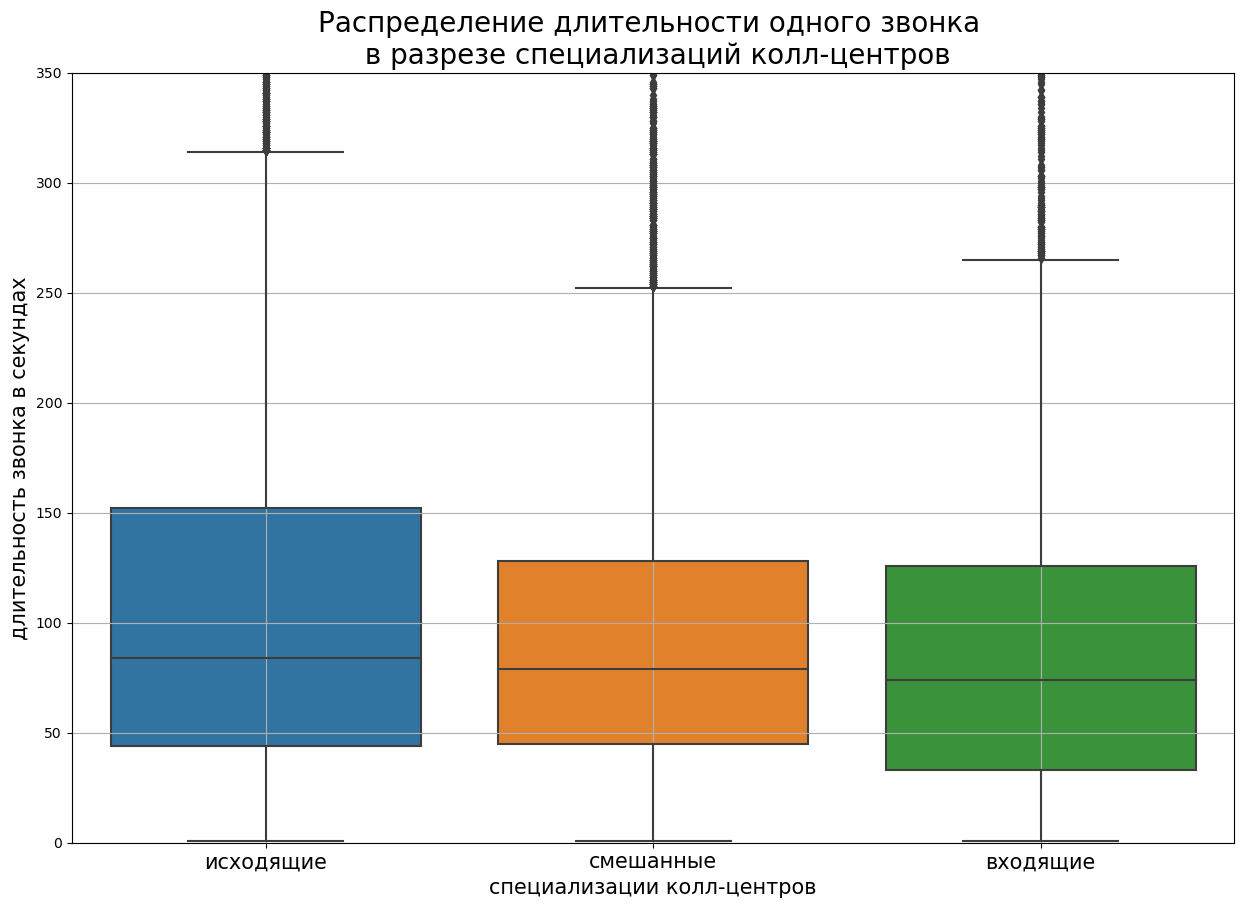

In [87]:
plt.figure(figsize=(15, 10))
#создадим таблицу для сортировки боксплотов по медиане
dataset_add = dataset.loc[dataset['one_call_duration'] != 0]
grouped_one_call_duration = dataset_add.loc[:,['specialty', 'one_call_duration']] \
    .groupby(['specialty']) \
    .median() \
    .sort_values(by='one_call_duration', ascending=False)

ax = sns.boxplot(x='specialty', y='one_call_duration', data=dataset.loc[dataset['one_call_duration'] != 0],\
                 order=grouped_one_call_duration.index)
plt.title('Распределение длительности одного звонка \n в разрезе специализаций колл-центров',fontsize = 20)
plt.xlabel('специализации колл-центров', fontsize = 15)
plt.ylabel('длительность звонка в секундах', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylim([0, 350])
plt.grid(True)
plt.show()

Наибольшее медианное значение длительности одного звонка у "исходящих" колл-центров (84 секунды), у "смешанных" и "входящих" колл-центров данный показатель примерно одинаковый и составляет 79 секунд и 74 секунды соответственно.

#### Данные по длительности одного звонка в разрезе направлений звонков колл-центров.

In [88]:
users_one_call_duration_in_out = dataset.loc[dataset['one_call_duration'] != 0]\
.groupby('direction').agg({'one_call_duration':['mean', 'median','max','min']})\
.sort_values(by=('one_call_duration', 'mean'), ascending=False)

users_one_call_duration_in_out[('one_call_duration', 'mean')] =\
round(users_one_call_duration_in_out[('one_call_duration', 'mean')], 2)
users_one_call_duration_in_out['minutes'] =\
round(users_one_call_duration_in_out[('one_call_duration', 'max')]/60, 2)
users_one_call_duration_in_out['hours'] =\
round(users_one_call_duration_in_out[('one_call_duration', 'max')]/3600, 2)

users_one_call_duration_in_out = users_one_call_duration_in_out[[('one_call_duration', 'mean'),\
                                                                 ('one_call_duration', 'median'),\
                                                                 ('one_call_duration', 'max'),\
                                                                 ('minutes', ''),\
                                                                 ('hours', ''),\
                                                                 ('one_call_duration', 'min')]]

users_one_call_duration_in_out

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
users_one_call_duration_in_out_1 = users_one_call_duration_in_out.copy()
users_one_call_duration_in_out_1.index.names = ['направления звонков']
users_one_call_duration_in_out_1.columns = ['средняя длительность одного звонка', 'медианная длительность одного звонка',\
                                    'максимальная длительность одного звонка в секундах',\
                                    'максимальная длительность одного звонка в минутах',\
                                    'максимальная длительность одного звонка в часах',\
                                    'минимальная длительность одного звонка в секундах']

(users_one_call_duration_in_out_1
 .style
 .format('{0:,.0f}', subset=['средняя длительность одного звонка', 'медианная длительность одного звонка',\
                            'максимальная длительность одного звонка в секундах'])
 .format('{0:,.2f}', subset=['максимальная длительность одного звонка в минутах',\
                            'максимальная длительность одного звонка в часах'])
 .background_gradient(subset=['средняя длительность одного звонка', 'медианная длительность одного звонка',\
                            'максимальная длительность одного звонка в секундах',\
                            'максимальная длительность одного звонка в минутах',\
                            'максимальная длительность одного звонка в часах'])
 .set_caption('Статистики одного звонка <br> в разрезе направлений звонков (входящие/исходящие)')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,средняя длительность одного звонка,медианная длительность одного звонка,максимальная длительность одного звонка в секундах,максимальная длительность одного звонка в минутах,максимальная длительность одного звонка в часах,минимальная длительность одного звонка в секундах
направления звонков,,,,,,
out,122,77,"3,550",59.17,0.99,1
in,113,83,"2,325",38.75,0.65,1


Средняя длительность одного исходящего звонка выше аналогичного показателя по входящему звонку: 122 секунды и 113 секунд соответственно. 

При этом, медианное значение рассматриваемого показателя у исходящих звонков превышает входящие звонки: 83 секунды и 77 секунд соответственно. Что указывает на значительное количество выбросов по исходящим звонкам, которые смещают среднее значение.

Максимальная продолжительность исходящего звонка составляет 59 минут, а входящего - 39 минут.

Минимальная продолжительность у исходящего звонка, как и у входящего - 1 минута.

Так как рассматриваемый критерий может являться одним из показателей эффективности работы операторов, необходимо определить порог, после которого длительность звонков обоих направлений будет считаться недопустимой.

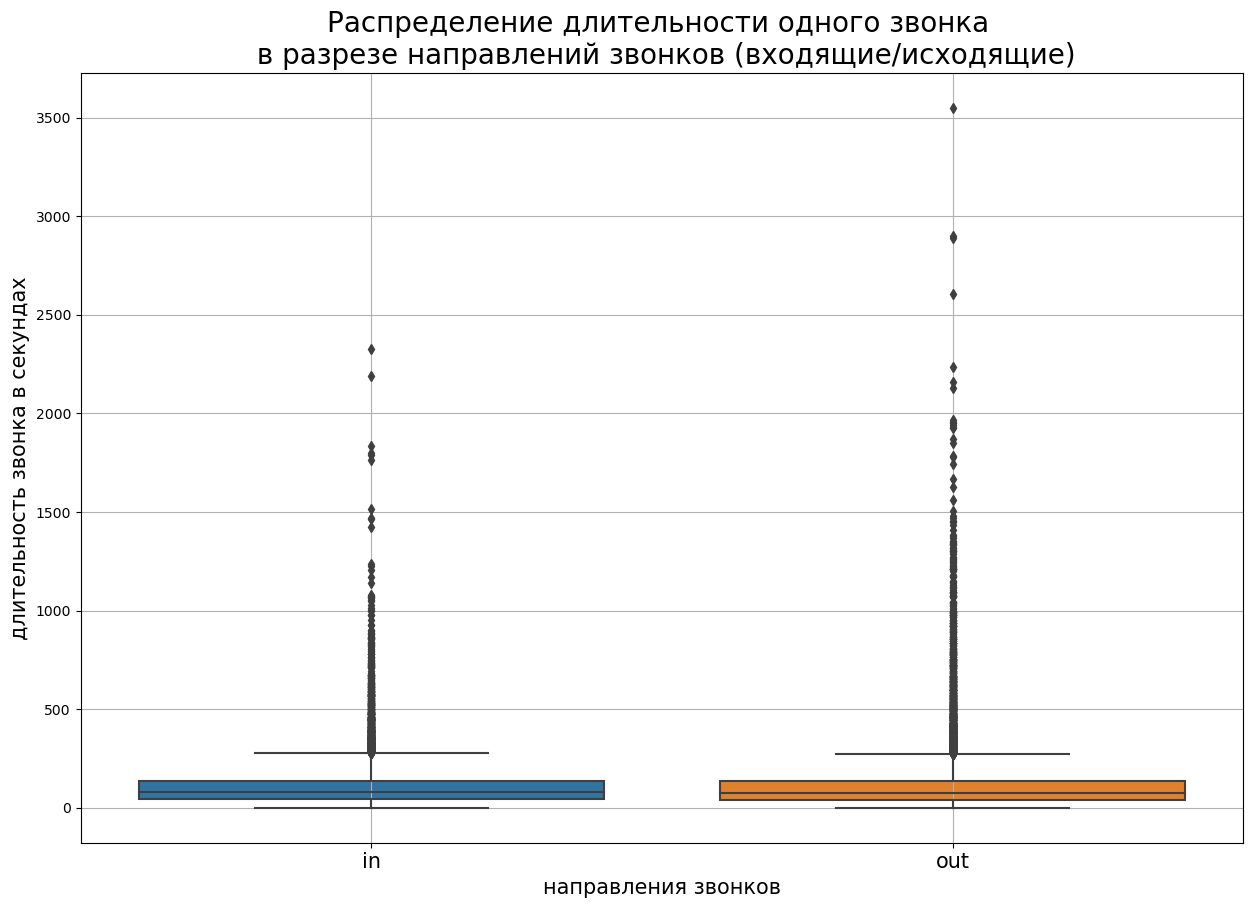

Выбросами являются данные о длительности одного исходящего звонка колл-центра свыше  278
Количество выбросов по длительности одного исходящего звонка 820
--------------------------------------------------------------------------------
Выбросами являются данные о длительности одного звонка колл-центров "входящие" свыше  274
Количество выбросов по длительности одного входящего звонка 1272


In [89]:
plt.figure(figsize=(15, 10))
#создадим таблицу для сортировки боксплотов по медиане
dataset_add = dataset.loc[dataset['one_call_duration'] != 0]

grouped_one_call_duration = dataset_add.loc[:,['direction', 'one_call_duration']] \
    .groupby(['direction']) \
    .median() \
    .sort_values(by='one_call_duration', ascending=False)

ax = sns.boxplot(x='direction', y='one_call_duration', \
                 data=dataset.loc[dataset['one_call_duration'] != 0], order=grouped_one_call_duration.index)
plt.title('Распределение длительности одного звонка \n в разрезе направлений звонков (входящие/исходящие)',fontsize = 20)
plt.xlabel('направления звонков', fontsize = 15)
plt.ylabel('длительность звонка в секундах', fontsize = 15)
plt.xticks(fontsize = 15)
plt.grid(True)
plt.show()

quantiles_Q3(dataset.loc[(dataset['direction'] == 'in')&(dataset['one_call_duration'] != 0)]['one_call_duration'],\
             '{0:,.0f}', 'Выбросами являются данные о длительности одного исходящего звонка колл-центра свыше ')            
print_quantiles_Q3(dataset.loc[dataset['one_call_duration'] != 0],\
             'Количество выбросов по длительности одного исходящего звонка', 'in',\
             'direction', 'one_call_duration')
print('-' * 80)
quantiles_Q3(dataset.loc[(dataset['direction'] == 'out')&(dataset['one_call_duration'] != 0)]['one_call_duration'],\
             '{0:,.0f}', 'Выбросами являются данные о длительности одного звонка колл-центров "входящие" свыше ')
print_quantiles_Q3(dataset.loc[dataset['one_call_duration'] != 0],\
             'Количество выбросов по длительности одного входящего звонка', 'out',\
             'direction', 'one_call_duration')

В качестве верхнего порогового значения длительности входящего/исходящего звонка, превышение которого будет указывать на неэффективность оператора, возьмём сумму третьего квартиля и полуторного межквартильного размаха.

In [90]:
column = dataset.loc[(dataset['direction'] == 'in')&(dataset['one_call_duration'] != 0)]['one_call_duration']
print('Верхняя граница межквартильного размаха для длительности одного входящего звонка',\
      calculation_quantile(5, column))

column = dataset.loc[(dataset['direction'] == 'out')&(dataset['one_call_duration'] != 0)]['one_call_duration']
print('Верхняя граница межквартильного размаха для длительности одного исходящего звонка',\
      calculation_quantile(5, column))

Верхняя граница межквартильного размаха для длительности одного входящего звонка 277.5
Верхняя граница межквартильного размаха для длительности одного исходящего звонка 274.5


Верхние пороговые значения и для входящих, и для исходящих звонков получились практически равными:
- у входящих звонков - 277,5 секунды;
- у исходящих звонков - 274,5 секунды.

Следовательно, возьмём в качестве верхнего порогового значения 300 секунд или 5 минут. Посмотрим количество таких звонков в разрезе колл-центров.

При этом, как и ранее в исследовании, возьмём для проведения расчётов те колл-центры, в которых в абсолютном выражении количество звонков более 50.

In [91]:
one_call_duration_ceiling = dataset.loc[(dataset['one_call_duration'] > 300)&(dataset['is_missed_call'] == False)]\
                                    .groupby('user_id')\
                                    .agg({'calls_count':'sum', 'one_call_duration':'mean'})\
                                    .sort_values(by='one_call_duration', ascending=False)
one_call_duration_ceiling['one_call_duration'] = round(one_call_duration_ceiling['one_call_duration'], 2)

one_call_duration_ceiling = one_call_duration_ceiling.loc[one_call_duration_ceiling['calls_count'] > 50]

print('Количество колл-центров, у которых средняя продолжительность одного звонка превышает 5 минут, составляет',\
     len(one_call_duration_ceiling), 'организации.')

Количество колл-центров, у которых средняя продолжительность одного звонка превышает 5 минут, составляет 26 организации.


В качестве нижнего порогового значения длительности входящего/исходящего звонка, недостижение которого будет указывать на неэффективность оператора, возьмём первый квартиль.

In [92]:
column = dataset.loc[(dataset['direction'] == 'in')&(dataset['one_call_duration'] != 0)]['one_call_duration']
print('Нижняя граница (первый квартиль) длительности одного входящего звонка',\
      calculation_quantile(2, column))

column = dataset.loc[(dataset['direction'] == 'out')&(dataset['one_call_duration'] != 0)]['one_call_duration']
print('Нижняя граница (первый квартиль) длительности одного исходящего звонка',\
      calculation_quantile(2, column))

Нижняя граница (первый квартиль) длительности одного входящего звонка 45.0
Нижняя граница (первый квартиль) длительности одного исходящего звонка 42.0


Нижние пороговые значения и для входящих, и для исходящих звонков получились практически равными:
- у входящих звонков - 45 секунд;
- у исходящих звонков - 42 секунды.

Следовательно, возьмём в качестве нижнего порогового значения 60 секунд или 1 минуту. Посмотрим количество таких звонков в разрезе колл-центров, у которых также суммарное количество звонков не менее 50.

In [93]:
one_call_duration_floor = dataset.loc[(dataset['one_call_duration'] < 60)&(dataset['is_missed_call'] == False)]\
                                    .groupby('user_id')\
                                    .agg({'calls_count':'sum', 'one_call_duration':'mean'})\
                                    .sort_values(by='one_call_duration', ascending=True)
one_call_duration_floor['one_call_duration'] = round(one_call_duration_floor['one_call_duration'], 2)

one_call_duration_floor = one_call_duration_floor.loc[one_call_duration_floor['calls_count'] > 50]

print('Количество колл-центров, у которых средняя продолжительность одного звонка не превышает 1 минуту, составляет',\
     len(one_call_duration_floor), 'организации.')

Количество колл-центров, у которых средняя продолжительность одного звонка не превышает 1 минуту, составляет 124 организации.


#### Данные по длительности ожидания одного звонка в разрезе специализаций колл-центров.

In [94]:
one_waiting_duration = dataset.groupby('specialty').agg({'one_waiting_duration':['mean', 'median','max','min']})\
.sort_values(by=('one_waiting_duration', 'mean'), ascending=False)
one_waiting_duration[('one_waiting_duration', 'mean')] = round(one_waiting_duration[('one_waiting_duration', 'mean')], 2)
one_waiting_duration['minutes'] = round(one_waiting_duration[('one_waiting_duration', 'max')]/60, 2)
one_waiting_duration = one_waiting_duration[[('one_waiting_duration', 'mean'), ('one_waiting_duration', 'median'),\
                                                  ('one_waiting_duration', 'max'), ('minutes', ''),\
                                                  ('one_waiting_duration', 'min')]]

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
one_waiting_duration_1 = one_waiting_duration.copy()
one_waiting_duration_1.index.names = ['специализации колл-центров']
one_waiting_duration_1.columns = ['средняя длительность ожидания одного звонка', 'медианная длительность ожидания одного звонка',\
                                    'максимальная длительность ожидания одного звонка в секундах',\
                                    'максимальная длительность ожидания одного звонка в минутах',\
                                    'минимальная длительность ожидания одного звонка в секундах']

(one_waiting_duration_1
 .style
 .format('{0:,.0f}', subset=['средняя длительность ожидания одного звонка', 'медианная длительность ожидания одного звонка',\
                            'максимальная длительность ожидания одного звонка в секундах'])
 .format('{0:,.2f}', subset=['максимальная длительность ожидания одного звонка в минутах'])
 .background_gradient(subset=['средняя длительность ожидания одного звонка', 'медианная длительность ожидания одного звонка',\
                            'максимальная длительность ожидания одного звонка в секундах',\
                            'максимальная длительность ожидания одного звонка в минутах'])
 .set_caption('Статистики ожидания одного звонка <br> в разрезе специализаций колл-центров')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,средняя длительность ожидания одного звонка,медианная длительность ожидания одного звонка,максимальная длительность ожидания одного звонка в секундах,максимальная длительность ожидания одного звонка в минутах,минимальная длительность ожидания одного звонка в секундах
специализации колл-центров,,,,,
входящие,18,15,294,4.90,0
смешанные,17,14,366,6.10,0
исходящие,16,14,465,7.75,0


Средняя длительность ожидания одного звонка у колл-центров всех специализаций практически одинакова и составляет от 16 до 18 секунд.

При этом, медианные значения длительности ожидания одного звонка незначительно ниже средних значений, что свидетельствует о невысоком количестве выбросов.

Максимальные значения длительности одного звонка составляют от 5 минут до 8 минут:
- у "исходящих" колл-центров - 8 минут;
- у "смешанных" - 6 минут;
- у "входящих" - 5 минут.

Построим диаграмму размаха, чтобы наглядно посмотреть распределения длительности одного звонка в разрезе специализации колл-центров.

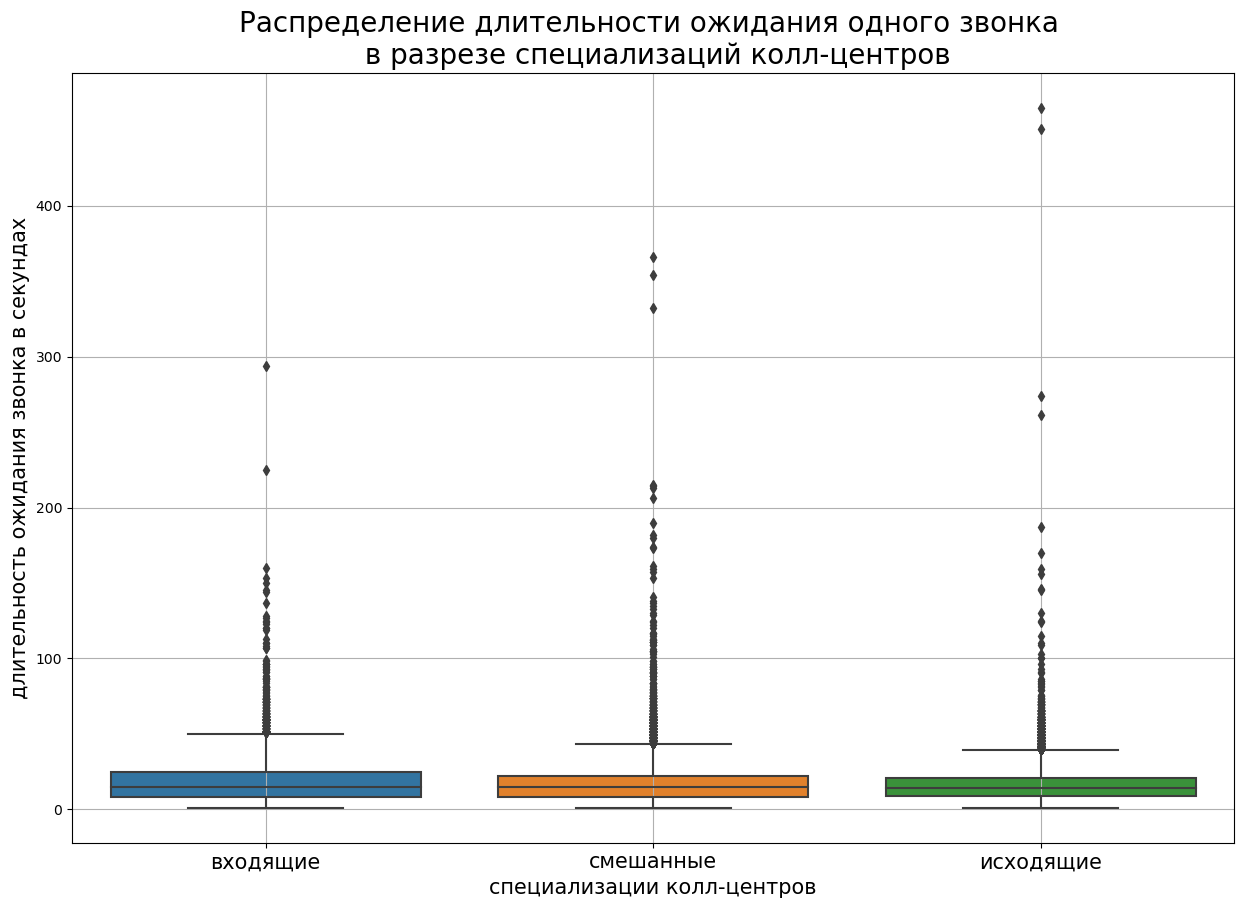

Выбросами являются данные о длительности ожидания одного звонка колл-центров "исходящие" свыше  39
Количество выбросов колл-центров "исходящие" по длительности ожидания одного звонка 917
--------------------------------------------------------------------------------
Выбросами являются данные о длительности одного звонка колл-центров "входящие" свыше  50
Количество выбросов колл-центров "входящие" по длительности ожидания одного звонка 252
--------------------------------------------------------------------------------
Выбросами являются данные о длительности ожидания одного звонка колл-центров "смешанные" свыше  43
Количество выбросов колл-центров "смешанные" по длительности ожидания одного звонка 687


In [95]:
plt.figure(figsize=(15, 10))
#создадим таблицу для сортировки боксплотов по медиане
dataset_add = dataset.loc[dataset['one_waiting_duration'] != 0]

grouped_one_waiting_duration = dataset_add.loc[:,['specialty', 'one_waiting_duration']] \
    .groupby(['specialty']) \
    .median() \
    .sort_values(by='one_waiting_duration', ascending=False)

ax = sns.boxplot(x='specialty', y='one_waiting_duration', \
                 data=dataset.loc[dataset['one_waiting_duration'] != 0], order=grouped_one_waiting_duration.index)
plt.title('Распределение длительности ожидания одного звонка \n в разрезе специализаций колл-центров',fontsize = 20)
plt.xlabel('специализации колл-центров', fontsize = 15)
plt.ylabel('длительность ожидания звонка в секундах', fontsize = 15)
plt.xticks(fontsize = 15)
plt.grid(True)
plt.show()

quantiles_Q3(dataset.loc[(dataset['specialty'] == 'исходящие')&(dataset['one_waiting_duration'] != 0)]\
             ['one_waiting_duration'],\
             '{0:,.0f}', 'Выбросами являются данные о длительности ожидания одного звонка колл-центров "исходящие" свыше ')            
print_quantiles_Q3(dataset.loc[dataset['one_waiting_duration'] != 0],\
             'Количество выбросов колл-центров "исходящие" по длительности ожидания одного звонка', 'исходящие',\
             'specialty', 'one_waiting_duration')
print('-' * 80)
quantiles_Q3(dataset.loc[(dataset['specialty'] == 'входящие')&(dataset['one_waiting_duration'] != 0)]\
             ['one_waiting_duration'],\
             '{0:,.0f}', 'Выбросами являются данные о длительности одного звонка колл-центров "входящие" свыше ')
print_quantiles_Q3(dataset.loc[dataset['one_waiting_duration'] != 0],\
             'Количество выбросов колл-центров "входящие" по длительности ожидания одного звонка', 'входящие',\
             'specialty', 'one_waiting_duration')
print('-' * 80)
quantiles_Q3(dataset.loc[(dataset['specialty'] == 'смешанные')&(dataset['one_waiting_duration'] != 0)]\
             ['one_waiting_duration'],\
             '{0:,.0f}', 'Выбросами являются данные о длительности ожидания одного звонка колл-центров "смешанные" свыше ')
print_quantiles_Q3(dataset.loc[dataset['one_waiting_duration'] != 0],\
             'Количество выбросов колл-центров "смешанные" по длительности ожидания одного звонка', 'смешанные',\
             'specialty', 'one_waiting_duration')

Как видно на графиках, пороговые значения для выбросов по всем специализациям меньше минуты:
- "входящие" колл-центры - 50 секунд;
- "смешанные" - 43 секунды;
- "исходящие" - 39 секунд.

Ограничим ось ординат, убрав выбросы.

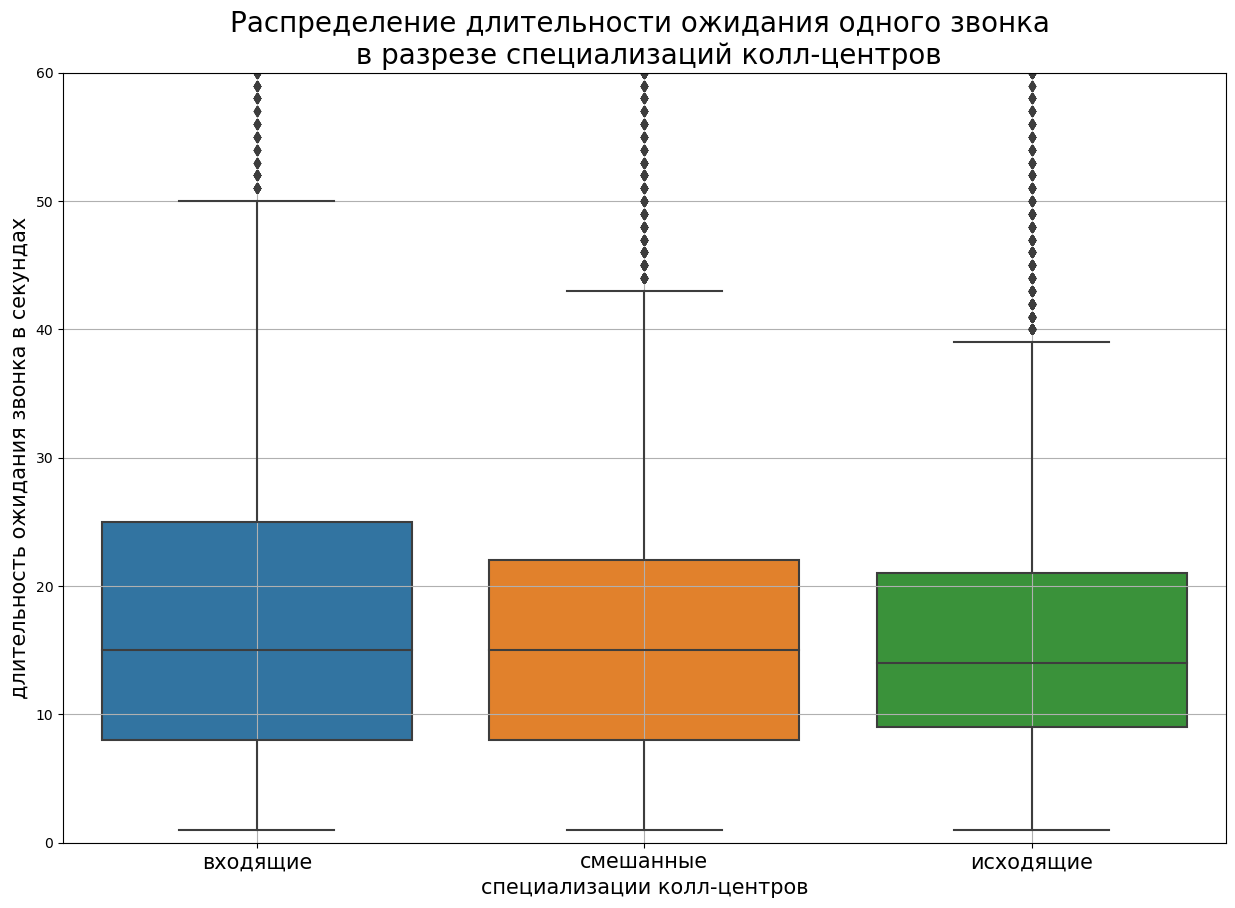

In [96]:
plt.figure(figsize=(15, 10))
#создадим таблицу для сортировки боксплотов по медиане
dataset_add = dataset.loc[dataset['one_waiting_duration'] != 0]

grouped_one_waiting_duration = dataset_add.loc[:,['specialty', 'one_waiting_duration']] \
    .groupby(['specialty']) \
    .median() \
    .sort_values(by='one_waiting_duration', ascending=False)

ax = sns.boxplot(x='specialty', y='one_waiting_duration', \
                 data=dataset.loc[dataset['one_waiting_duration'] != 0], order=grouped_one_waiting_duration.index)
plt.title('Распределение длительности ожидания одного звонка \n в разрезе специализаций колл-центров',fontsize = 20)
plt.xlabel('специализации колл-центров', fontsize = 15)
plt.ylabel('длительность ожидания звонка в секундах', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylim([0, 60])
plt.grid(True)
plt.show()

Медианное значение длительности ожидания одного звонка у колл-центров всех специализаций практически равна:
- "входящие" колл-центры - 15 секунд;
- "исходящие" и "смешанные" - по 14 секунд.

#### Данные по длительности ожидания одного звонка в разрезе направлениий звонков колл-центров.

In [97]:
users_one_waiting_duration_in_out = dataset.loc[dataset['one_waiting_duration'] != 0]\
.groupby('direction').agg({'one_waiting_duration':['mean', 'median','max','min']})\
.sort_values(by=('one_waiting_duration', 'mean'), ascending=False)

users_one_waiting_duration_in_out[('one_waiting_duration', 'mean')] =\
round(users_one_waiting_duration_in_out[('one_waiting_duration', 'mean')], 2)
users_one_waiting_duration_in_out['minutes'] =\
round(users_one_waiting_duration_in_out[('one_waiting_duration', 'max')]/60, 2)
users_one_waiting_duration_in_out['hours'] =\
round(users_one_waiting_duration_in_out[('one_waiting_duration', 'max')]/3600, 2)

users_one_waiting_duration_in_out = users_one_waiting_duration_in_out[[('one_waiting_duration', 'mean'),\
                                                                       ('one_waiting_duration', 'median'),\
                                                                       ('one_waiting_duration', 'max'),\
                                                                       ('minutes', ''),\
                                                                       ('hours', ''),\
                                                                       ('one_waiting_duration', 'min')]]


#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
users_one_waiting_duration_in_out_1 = users_one_waiting_duration_in_out.copy()
users_one_waiting_duration_in_out_1.index.names = ['направления звонков']
users_one_waiting_duration_in_out_1.columns = ['средняя длительность ожидания одного звонка',\
                                               'медианная длительность ожидания одного звонка',\
                                               'максимальная длительность ожидания одного звонка в секундах',\
                                               'максимальная длительность ожидания одного звонка в минутах',\
                                               'максимальная длительность ожидания одного звонка в часах',\
                                               'минимальная длительность ожидания одного звонка в секундах']

(users_one_waiting_duration_in_out_1
 .style
 .format('{0:,.0f}', subset=['средняя длительность ожидания одного звонка', 'медианная длительность ожидания одного звонка',\
                            'максимальная длительность ожидания одного звонка в секундах',\
                            'минимальная длительность ожидания одного звонка в секундах'])
 .format('{0:,.2f}', subset=['максимальная длительность ожидания одного звонка в минутах',\
                             'максимальная длительность ожидания одного звонка в часах'])
 .background_gradient(subset=['средняя длительность ожидания одного звонка', 'медианная длительность ожидания одного звонка',\
                            'максимальная длительность ожидания одного звонка в секундах'])
 .set_caption('Статистики ожидания одного звонка <br> в разрезе направлений звонков (входящие/исходящие)')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,средняя длительность ожидания одного звонка,медианная длительность ожидания одного звонка,максимальная длительность ожидания одного звонка в секундах,максимальная длительность ожидания одного звонка в минутах,максимальная длительность ожидания одного звонка в часах,минимальная длительность ожидания одного звонка в секундах
направления звонков,,,,,,
in,18,14,465,7.75,0.13,1
out,17,15,451,7.52,0.13,1


Средняя длительность ожидания одного звонка как входящего, так и исходящего практически равны: 18 секунд и 17 секунд соответственно.

При этом, медианное значение рассматриваемого показателя как у водящих, так и исходящих звонков незначительно меньше средних значений рассматриваемого показателя:
- "исходящие" - 15 секунд;
- "входящие" - 14 секунд.

Максимальная продолжительность ожидания как входящего, так и исходяшего звонков почти 8 минут.

Минимальная продолжительность у исходящего звонка, как и у входящего - 1 секунда.

Для определения эффективности далее будет рассматривать длительность ожидания входящего звонка, так как именно при таком направлении звонка ждёт клиент, а не оператор.

Так как рассматриваемый критерий может являться одним из показателей эффективности работы операторов, необходимо определить порог, после которого длительность ожидания входящего звонка будет считаться недопустимой.

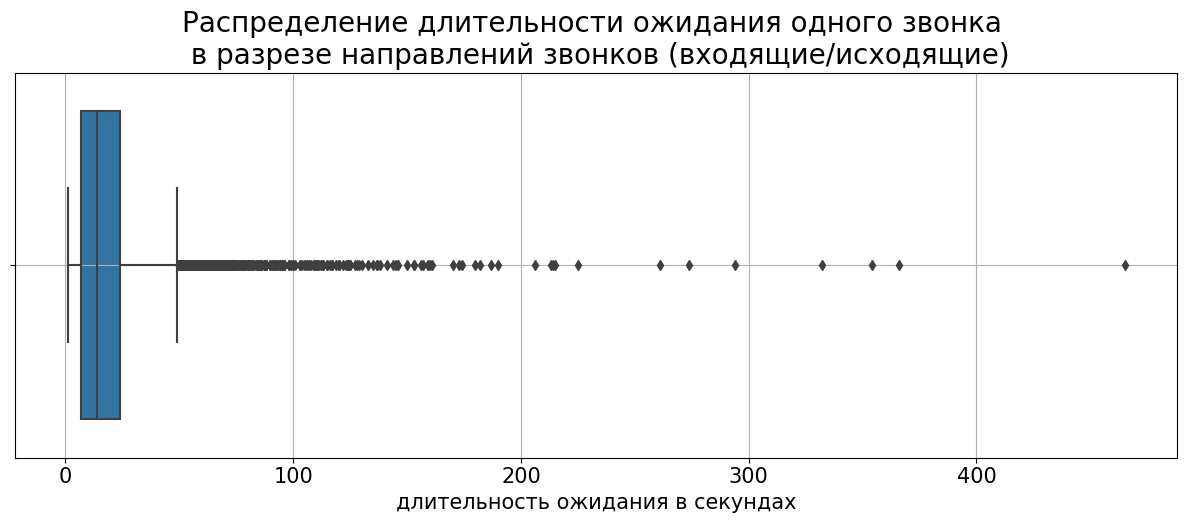

Первый квартиль для длительности ожидания одного входящего звонка 7.0
Второй квартиль (медиана) для длительности ожидания одного входящего звонка 14.0
Третий квартиль для длительности ожидания одного входящего звонка 24.0
Верхняя граница межквартильного размаха для длительности ожидания одного входящего звонка 49.5


In [98]:
#выделим отдельно столбец с долями внутренних исходящих звонков, где количество исходящих звонков более 50
create_boxplot(dataset.loc[(dataset['one_waiting_duration'] != 0)&(dataset['direction'] == 'in')]['one_waiting_duration'],\
               'Распределение длительности ожидания одного звонка \n в разрезе направлений звонков (входящие/исходящие)',\
               'длительность ожидания в секундах')

column = dataset.loc[(dataset['one_waiting_duration'] != 0)&(dataset['direction'] == 'in')]['one_waiting_duration']
print('Первый квартиль для длительности ожидания одного входящего звонка', \
      calculation_quantile(2, column))
print('Второй квартиль (медиана) для длительности ожидания одного входящего звонка', \
      calculation_quantile(3, column))
print('Третий квартиль для длительности ожидания одного входящего звонка', \
      calculation_quantile(4, column))
print('Верхняя граница межквартильного размаха для длительности ожидания одного входящего звонка',\
      calculation_quantile(5, column))

В статье "Call-центр для входящих звонков. Кому нужен и как организовать" на сайте beeline.ru (https://b2blog.beeline.ru/call-centr-dlia-vhodiashchikh-zvonkov/) указано, что "Необходимо обращать внимание на время ожидания: 20 секунд — допустимо, а в течение 2 минут — уже нет. Время, которое клиент согласен потратить на ожидание соединения, зависит от того, с какой проблемой он звонит. Например, чтобы заблокировать пластиковую карту, клиент согласен «висеть» на линии и две, и три минуты. Но если хочет уточнить процентную ставку по кредиту, он, скорее всего, сбросит звонок через 20–40 секунд.".

Следовательно, учитывая данные из рассматриваемой статьи и значения на графике, установим пороговое значение для длительности ожидания одного входящего звонка в 24 секунды (третий квартиль).

При этом, как и ранее в исследовании, возьмём для проведения расчётов те колл-центры, в которых в абсолютном выражении количество звонков более 50.

In [99]:
one_waiting_duration_users = dataset.loc[(dataset['one_waiting_duration'] > 24)&(dataset['direction'] == 'in')]\
                                    .groupby('user_id')\
                                    .agg({'calls_count':'sum', 'one_waiting_duration':'mean'})\
                                    .sort_values(by='one_waiting_duration', ascending=False)
one_waiting_duration_users['one_waiting_duration'] = round(one_waiting_duration_users['one_waiting_duration'], 2)

one_waiting_duration_users = one_waiting_duration_users.loc[one_waiting_duration_users['calls_count'] > 50]
                                                          
print('Количество колл-центров, у которых средняя продолжительность ожидания одного звонка превышает 24 секунды, составляет',\
     len(one_waiting_duration_users), 'организации.')

Количество колл-центров, у которых средняя продолжительность ожидания одного звонка превышает 24 секунды, составляет 59 организации.


## Данные об операторах.

Для работы будем использовать ранее созданный срез исходного датасета (operators), за исключением тех строк, в которых отсутствует идентификатор оператора.

В пункте 4.1.5 определили, что:
- всего в датасете есть сведения о работе 1 078 операторов;
- каждый оператор работает не более чем в одном колл-центре.

### Количество отработанных дней.

In [100]:
operators_dates = operators.groupby('operator_id').agg({'date':'nunique'}).sort_values(by='date', ascending=False)

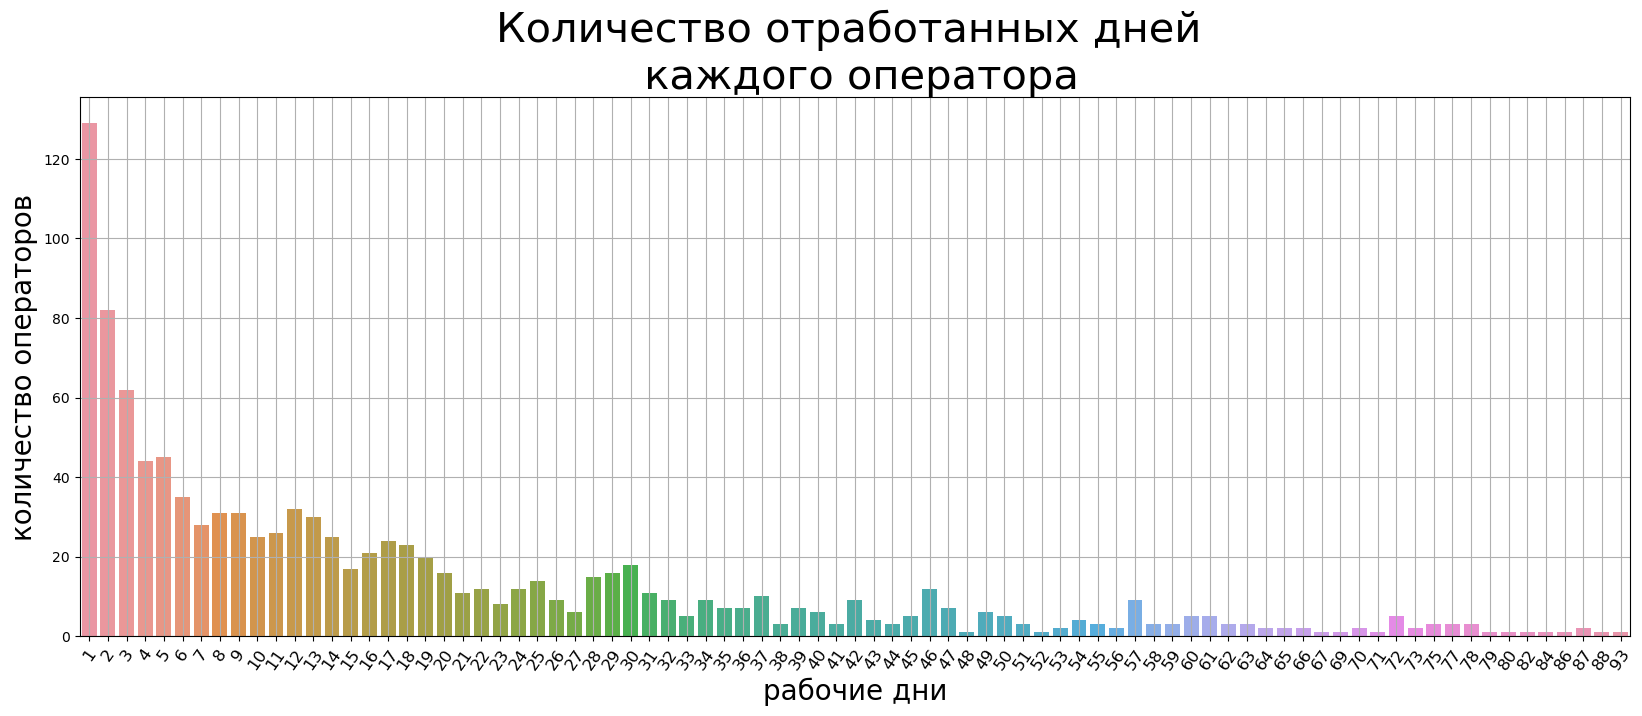

Среднее количество рабочих дней операторов составляет 18.0 дней.
Медианное количество рабочих дней операторов составляет 12.0 дней.


In [101]:
plt.figure(figsize=(20, 7))
ax = sns.countplot(x='date', data=operators_dates)
plt.title('Количество отработанных дней \n каждого оператора',\
          fontsize = 30)
plt.xlabel('рабочие дни', fontsize = 20)
plt.xticks(rotation=55, fontsize = 12)
plt.ylabel('количество операторов', fontsize = 20)
plt.grid(True)
plt.show()

print('Среднее количество рабочих дней операторов составляет', round(operators_dates['date'].mean(), 0), 'дней.')
print('Медианное количество рабочих дней операторов составляет', round(operators_dates['date'].median(), 0), 'дней.')

Как видно, у большинства операторов (от 40 до более 120 человек) есть данные о работе не более, чем за 5 дней.
От 20 до 40 операторов есть данные о работе не более, чем за 19 дней работы. При этом, среднее число рабочих дней составляет 18 дней, а медианное - 12 дней.

Следовательно, сравнивать абсолютные величины (например, количество произведённых исходящих звонков) не представляется возможным. Решением может послужить сравнение относительных величин (например, доля пропущенных звонков от общего количество входящих звонков).

### Данные по статистикам звонков операторов.

#### Данные по количеству звонков в день на одного оператора.

В пункте 4.2.1 установили, что среднее число рабочих дней оператора составляет 18 дней, а медианное - 12 дней. При этом, есть операторы, данные о работе которых есть не более чем за 5 дней.

Чтобы корректно рассчитать среднее количество звонков в день на одного оператора, возьмём только тех операторов, данные о работе которых есть более чем за 5 дней.

In [102]:
def statistics_one_operator(column):
    """Функция для расчёта и вывода статистик на одного оператора"""
    print('Среднее количество звонков в день на одного оператора составляет',\
          round(column.mean(), 0))
    print()
    print('Медианное количество звонков в день на одного оператора составляет',\
          round(column.median(), 0))
    print()
    print('Максимальное количество звонков в день на одного оператора составляет',\
          round(column.max(), 0))
    print()
    print('Минимальное количество звонков в день на одного оператора составляет',\
          round(column.min(), 0))

In [103]:
operators_one_day_calls = operators.groupby('operator_id').agg({'calls_count':'sum', 'date':'nunique'})
operators_one_day_calls['ratio'] = round(operators_one_day_calls['calls_count']/operators_one_day_calls['date'], 0)
operators_one_day_calls_result = operators_one_day_calls.loc[operators_one_day_calls['date'] > 5]

statistics_one_operator(operators_one_day_calls_result['ratio'])

Среднее количество звонков в день на одного оператора составляет 27.0

Медианное количество звонков в день на одного оператора составляет 9.0

Максимальное количество звонков в день на одного оператора составляет 230.0

Минимальное количество звонков в день на одного оператора составляет 1.0


Значит один оператор, проработавший более 5 дней, в среднем в один день совершает 27 звонков. При этом, медианное значение рассматриваемого показателя составляет 9 звонков. Такая разница между средним и медианным значениями свидетельствует о выбросах, которые смещают среднее.

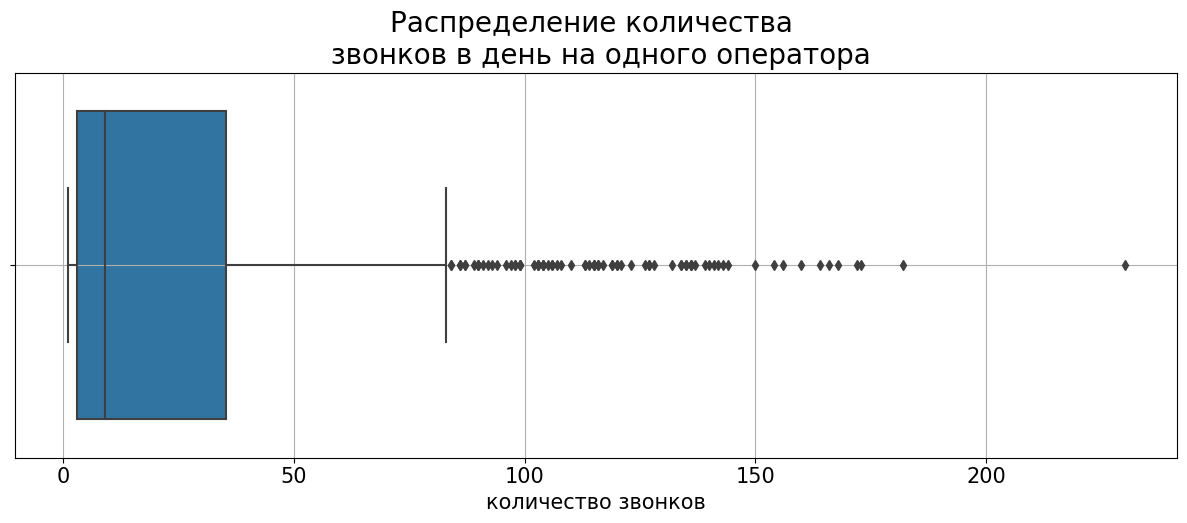

Выбросами являются данные о среднем количестве звонков одного операторов в один день свыше 84
Количество выбросов по среднему количеству звонков одного операторов в один день составляет 716


In [104]:
create_boxplot(operators_one_day_calls_result['ratio'],\
               'Распределение количества \n звонков в день на одного оператора',\
               'количество звонков')

column = operators_one_day_calls_result['ratio']
limit_outers = round(column.quantile(0.75) + 1.5*(column.quantile(0.75)-column.quantile(0.25)), 0)

quantiles_Q3(column, '{0:,.0f}', 'Выбросами являются данные о среднем количестве звонков одного операторов в один день свыше')
print('Количество выбросов по среднему количеству звонков одного операторов в один день составляет',\
     len(operators_one_day_calls_result['ratio'] > limit_outers))

В пункте 3.5.3 аномально высокие (ошибочные) показатели по количеству звонков на одного оператора в один день были удалены, а также за верхнюю границу количества совершаемых/принимаемых оператором звонков в день принято значение в 300 звонков.

Следовательно, рассматриваемые 0,7 тысячи выбросов по среднему количеству звонков на одного оператора в один день согласуются с принятым значениям данного показателя.

#### Данные по количеству входящих звонков в день на одного оператора.

Сначала рассчитаем среднее, медианное, максимальное и минимальное количество входящих звонков на одного оператора.

In [105]:
operators_one_day_calls_in = operators.loc[operators['direction'] == 'in']\
.groupby('operator_id').agg({'calls_count':'sum', 'date':'nunique'})
operators_one_day_calls_in['ratio'] = round(operators_one_day_calls_in['calls_count']/operators_one_day_calls_in['date'], 0)
operators_one_day_calls_in_result = operators_one_day_calls_in.loc[operators_one_day_calls_in['date'] > 5]

statistics_one_operator(operators_one_day_calls_in_result['ratio'])

Среднее количество звонков в день на одного оператора составляет 6.0

Медианное количество звонков в день на одного оператора составляет 3.0

Максимальное количество звонков в день на одного оператора составляет 116.0

Минимальное количество звонков в день на одного оператора составляет 1.0


Посмотрим статистики для оператора, работающего в колл-центре, специализирующемся на приёме звонков.

In [106]:
operators_one_day_calls_in_spec = operators.loc[(operators['direction'] == 'in')&(operators['specialty'] == 'входящие')]\
.groupby('operator_id').agg({'calls_count':'sum', 'date':'nunique'})
operators_one_day_calls_in_spec['ratio'] = round(operators_one_day_calls_in_spec['calls_count']/\
                                                 operators_one_day_calls_in_spec['date'], 0)
operators_one_day_calls_in_spec_result = operators_one_day_calls_in_spec.loc[operators_one_day_calls_in_spec['date'] > 5]

statistics_one_operator(operators_one_day_calls_in_spec_result['ratio'])

Среднее количество звонков в день на одного оператора составляет 5.0

Медианное количество звонков в день на одного оператора составляет 2.0

Максимальное количество звонков в день на одного оператора составляет 74.0

Минимальное количество звонков в день на одного оператора составляет 1.0


Как видно, различаются средние значения (у колл-центров со специализацией "входящие" среднее количество входящих на одного оператора ниже на 1 звонок, чем в общем по всем колл-центрам) и максимальные значения (у "входящих" колл-центров также максимальное количество входящих звонков ниже на 42 звонка). Различие средних значений обусловлено выбросами, которые смещают его в большую сторону, что подтверждается значительной разницей в максимальных значениях.

Построим диаграмму размаха.

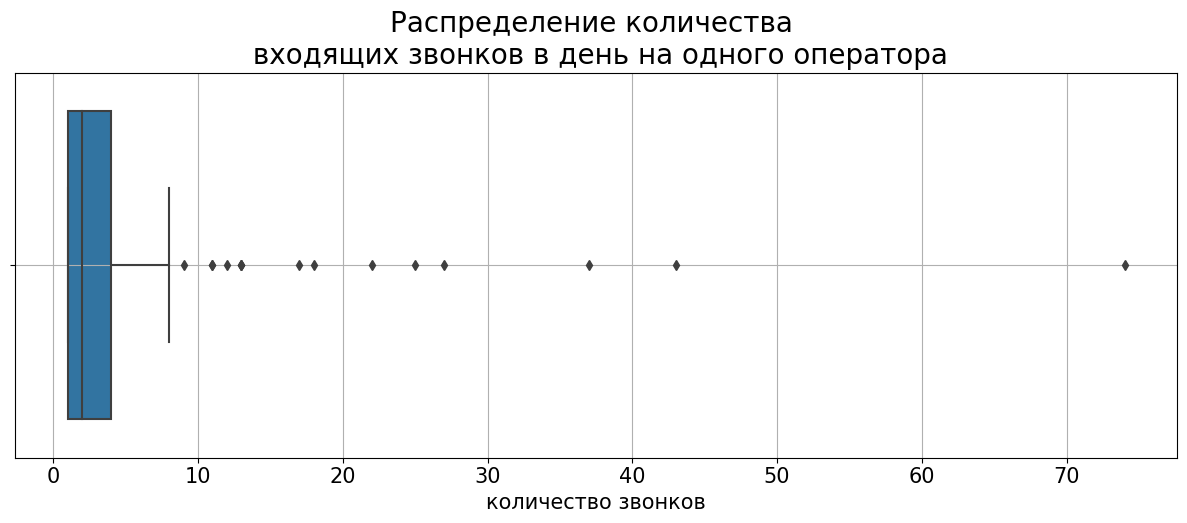

Выбросами являются данные о среднем количестве входящих звонков одного операторов в один день свыше 8
Количество выбросов по среднему количеству входящих звонков одного операторов в один день составляет 134


In [107]:
create_boxplot(operators_one_day_calls_in_spec_result['ratio'],\
               'Распределение количества \n входящих звонков в день на одного оператора',\
               'количество звонков')

column = operators_one_day_calls_in_spec_result['ratio']

limit_outers = round(column.quantile(0.75) + 1.5*(column.quantile(0.75)-column.quantile(0.25)), 0)

quantiles_Q3(column, '{0:,.0f}',\
             'Выбросами являются данные о среднем количестве входящих звонков одного операторов в один день свыше')
print('Количество выбросов по среднему количеству входящих звонков одного операторов в один день составляет',\
     len(operators_one_day_calls_in_spec_result['ratio'] > limit_outers))

В пункте 3.5.3 аномально высокие (ошибочные) показатели по количеству звонков на одного оператора в один день были удалены, а также за верхнюю границу количества совершаемых/принимаемых оператором звонков в день принято значение в 300 звонков.

Следовательно, рассматриваемые 134 выброса по среднему количеству входящих звонков на одного оператора в один день согласуются с принятым значениям данного показателя.

#### Данные по количеству исходящих звонков в день на одного оператора.

Сначала рассчитаем среднее, медианное, максимальное и минимальное количество исходящих звонков на одного оператора.

In [108]:
operators_one_day_calls_out = operators.loc[operators['direction'] == 'out']\
.groupby('operator_id').agg({'calls_count':'sum', 'date':'nunique'})
operators_one_day_calls_out['ratio'] = round(operators_one_day_calls_out['calls_count']/operators_one_day_calls_out['date'], 0)
operators_one_day_calls_out_result = operators_one_day_calls_out.loc[operators_one_day_calls_out['date'] > 5]

statistics_one_operator(operators_one_day_calls_out_result['ratio'])

Среднее количество звонков в день на одного оператора составляет 30.0

Медианное количество звонков в день на одного оператора составляет 12.0

Максимальное количество звонков в день на одного оператора составляет 230.0

Минимальное количество звонков в день на одного оператора составляет 1.0


Посмотрим статистики для оператора, работающего в колл-центре, специализирующемся на обзвоне клиентов.

In [109]:
operators_one_day_calls_out_spec = operators.loc[(operators['direction'] == 'out')&(operators['specialty'] == 'исходящие')]\
.groupby('operator_id').agg({'calls_count':'sum', 'date':'nunique'})
operators_one_day_calls_out_spec['ratio'] = round(operators_one_day_calls_out_spec['calls_count']/\
                                                 operators_one_day_calls_out_spec['date'], 0)
operators_one_day_calls_out_spec_result = operators_one_day_calls_out_spec.loc[operators_one_day_calls_out_spec['date'] > 5]

statistics_one_operator(operators_one_day_calls_out_spec_result['ratio'])

Среднее количество звонков в день на одного оператора составляет 41.0

Медианное количество звонков в день на одного оператора составляет 18.0

Максимальное количество звонков в день на одного оператора составляет 230.0

Минимальное количество звонков в день на одного оператора составляет 1.0


Как видно, различаются средние значения (у колл-центров со специализацией "исходящие" среднее количество исходящих на одного оператора выше на 11 звонков, чем в общем по всем колл-центрам) и медианные значения (у "исходящих" колл-центров также медианное количество входящих звонков больше на 6 звонков).

Построим диаграмму размаха.

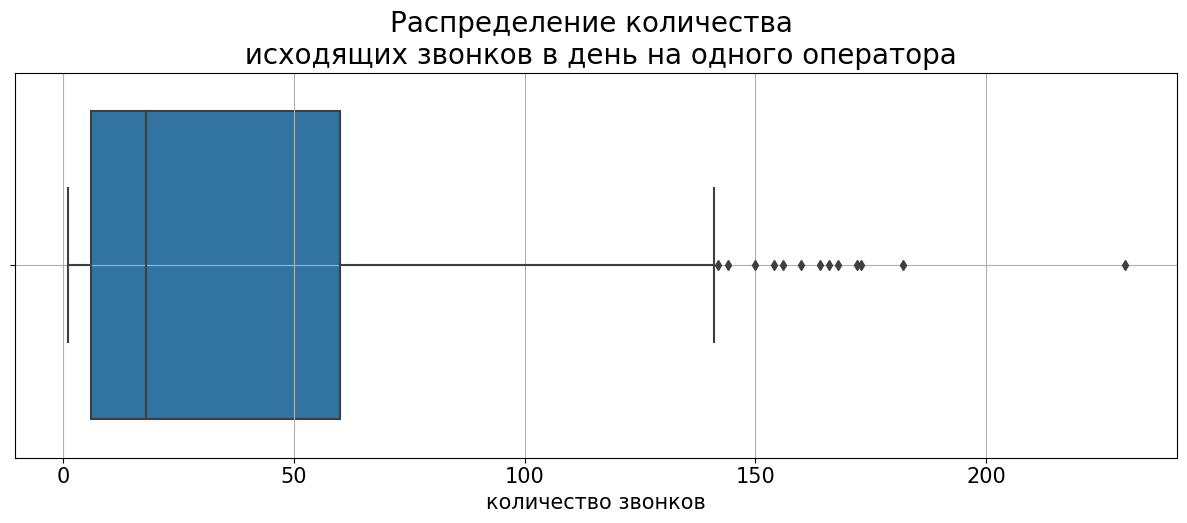

Выбросами являются данные о среднем количестве исходящих звонков одного операторов в один день свыше 141
Количество выбросов по среднему количеству исходящих звонков одного операторов в один день составляет 331


In [110]:
create_boxplot(operators_one_day_calls_out_spec_result['ratio'],\
               'Распределение количества \n исходящих звонков в день на одного оператора',\
               'количество звонков')

column = operators_one_day_calls_out_spec_result['ratio']
limit_outers = round(column.quantile(0.75) + 1.5*(column.quantile(0.75)-column.quantile(0.25)), 0)

quantiles_Q3(column, '{0:,.0f}',\
             'Выбросами являются данные о среднем количестве исходящих звонков одного операторов в один день свыше')
print('Количество выбросов по среднему количеству исходящих звонков одного операторов в один день составляет',\
     len(operators_one_day_calls_out_spec_result['ratio'] > limit_outers))

В пункте 3.5.3 аномально высокие (ошибочные) показатели по количеству звонков на одного оператора в один день были удалены, а также за верхнюю границу количества совершаемых/принимаемых оператором звонков в день принято значение в 300 звонков.

Следовательно, рассматриваемые 331 выброс по среднему количеству исходящих звонков на одного оператора в один день согласуются с принятым значениям данного показателя.

#### Данные по количеству внутренних звонков в день на одного оператора.

Сначала рассчитаем среднее, медианное, максимальное и минимальное количество внутренних звонков на одного оператора.

In [111]:
operators_one_day_calls_internal = operators.loc[operators['internal'] == True]\
.groupby('operator_id').agg({'calls_count':'sum', 'date':'nunique'})
operators_one_day_calls_internal['ratio'] = round(operators_one_day_calls_internal['calls_count']/\
                                                  operators_one_day_calls_internal['date'], 0)
operators_one_day_calls_internal_result = operators_one_day_calls_internal.loc[operators_one_day_calls_internal['date'] > 5]

statistics_one_operator(operators_one_day_calls_internal_result['ratio'])

Среднее количество звонков в день на одного оператора составляет 3.0

Медианное количество звонков в день на одного оператора составляет 3.0

Максимальное количество звонков в день на одного оператора составляет 12.0

Минимальное количество звонков в день на одного оператора составляет 1.0


Среднее и медианные значения равны, следовательно, скорее всего, в рассматриваемых данных содержится незначительное количество выбросов.

Построим диаграмму размаха.

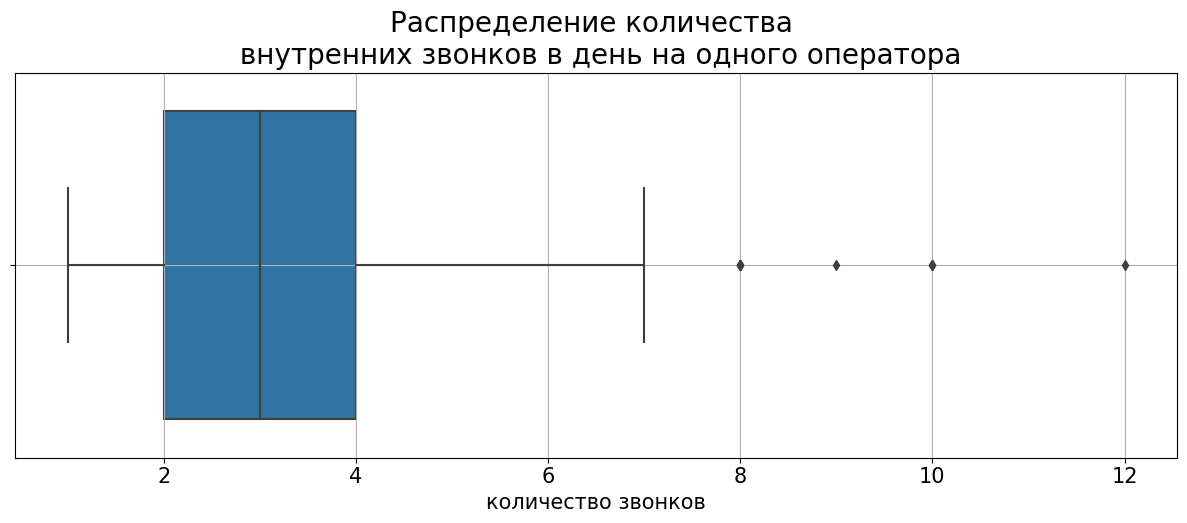

Выбросами являются данные о среднем количестве внутренних звонков одного операторов в один день свыше 7
Количество выбросов по среднему количеству внутренних звонков одного операторов в один день составляет 189


In [112]:
create_boxplot(operators_one_day_calls_internal_result['ratio'],\
               'Распределение количества \n внутренних звонков в день на одного оператора',\
               'количество звонков')

column = operators_one_day_calls_internal_result['ratio']
limit_outers = round(column.quantile(0.75) + 1.5*(column.quantile(0.75)-column.quantile(0.25)), 0)

quantiles_Q3(column, '{0:,.0f}',\
             'Выбросами являются данные о среднем количестве внутренних звонков одного операторов в один день свыше')
print('Количество выбросов по среднему количеству внутренних звонков одного операторов в один день составляет',\
     len(operators_one_day_calls_internal_result['ratio'] > limit_outers))

В пункте 3.5.3 аномально высокие (ошибочные) показатели по количеству звонков на одного оператора в один день были удалены, а также за верхнюю границу количества совершаемых/принимаемых оператором звонков в день принято значение в 300 звонков.

Следовательно, рассматриваемые 189 выбросов по среднему количеству внутренних звонков на одного оператора в один день согласуются с принятым значениям данного показателя.

Вместе с тем в пункте 4.1.6.4 при рассмотрении данных по внутренним звонкам в разрезе специализаций колл-центров уставили допустимое пороговое значение доли внутренних исходящих звонков в размере 17% (верхняя граница "усов" графика). То есть допустили, что примерно каждый пятый исходящий звонок может быть внутренним. Рассматриваемый показатель будет использоваться в качестве критерия выявления неэффективных операторов далее в пункте 5.

#### Данные по количеству пропущенных звонков в день на одного оператора.

Сначала рассчитаем среднее, медианное, максимальное и минимальное количество пропущенных звонков на одного оператора.

In [113]:
operators_one_day_calls_missed = operators.loc[operators['is_missed_call'] == True]\
.groupby('operator_id').agg({'calls_count':'sum', 'date':'nunique'})
operators_one_day_calls_missed['ratio'] = round(operators_one_day_calls_missed['calls_count']/\
                                                  operators_one_day_calls_missed['date'], 0)
operators_one_day_calls_missed_result = operators_one_day_calls_missed.loc[operators_one_day_calls_missed['date'] > 5]

statistics_one_operator(operators_one_day_calls_missed_result['ratio'])

Среднее количество звонков в день на одного оператора составляет 16.0

Медианное количество звонков в день на одного оператора составляет 6.0

Максимальное количество звонков в день на одного оператора составляет 128.0

Минимальное количество звонков в день на одного оператора составляет 1.0


Среднее значение почти в три раза превышает медианное значение, следовательно, скорее всего, в рассматриваемых данных содержится значительное количество выбросов.

Построим диаграмму размаха.

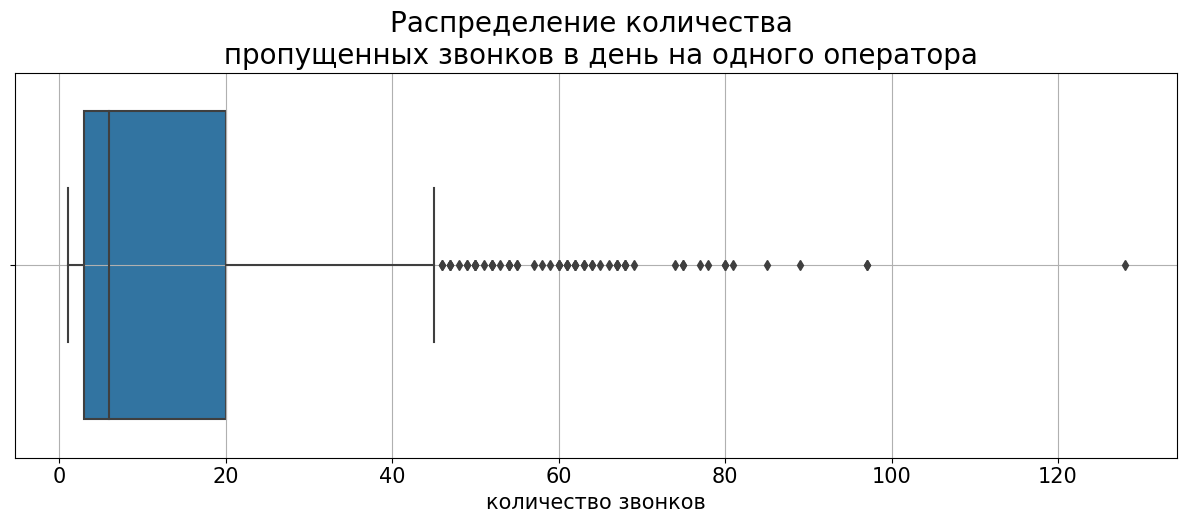

Выбросами являются данные о среднем количестве пропущенных звонков одного операторов в один день свыше 46
Количество выбросов по среднему количеству пропущенных звонков одного операторов в один день составляет 490


In [114]:
create_boxplot(operators_one_day_calls_missed_result['ratio'],\
               'Распределение количества \n пропущенных звонков в день на одного оператора',\
               'количество звонков')

column = operators_one_day_calls_missed_result['ratio']
limit_outers = round(column.quantile(0.75) + 1.5*(column.quantile(0.75)-column.quantile(0.25)), 0)

quantiles_Q3(column, '{0:,.0f}',\
             'Выбросами являются данные о среднем количестве пропущенных звонков одного операторов в один день свыше')
print('Количество выбросов по среднему количеству пропущенных звонков одного операторов в один день составляет',\
     len(operators_one_day_calls_missed_result['ratio'] > limit_outers))

Вместе с тем в пункте 4.1.6.5 при рассмотрении данных по пропущенным звонкам в разрезе специализаций колл-центров уставили допустимое пороговое значение доли пропущенных входящих звонков в размере 28% (первый квартиль). То есть допустили, что пропуск каждого третьего входящего звонка является недопустимым. Рассматриваемый показатель будет использоваться в качестве критерия выявления неэффективных операторов далее в пункте 5.

## Вывод по пункту 4.

1. **Количество колл-центров.**
    
        В отношении 307 колл-центров (42% от общего количества колл-центров, зарегистрированных в сервисе) есть данные о работе операторов. Следовательно, исследование проводится в отношении рассматриваемых 307 колл-центров.


2. **Специализация колл-центров.**

        Проведена категоризация колл-центров по специализациям: при доле звонков одного типа 70 и более процентов у колл-центра будет та или иная специализация (или входящие, или исходящие). При доле звонков менее 70 специализация - специализация смешанная.
        Почти половина колл-центров (48%) специализированы на приёме звонков. Доли колл-центров, специализирующихся на обзвоне, и смешанных колл-центров примерно одинаковы (28% и 24% соответственно).


3. **Количество операторов в колл-центрах.**

        На один колл-центр в среднем приходится почти 4 оператора. При этом, медианное значение равно 2 операторам. Наименьшее среднее количество операторов (почти 2 человека) работает в колл-центрах, специализирующихся на входящих звонках, наибольшее - в колл-центрах, занимающихся обзвоном (почти 6 человек).


4. **Данные по статистикам звонков в колл-центрах.**

4.1. **Общие данные по количеству звонков и их распределению по месяцам.**
    
    В ноябре наибольшее суммарное количество звонков - 45%, наименьшее - в августе - 3%.


4.2. **Данные по количеству звонков и среднему количеству звонков в день в разрезе специализаций колл-центров.**

    Более половины звонков (61%) приходится на колл-центры, специализирующиеся на обзвоне клиентов, 31% - на смешанные колл-центры. Меньше всего звонков (8%) приходится на колл-центры, специализирующиеся на приёме звонков.
    Больше всего в среднем в день совершают звонков (исходящие/входящие) операторы колл-центров, специализирующихся на обзвоне клиентов (почти 3 тысячи звонков в день), смешанные колл-центры - 1,6 тысячи в день. Меньше всего в среднем в день совершают операторы колл-центров, занимающихся приёмом звонков, - менее 0,5 тысячи.


4.3. **Данные по количеству внутренних звонков в разрезе специализаций колл-центров.**

    Наибольшая доля внутренних звонков у колл-центров, занимающихся обзвоном клиентов, - 57%, наименьшая (5%) у колл-центров, специализирующихся на приёме звонков.
    Для проведения расчётов взяты те колл-центры, в которых в абсолютном выражении количество исходящих звонков более 50.
    В качестве порогового значения взято значение в 17% (верхняя граница "усов" графика). То есть, примерно каждый пятый исходящий звонок может быть внутренним.
    В 16 колл-центрах доля исходящих внутренних звонков от количества исходящих звонков превышает пороговое значение в 17%.


4.4. **Данные по количеству пропущенных звонков в разрезе специализаций колл-центров.**

    Наибольшая доля пропущенных звонков (66%) у колл-центров, специализирующихся на обзвоне клиентов. Наименьшая у колл-центров, занимающихся приёмом звонков (9%).
    55% пропущенных звонков составляют входящие звонки от всех звонков данного направления, 43% - исходящие звонки.

    Доля пропущенных входящих звонков в разрезе колл-центров – показатель, который возможно рассмотреть в качестве критерия оценки эффективности работы операторов.
    Установлено пороговое значение, свыше которого доля пропущенных входящих звонков уже может свидетельствовать о неэффективности оператора, на уровне нижней границы графика (свыше 2%).
    В 190 колл-центрах доля пропущенных входящих звонков от количества входящих звонков превышает пороговое значение в 2% (нижняя граница графика).
    

5. **Данные по статистикам звонков в колл-центрах (длительность звонков).**


5.1. **Данные по длительности одного звонка в разрезе специализаций колл-центров.**

    Средняя длительность одного звонка составляет:
    •	у "исходящих" колл-центров - 134 секунды;
    •	у "смешанных" - 107 секунд;
    •	у "входящих" - 104 секунды.
    При этом, медианные значения длительности одного звонка значительно ниже средних значений, что свидетельствует о сильном смещении средних значений из-за выбросов.
    

5.2. **Данные по длительности одного звонка в разрезе направлений звонков колл-центров.**

    Средняя длительность одного исходящего звонка выше аналогичного показателя по входящему звонку: 122 секунды и 113 секунд соответственно.
    В качестве верхнего порогового значения взято значение в 300 секунд или 5 минут (сумма третьего квартиля и полуторного межквартильного размаха). 
    Количество колл-центров, у которых средняя продолжительность одного звонка превышает 5 минут, составляет 26 организации.
    В качестве нижнего порогового значения взято значение в 60 секунд или 1 минуту (первый квартиль). 
    Количество колл-центров, у которых средняя продолжительность одного звонка не превышает 1 минуту, составляет 124 организации.


5.3. **Данные по длительности ожидания одного звонка в разрезе специализаций колл-центров.**

    Средняя длительность ожидания одного звонка у колл-центров всех специализаций практически одинакова и составляет от 16 до 18 секунд.
    Максимальные значения длительности одного звонка составляют от 5 минут до 8 минут (максимум у «исходящих», минимум у «входящих»).

5.4. **Данные по длительности ожидания одного звонка в разрезе направлений звонков колл-центров.**

    Средняя длительность ожидания одного звонка как входящего, так и исходящего практически равны: 18 секунд и 17 секунд соответственно.
    Так как рассматриваемый критерий может являться одним из показателей эффективности работы операторов, определён порог, после которого длительность ожидания входящего звонка будет считаться недопустимой: звонка в 24 секунды (третий квартиль).


6. **Данные об операторах**.

        В пункте 4.1.5 определили, что:
        •	всего в датасете есть сведения о работе 1 078 операторов;
        •	каждый оператор работает не более чем в одном колл-центре.


6.1. **Количество отработанных дней.**

    У большинства операторов (от 40 до более 120 человек) есть данные о работе не более, чем за 5 дней. От 20 до 40 операторов есть данные о работе не более, чем за 19 дней работы. При этом, среднее число рабочих дней составляет 18 дней, а медианное - 12 дней.
    Следовательно, сравнивать абсолютные величины (например, количество произведённых исходящих звонков) не представляется возможным. Решением может послужить сравнение относительных величин (например, доля пропущенных звонков от общего количество входящих звонков).


6.2. **Данные по статистикам звонков операторов.**


6.2.1. **Данные по количеству звонков в день на одного оператора.**

    Один оператор, проработавший более 5 дней, в среднем в один день совершает 27 звонков.


6.2.2. **Данные по количеству входящих звонков в день на одного оператора.**

    Один оператор, проработавший более 5 дней, в среднем в один день принимает 6 входящих звонков (медиана рассматриваемого показателя – 3 звонка).
    Один оператор, проработавший более 5 дней в колл-центре, специализирующемся на приёме звонков, в среднем в один день принимает 5 входящих звонков (медиана рассматриваемого показателя – 2 звонка).
    
    
6.2.3. **Данные по количеству исходящих звонков в день на одного оператора.**

    Один оператор, проработавший более 5 дней, в среднем в один день совершает 30 исходящих звонков (медиана рассматриваемого показателя – 12 звонков).
    Один оператор, проработавший более 5 дней в колл-центре, специализирующемся на обзвоне клиентов, в среднем в один день принимает 41 исходящий звонок (медиана рассматриваемого показателя – 18 звонков).
   

6.2.4. **Данные по количеству внутренних звонков в день на одного оператора.**

    Один оператор, проработавший более 5 дней, в среднем в один день совершает 3 внутренних звонка (медиана рассматриваемого показателя также – 3 звонка).
    
 
6.2.5. **Данные по количеству пропущенных звонков в день на одного оператора.**

    Один оператор, проработавший более 5 дней, в среднем в один день совершает 16 внутренних звонка (медиана рассматриваемого показателя – 6 звонков).

# Определение критериев отсутствия эффективности работы операторов.

Так как клиентами компании «Нупозвони» являются колл-центры, то пороговые значения для критериев отсутствия эффективности операторов будем рассчитывать на основе агрегированных данных по колл-центрам, а не конкретно по операторам.

Таким образом, исключим персонализированный подход при формировании критериев и их допустимых значений.

Кроме того, учтём принятые ранее ограничения по исходным данным, на основании которых проводим расчёты:
- абсолютное количество звонков с выбранными характеристиками (входящие, исходящие) более 50 звонков в целом у колл-центра и более 10 звонков в целом у оператора;
- количество дней работы оператора, по которым есть данные, более 5 дней.

Подготовим срез датасета, удовлетворяющий условиям выше.

In [115]:
operators_dates = operators_dates.reset_index()
list_operators_index = operators_dates.loc[operators_dates['date'] > 10]['operator_id'].tolist()
operators_data = dataset.query('operator_id in @list_operators_index')

In [116]:
print('Количество операторов, по данным о работе которых проводится анализ неэффективности',\
      operators_data['operator_id'].nunique(), 'операторов.')
operators['operator_id'].nunique()
print('Или', round(operators_data['operator_id'].nunique()/operators['operator_id'].nunique()*100, 2),\
      '% от общего числа операторов.')

Количество операторов, по данным о работе которых проводится анализ неэффективности 566 операторов.
Или 52.5 % от общего числа операторов.


## По направлению входящих звонков.

### Доля пропущенных входящих звонков от общего количества входящих звонков оператора (выше уровня нижней границы графика боксплот).

В пункте 4.1.6.5 установили пороговое значение, свыше которого доля пропущенных входящих звонков уже может свидетельствовать о неэффективности оператора, на уровне нижней границы графика (свыше 2%). Кроме того, выявили 190 колл-центров, у которых данный показатель не выполняется.

Посмотрим количество операторов, у которых доля пропущенных входящих звонков от суммарного количества входящих звонков превышает 2%.

In [117]:
is_missed_operators_in = operators_data.loc[operators_data['direction'] == 'in']\
                                  .groupby(['operator_id', 'user_id', 'specialty', 'direction'])\
                                  .agg({'calls_count':'sum'}).reset_index()
is_missed_operators_in_sub = dataset.loc[(dataset['direction'] == 'in')&(dataset['is_missed_call'] == True)]\
                     .groupby(['operator_id', 'user_id', 'specialty', 'direction']).agg({'calls_count':'sum'}).reset_index()
is_missed_operators_in_sub = is_missed_operators_in_sub[['operator_id', 'calls_count']]
is_missed_operators_in = is_missed_operators_in.merge(is_missed_operators_in_sub, on='operator_id')

is_missed_operators_in['ratio_is_missed_call'] = round(is_missed_operators_in['calls_count_y']/\
                                             is_missed_operators_in['calls_count_x']*100, 2)

is_missed_operators_in_result = is_missed_operators_in.loc[is_missed_operators_in['ratio_is_missed_call'] > 2.00]\
.sort_values(by='ratio_is_missed_call', ascending=False)

print('Всего операторов с долей пропущенных входящих звонков более 2%: ',\
     len(is_missed_users_in_result), 'операторов.')

Всего операторов с долей пропущенных входящих звонков более 2%:  190 операторов.


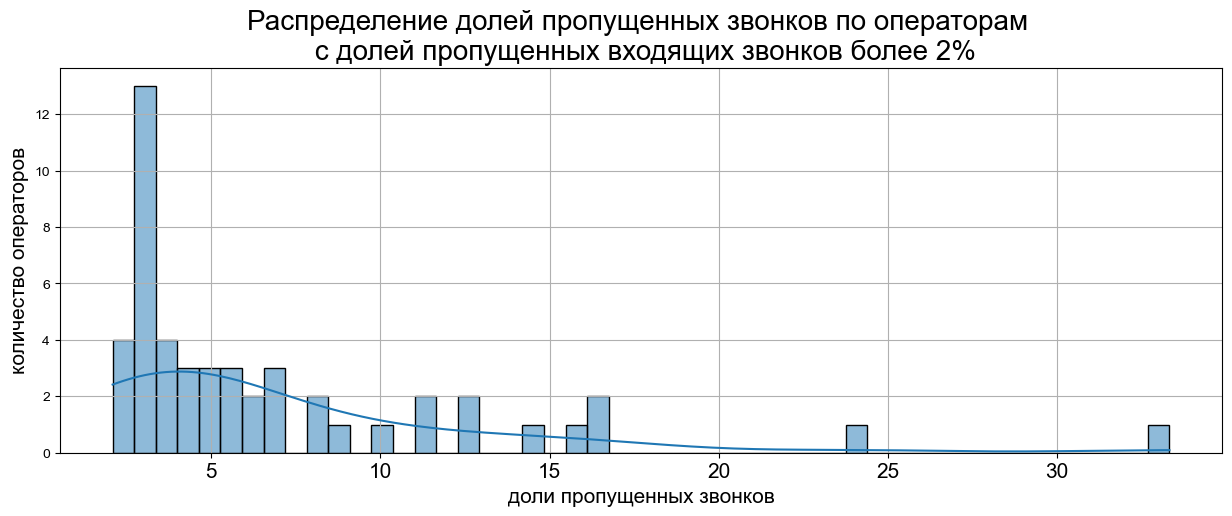

Количество операторов, у которых доля пропущенных входящих звонков выше 2% от общего количества входящих звонков 49 операторов.
Количество колл-центров, в которых работают операторы, с долей пропущенных входящих звонков выше 2% 38 организации.


In [118]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(is_missed_operators_in_result['ratio_is_missed_call'], kde=True, bins=49)
       
sns.set_style('white')
plt.title('Распределение долей пропущенных звонков по операторам \n с долей пропущенных входящих звонков более 2%',\
          fontsize = 20)
plt.xlabel(' ', fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('доли пропущенных звонков', fontsize = 15)
plt.ylabel('количество операторов', fontsize = 15)
plt.grid(True)
plt.show()

print('Количество операторов, у которых доля пропущенных входящих звонков выше 2% от общего количества входящих звонков',\
     is_missed_operators_in_result['operator_id'].nunique(), 'операторов.')
print('Количество колл-центров, в которых работают операторы, с долей пропущенных входящих звонков выше 2%',\
     is_missed_operators_in_result['user_id'].nunique(), 'организации.')

На гистограмме видно, что у большинства операторов (13 человек) доля пропущенных звонков составляет от 2% до 3%. Значительная доля пропущенных звонков (более 10%) у единичного количества операторов (например, 24% пропущенных входящих звонков у одного оператора).

Также есть есть колл-центры, в которых более одного оператора, у которого идёт превышение порогового значения критерия.

In [119]:
is_missed_operators_users_group = is_missed_operators_in_result.groupby('user_id').agg({'operator_id':'count'})\
.sort_values(by='operator_id', ascending=False)
is_missed_operators_users_group.loc[is_missed_operators_users_group['operator_id'] > 1]
print('Количество колл-центров, в которых работают операторы с долей пропущенных входящих звонков выше 2%',\
     len(is_missed_operators_users_group.loc[is_missed_operators_users_group['operator_id'] > 1]), 'колл-центра.')

Количество колл-центров, в которых работают операторы с долей пропущенных входящих звонков выше 2% 4 колл-центра.


В пункте 4.1.6.5 выявлено 190 колл-центрах, в которых доля пропущенных входящих звонков от количества входящих звонков превышает пороговое значение в 2%. Посмотрим работают ли в данных организациях выявленные 49 операторов.

In [120]:
is_missed_users_in_result['level_in_miss'] = True
is_missed_users_in_result_sub = is_missed_users_in_result[['user_id', 'level_in_miss']]
is_missed_operators_in_result = is_missed_operators_in_result.merge(is_missed_users_in_result_sub, on='user_id', how='left')
print('Количество операторов, работающих в колл-центрах, у которых доля входящих пропущенных звонков более 2%',\
      is_missed_operators_in_result['level_in_miss'].sum(), 'операторов.')

Количество операторов, работающих в колл-центрах, у которых доля входящих пропущенных звонков более 2% 45 операторов.


Создадим таблицу, в которой укажем, что операторы не выполняют показатель "Доля пропущенных входящих звонков от общего количества входящих звонков не должна превышать 2%".

In [121]:
is_missed_operators_in_result['Показатель_1'] = 1
operators_in_result_1 = is_missed_operators_in_result[['operator_id', 'user_id', 'specialty', 'direction',\
                                                       'ratio_is_missed_call', 'level_in_miss', 'Показатель_1']]

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
operators_in_result_1_1 = operators_in_result_1.copy()
operators_in_result_1_1.columns = ['идентификатор оператора', 'идентификатор колл-центра', 'специализация колл-центра',\
                                   'направления звонков', 'доля пропущенных звонков', 'невыполнение колл-центром показателя',\
                                   'невыполнение показателя']

(operators_in_result_1_1.head(3)
 .style
 .format('{0:,.0f}', subset=['идентификатор оператора', 'идентификатор колл-центра'])
 .format('{0:,.2f}', subset=['доля пропущенных звонков'])
 .set_caption('Сведения о невыполнении операторами показателя №1')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,идентификатор оператора,идентификатор колл-центра,специализация колл-центра,направления звонков,доля пропущенных звонков,невыполнение колл-центром показателя,невыполнение показателя
0,"897,872","166,619",исходящие,in,33.33,nan,1
1,"905,300","167,162",входящие,in,24.00,nan,1
2,"888,532","166,407",исходящие,in,16.67,True,1


### Длительность ожидания ответа оператора (выше третьего квартиля).

В пункте 4.1.7.6 установили пороговое значение для длительности ожидания одного входящего звонка в 24 секунды (третий квартиль). Кроме того, выявили 59 колл-центров, у которых данный показатель не выполняется.

Посмотрим количество операторов, у которых длительность ожидания одного входящего звонка превышает 24 секунды.

In [122]:
waiting_operators_in = operators_data.loc[operators_data['direction'] == 'in']\
                                  .groupby(['operator_id', 'user_id', 'specialty', 'direction'])\
                                  .agg({'one_waiting_duration':'mean'}).reset_index()
waiting_operators_in['one_waiting_duration'] = round(waiting_operators_in['one_waiting_duration'], 0)

waiting_operators_in = waiting_operators_in.loc[waiting_operators_in['one_waiting_duration'] > 24.00]\
.sort_values(by='one_waiting_duration', ascending=False)
#display(waiting_operators_in)

print('Всего операторов, у которых длительность ожидания одного входящего звонка превышает 24 секунды, ',\
     len(waiting_operators_in), 'операторов.')

Всего операторов, у которых длительность ожидания одного входящего звонка превышает 24 секунды,  79 операторов.


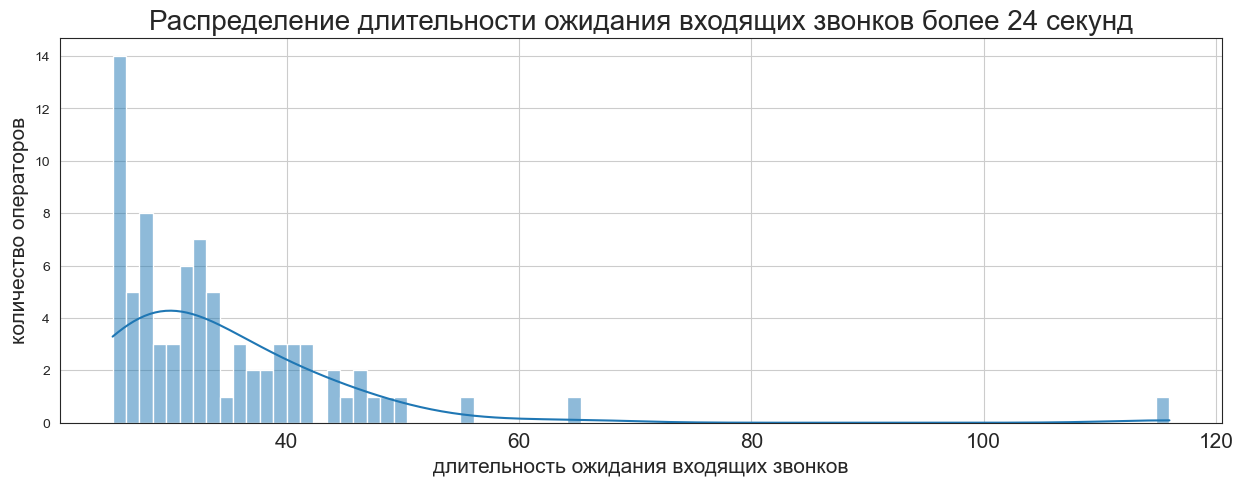

Количество операторов, у которых время ожидания входящего звонка превышает 24 секунды 79 операторов.
Количество колл-центров, в которых работают операторы, у которых время ожидания входящего звонка превышает 24 секунды 40 организации.


In [123]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(waiting_operators_in['one_waiting_duration'], kde=True, bins=79)
       
sns.set_style('white')
plt.title('Распределение длительности ожидания входящих звонков более 24 секунд',\
          fontsize = 20)
plt.xlabel(' ', fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('длительность ожидания входящих звонков', fontsize = 15)
plt.ylabel('количество операторов', fontsize = 15)
plt.grid(True)
plt.show()

print('Количество операторов, у которых время ожидания входящего звонка превышает 24 секунды',\
     waiting_operators_in['operator_id'].nunique(), 'операторов.')
print('Количество колл-центров, в которых работают операторы, у которых время ожидания входящего звонка превышает 24 секунды',\
     waiting_operators_in['user_id'].nunique(), 'организации.')

На гистограмме видно, что у большинства операторов (14 человек) время ожидания входящего звонка составляет 25 секунд. Значительное время ожидания вхоядщего звонка (более 40 секунд) у единичного количества операторов (например, 60 секунд время ожидания входящего звонка у одного оператора).

Также есть есть колл-центры, в которых более одного оператора, у которого идёт превышение порогового значения критерия.

In [124]:
waiting_operators_in_group = waiting_operators_in.groupby('user_id').agg({'operator_id':'count'})\
.sort_values(by='operator_id', ascending=False)
waiting_operators_in_group.loc[waiting_operators_in_group['operator_id'] > 1]
print\
('Количество колл-центров, в которых работают операторы, у которых длительность ожидания входящего звонка более 24 секунд',\
 len(waiting_operators_in_group.loc[waiting_operators_in_group['operator_id'] > 1]), 'колл-центров.')

Количество колл-центров, в которых работают операторы, у которых длительность ожидания входящего звонка более 24 секунд 16 колл-центров.


Здесь особенное внимание стоит обратить на колл-центры со значительным количеством операторов, не выполняющих показатель "Длительность ожидания ответа оператора на входящий звонок не превышает 24 секунды".

В пункте 4.1.7.6 выявлено 59 колл-центров, в которых время ожидания одного звонка превышает пороговое значение в 24 секунды. Посмотрим работают ли в данных организациях выявленные 79 операторов.

In [125]:
one_waiting_duration_users['level_waiting_duration'] = True
one_waiting_duration_users = one_waiting_duration_users.reset_index()
one_waiting_duration_users_sub = one_waiting_duration_users[['user_id', 'level_waiting_duration']]
waiting_operators_in = waiting_operators_in.merge(one_waiting_duration_users_sub, on='user_id', how='left')
print('Количество операторов, работающих в колл-центрах, в которых длительность ожидания входящего звонка свыше 24 секунд',\
      waiting_operators_in['level_waiting_duration'].sum(), 'оператора.')

Количество операторов, работающих в колл-центрах, в которых длительность ожидания входящего звонка свыше 24 секунд 62 оператора.


Создадим таблицу, в которой укажем, что операторы не выполняют показатель "Длительность ожидания ответа оператора на входящий звонок не превышает 24 секунды".

In [126]:
waiting_operators_in['Показатель_2'] = 1
waiting_operators_in_1 = waiting_operators_in[['operator_id', 'user_id', 'specialty',  'direction',\
                                               'one_waiting_duration', 'level_waiting_duration', 'Показатель_2']]

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
waiting_operators_in_1_1 = waiting_operators_in_1.copy()
waiting_operators_in_1_1.columns = ['идентификатор оператора', 'идентификатор колл-центра', 'специализация колл-центра',\
                                   'направления звонков', 'длительность ожидания одного звонка',\
                                   'невыполнение колл-центром показателя', 'невыполнение показателя']

(waiting_operators_in_1_1.head(3)
 .style
 .format('{0:,.0f}', subset=['идентификатор оператора', 'идентификатор колл-центра', 'длительность ожидания одного звонка'])
 .set_caption('Сведения о невыполнении операторами показателя №2')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,идентификатор оператора,идентификатор колл-центра,специализация колл-центра,направления звонков,длительность ожидания одного звонка,невыполнение колл-центром показателя,невыполнение показателя
0,"905,842","167,175",исходящие,in,116,nan,1
1,"907,174","166,485",исходящие,in,65,True,1
2,"958,468","168,091",исходящие,in,56,True,1


### Длительность входящего звонка оператора не более пяти минут (выше верхней границы графика боксплот).

В пункте 4.1.7.4 установили пороговое значение для допустимой максимальной длительности одного входящего звонка в 300 секунд или 5 минут (верхняя граница графика боксплот). Кроме того, выявили 26 колл-центров, у которых данный показатель не выполняется.

Посмотрим количество операторов, у которых длительность одного входящего звонка превышает 5 минут.

In [127]:
duration_operators_in = operators_data.loc[operators_data['direction'] == 'in']\
                                  .groupby(['operator_id', 'user_id', 'specialty', 'direction'])\
                                  .agg({'one_call_duration':'mean'}).reset_index()
duration_operators_in['one_call_duration'] = round(duration_operators_in['one_call_duration'], 0)

duration_operators_in_ceiling = duration_operators_in.loc[duration_operators_in['one_call_duration'] > 300.00]\
.sort_values(by='one_call_duration', ascending=False)

print('Всего операторов, у которых длительность одного входящего звонка превышает 5 минут, ',\
     len(waiting_operators_in), 'операторов.')

Всего операторов, у которых длительность одного входящего звонка превышает 5 минут,  79 операторов.


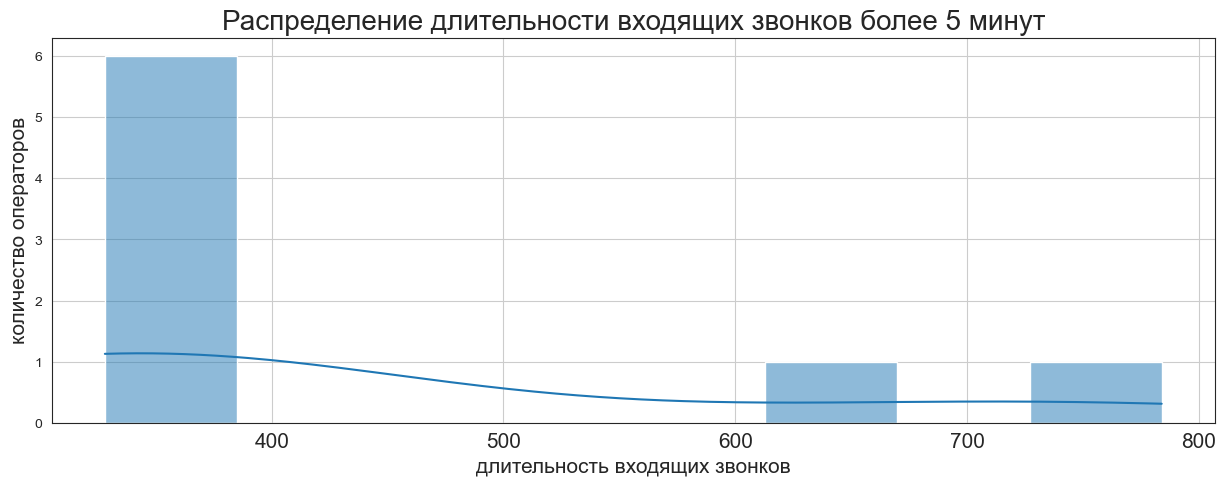

Количество операторов, у которых длительность одного входящего звонка превышает 5 минут 8 операторов.
Количество колл-центров, в которых работают операторы, у которых длительность одного входящего звонка превышает 5 минут 5 организаций.


In [128]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(duration_operators_in_ceiling['one_call_duration'], kde=True, bins=8)
      
sns.set_style('white')
plt.title('Распределение длительности входящих звонков более 5 минут',\
          fontsize = 20)
plt.xlabel(' ', fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('длительность входящих звонков', fontsize = 15)
plt.ylabel('количество операторов', fontsize = 15)
plt.grid(True)
plt.show()

print('Количество операторов, у которых длительность одного входящего звонка превышает 5 минут',\
     duration_operators_in_ceiling['operator_id'].nunique(), 'операторов.')
print\
('Количество колл-центров, в которых работают операторы, у которых длительность одного входящего звонка превышает 5 минут',\
     duration_operators_in_ceiling['user_id'].nunique(), 'организаций.')

Также есть есть колл-центры, в которых более одного оператора, у которого идёт превышение порогового значения критерия.

In [129]:
duration_operators_in_ceiling_group = duration_operators_in_ceiling.groupby('user_id').agg({'operator_id':'count'})\
.sort_values(by='operator_id', ascending=False)
duration_operators_in_ceiling_group.loc[duration_operators_in_ceiling_group['operator_id'] > 1]

print\
('Количество колл-центров, в которых работают операторы, у которых длительность одного входящего звонка более 5 минут',\
 len(duration_operators_in_ceiling_group.loc[duration_operators_in_ceiling_group['operator_id'] > 1]), 'колл-центра.')

Количество колл-центров, в которых работают операторы, у которых длительность одного входящего звонка более 5 минут 2 колл-центра.


В пункте 4.1.7.4 выявлено 26 колл-центров, в которых длительность одного входящего звонка превышает пороговое значение в 5 минут. Посмотрим работают ли в данных организациях выявленные 8 операторов.

In [130]:
one_call_duration_ceiling['level_duration_ceiling'] = True
one_call_duration_ceiling = one_call_duration_ceiling.reset_index()
one_call_duration_ceiling_sub = one_call_duration_ceiling[['user_id', 'level_duration_ceiling']]
duration_operators_in_ceiling = duration_operators_in_ceiling.merge(one_call_duration_ceiling_sub, on='user_id', how='left')
duration_operators_in_ceiling
print('Количество операторов, работающих в колл-центрах, в которых длительность одного входящего звонка превышает 5 минут,',\
      duration_operators_in_ceiling['level_duration_ceiling'].sum(), 'операторов.')

Количество операторов, работающих в колл-центрах, в которых длительность одного входящего звонка превышает 5 минут, 6 операторов.


Создадим таблицу, в которой укажем, что операторы не выполняют показатель "Длительность одного входящего звонка оператора не превышает 5 минут".

In [131]:
duration_operators_in_ceiling['Показатель_3'] = 1
duration_operators_in_ceiling_1 = duration_operators_in_ceiling[['operator_id', 'user_id', 'specialty', 'direction',\
                                                 'one_call_duration', 'level_duration_ceiling', 'Показатель_3']]

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
duration_operators_in_ceiling_1_1 = duration_operators_in_ceiling_1.copy()
duration_operators_in_ceiling_1_1.columns = ['идентификатор оператора', 'идентификатор колл-центра',\
                                             'специализация колл-центра', 'направления звонков',\
                                             'длительность одного входящего звонка',\
                                             'невыполнение колл-центром показателя', 'невыполнение показателя']

(duration_operators_in_ceiling_1_1.head(3)
 .style
 .format('{0:,.0f}', subset=['идентификатор оператора', 'идентификатор колл-центра', 'длительность одного входящего звонка'])
 .set_caption('Сведения о невыполнении операторами показателя №3')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,идентификатор оператора,идентификатор колл-центра,специализация колл-центра,направления звонков,длительность одного входящего звонка,невыполнение колл-центром показателя,невыполнение показателя
0,"947,612","168,062",исходящие,in,784,nan,1
1,"894,662","166,899",исходящие,in,668,nan,1
2,"907,994","167,176",смешанные,in,367,True,1


### Длительность входящего звонка оператора не менее одной минуты (выше первого квартиля).

В пункте 4.1.7.4 установили пороговое значение для допустимой минимальной длительности одного входящего звонка в 60 секунд или 1 минуту (первый квартиль). Кроме того, выявили 124 колл-центров, у которых данный показатель не выполняется.

Посмотрим количество операторов, у которых длительность одного входящего звонка менее 1 минуты.

In [132]:
duration_operators_in_floor = duration_operators_in.loc[duration_operators_in['one_call_duration'] < 60.00]\
.sort_values(by='one_call_duration', ascending=True)
#display(duration_operators_in_floor)

print('Всего операторов, у которых длительность одного входящего звонка менее 1 минуты, ',\
     len(duration_operators_in_floor), 'оператора.')

Всего операторов, у которых длительность одного входящего звонка менее 1 минуты,  74 оператора.


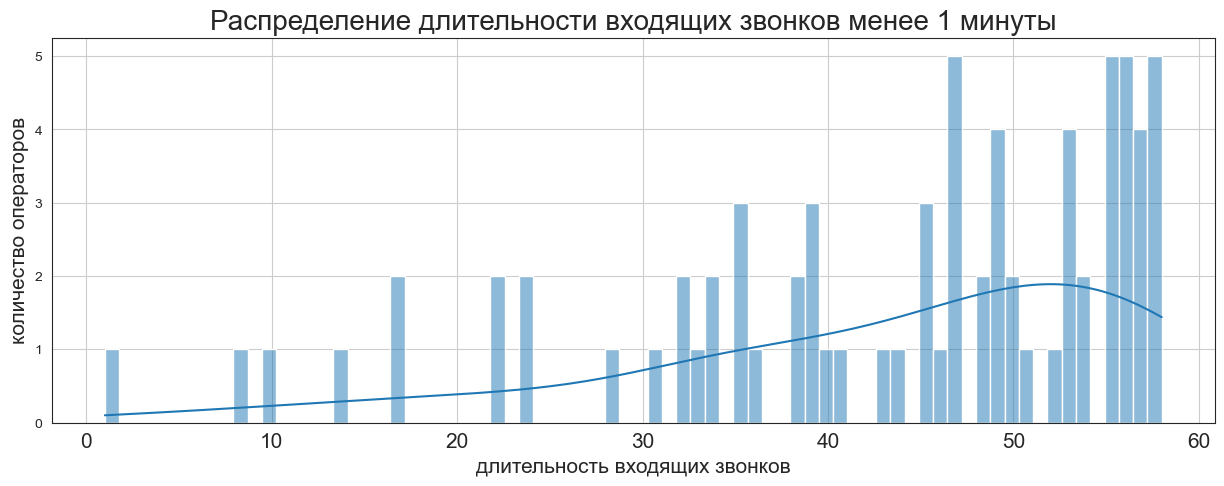

Количество операторов, у которых длительность одного входящего звонка менее 1 минуты 74 оператора.
Количество колл-центров, в которых работают операторы, у которых длительность одного входящего звонка менее 1 минуты 54 организаций.


In [133]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(duration_operators_in_floor['one_call_duration'], kde=True, bins=74)
       
sns.set_style('white')
plt.title('Распределение длительности входящих звонков менее 1 минуты',\
          fontsize = 20)
plt.xlabel(' ', fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('длительность входящих звонков', fontsize = 15)
plt.ylabel('количество операторов', fontsize = 15)
plt.grid(True)
plt.show()

print('Количество операторов, у которых длительность одного входящего звонка менее 1 минуты',\
     duration_operators_in_floor['operator_id'].nunique(), 'оператора.')
print\
('Количество колл-центров, в которых работают операторы, у которых длительность одного входящего звонка менее 1 минуты',\
     duration_operators_in_floor['user_id'].nunique(), 'организаций.')

Также есть есть колл-центры, в которых более одного оператора, у которого идёт превышение порогового значения критерия.

In [134]:
duration_operators_in_floor_group = duration_operators_in_floor.groupby('user_id').agg({'operator_id':'count'})\
.sort_values(by='operator_id', ascending=False)
duration_operators_in_floor_group.loc[duration_operators_in_floor_group['operator_id'] > 1]

print\
('Количество колл-центров, в которых работают операторы, у которых длительность одного входящего звонка менее 1 минуты',\
 len(duration_operators_in_floor_group.loc[duration_operators_in_floor_group['operator_id'] > 1]), 'колл-центров.')

Количество колл-центров, в которых работают операторы, у которых длительность одного входящего звонка менее 1 минуты 13 колл-центров.


В пункте 4.1.7.4 выявлено 124 колл-центра, в которых длительность одного входящего звонка не достигает порогового значения в 1 минуту. Посмотрим работают ли в данных организациях выявленные 74 оператора.

In [135]:
one_call_duration_floor['level_duration_floor'] = True
one_call_duration_floor = one_call_duration_floor.reset_index()
one_call_duration_floor_sub = one_call_duration_floor[['user_id', 'level_duration_floor']]
duration_operators_in_floor = duration_operators_in_floor.merge(one_call_duration_floor_sub, on='user_id', how='left')

print('Количество операторов, работающих в колл-центрах, в которых длительность одного входящего звонка менее 1 минуты',\
      len(duration_operators_in_floor), 'оператора.')

Количество операторов, работающих в колл-центрах, в которых длительность одного входящего звонка менее 1 минуты 74 оператора.


Создадим таблицу, в которой укажем, что операторы не выполняют показатель "Длительность одного входящего звонка оператора не менее 1 минуты".

In [136]:
duration_operators_in_floor['Показатель_4'] = 1
duration_operators_in_floor_1 = duration_operators_in_floor[['operator_id', 'user_id', 'specialty', 'direction',\
                                                 'one_call_duration', 'level_duration_floor', 'Показатель_4']]
duration_operators_in_floor_1

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
duration_operators_in_floor_1_1 = duration_operators_in_floor_1.copy()
duration_operators_in_floor_1_1.columns = ['идентификатор оператора', 'идентификатор колл-центра',\
                                             'специализация колл-центра', 'направления звонков',\
                                             'длительность одного входящего звонка',\
                                             'невыполнение колл-центром показателя', 'невыполнение показателя']

(duration_operators_in_floor_1_1.head(3)
 .style
 .format('{0:,.0f}', subset=['идентификатор оператора', 'идентификатор колл-центра', 'длительность одного входящего звонка'])
 .set_caption('Сведения о невыполнении операторами показателя №4')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,идентификатор оператора,идентификатор колл-центра,специализация колл-центра,направления звонков,длительность одного входящего звонка,невыполнение колл-центром показателя,невыполнение показателя
0,"929,228","167,172",исходящие,in,1,True,1
1,"940,952","168,275",входящие,in,8,True,1
2,"935,216","168,019",исходящие,in,10,nan,1


### Доля входящих звонков оператора колл-центра, специализирующегося на приёме звонков, не менее 70%.

В пункте 4.1.3 колл-центры категоризированы по специализациям: при доле звонков одного типа 70 и более процентов у колл-центра будет та или иная специализация (или входящие, или исходящие). При доле звонков менее 70 специализация будет смешанной.

В данном пункте рассмотрим долю входящих звонков одного оператора, работающего в колл-центре, специализирующемся на приёме звонков.

In [137]:
operators_all_in = operators_data.loc[operators_data['specialty'] == 'входящие']\
                                    .groupby(['operator_id', 'user_id', 'specialty'])\
                                    .agg({'calls_count':'sum'})
operators_all_in = operators_all_in.reset_index()
operators_ratio = operators_data.loc[(operators_data['direction'] == 'in')&\
                                     (operators_data['specialty'] == 'входящие')]\
                                    .groupby('operator_id')\
                                    .agg({'calls_count':'sum'})

operators_ratio = operators_ratio.reset_index()
operators_all_in = operators_all_in.merge(operators_ratio, on='operator_id')
operators_all_in['ratio'] = round(operators_all_in['calls_count_y'] / operators_all_in['calls_count_x']*100, 2)
operators_all_in.sort_values(by='ratio')
operators_all_in_result = operators_all_in.loc[operators_all_in['ratio'] < 70.00]

print('Всего операторов, у которых доля входящих звонков менее 70%, ',\
     len(operators_all_in_result), 'операторов.')

Всего операторов, у которых доля входящих звонков менее 70%,  14 операторов.


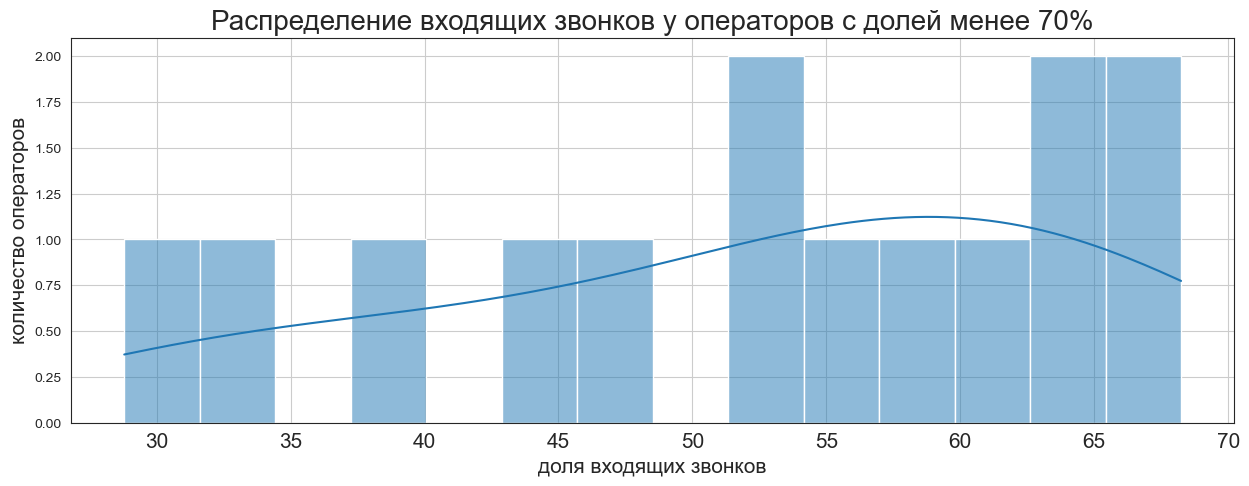

Количество операторов "входящих" колл-центров, у которых доля входящих менее 70%, 14 операторов.
Количество "входящих" колл-центров, в которых работают операторы, у которых доля входящих менее 70%, 13 организаций.


In [138]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(operators_all_in_result['ratio'], kde=True, bins=14)
       
sns.set_style('white')
plt.title('Распределение входящих звонков у операторов с долей менее 70%',\
          fontsize = 20)
plt.xlabel(' ', fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('доля входящих звонков', fontsize = 15)
plt.ylabel('количество операторов', fontsize = 15)
plt.grid(True)
plt.show()

print('Количество операторов "входящих" колл-центров, у которых доля входящих менее 70%,',\
     operators_all_in_result['operator_id'].nunique(), 'операторов.')
print\
('Количество "входящих" колл-центров, в которых работают операторы, у которых доля входящих менее 70%,',\
     operators_all_in_result['user_id'].nunique(), 'организаций.')

Создадим таблицу, в которой укажем, что операторы не выполняют показатель "Доля входящих звонков оператора "входящего" колл-центра составляет не менее 70%".

In [139]:
operators_all_in_result['Показатель_5'] = 1
operators_all_in_result_1 = operators_all_in_result[['operator_id', 'user_id', 'specialty', 'ratio',\
                                                     'Показатель_5']]

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
operators_all_in_result_1_1 = operators_all_in_result_1.copy()
operators_all_in_result_1_1.columns = ['идентификатор оператора', 'идентификатор колл-центра',\
                                             'специализация колл-центра', 'доля входящих звонков', 'невыполнение показателя']

(operators_all_in_result_1_1.head(3)
 .style
 .format('{0:,.0f}', subset=['идентификатор оператора', 'идентификатор колл-центра'])
 .format('{0:,.2f}', subset=['доля входящих звонков'])
 .set_caption('Сведения о невыполнении операторами показателя №5')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,идентификатор оператора,идентификатор колл-центра,специализация колл-центра,доля входящих звонков,невыполнение показателя
2,"888,406","166,669",входящие,60.00,1
3,"890,582","166,636",входящие,64.20,1
7,"891,946","166,803",входящие,33.33,1


### Вывод по направлению входящих звонков (выявление неэффективных операторов).

По направлению входящих звонков разработаны пять показателей, характеризующих эффективность работы операторов.
1. Доля пропущенных входящих звонков от общего количества входящих звонков оператора (выше уровня нижней границы графика боксплот), - не более 2%.
2. Длительность ожидания ответа оператора (выше третьего квартиля) - не более 24 секунд.
3. Длительность входящего звонка оператора (выше верхней границы графика боксплот) - не более 5 минут.
4. Длительность входящего звонка оператора (выше первого квартиля) - не менее 1 минуты.
5. Доля входящих звонков оператора колл-центра, специализирующегося на приёме звонков, - не менее 70%.

Определим, что неэффективный оператор, тот оператор, который суммарно не выполнил минимум три из пяти показателей.

Для этого создадим сводную таблицу с данными по показателям.

In [140]:
#добавим в таблицу столбец с направлением звонка для дальнейшего объединения
operators_all_in_result_1['direction'] = 'in'

#создадим таблицы для итоговой таблицы по показателям
parameter_1 = operators_in_result_1[['operator_id', 'user_id', 'specialty', 'direction', 'Показатель_1']]
parameter_2 = waiting_operators_in_1[['operator_id', 'user_id', 'specialty', 'direction', 'Показатель_2']]
parameter_3 = duration_operators_in_ceiling_1[['operator_id', 'user_id', 'specialty', 'direction', 'Показатель_3']]
parameter_4 = duration_operators_in_floor_1[['operator_id', 'user_id', 'specialty', 'direction', 'Показатель_4']]
parameter_5 = operators_all_in_result_1[['operator_id', 'user_id', 'specialty', 'direction', 'Показатель_5']]

In [141]:
result_parameters_in = parameter_1.merge(parameter_2, on=['operator_id', 'user_id', 'specialty', 'direction'], how='outer')\
.merge(parameter_3, on=['operator_id', 'user_id', 'specialty', 'direction'], how='outer')\
.merge(parameter_4, on=['operator_id', 'user_id', 'specialty', 'direction'], how='outer')\
.merge(parameter_5, on=['operator_id', 'user_id', 'specialty', 'direction'], how='outer')

#заполним пропуски в столбцах с показателями False
list_columns = ['Показатель_1', 'Показатель_2', 'Показатель_3', 'Показатель_4', 'Показатель_5']

for i in list_columns:
    result_parameters_in[i] = result_parameters_in[i].fillna(0)
    
#добавим столбец с суммарным весом всех показателей по каждому оператору
result_parameters_in['total_score'] = result_parameters_in['Показатель_1'] + result_parameters_in['Показатель_2'] +\
result_parameters_in['Показатель_3'] + result_parameters_in['Показатель_4'] + result_parameters_in['Показатель_5']

#отсортируем итоговую таблицу по убывания общего суммарного веса всех показателей
result_parameters_in.sort_values(by='total_score', ascending=False)
#выведем список неэффективных операторов
result_parameters_in = result_parameters_in.loc[result_parameters_in['total_score'] > 2]
#display(result_parameters_in)

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
result_parameters_in_1 = result_parameters_in.copy()
result_parameters_in_1.columns = ['идентификатор оператора', 'идентификатор колл-центра',\
                                  'специализация колл-центра', 'направление звонков',\
                                  'показатель №1', 'показатель №2', 'показатель №3', 'показатель №4', 'показатель №5',\
                                  'количество невыполненных показателей']

(result_parameters_in_1.head(3)
 .style
 .format('{0:,.0f}', subset=['идентификатор оператора', 'идентификатор колл-центра',\
                            'показатель №1', 'показатель №2', 'показатель №3', 'показатель №4', 'показатель №5',\
                            'количество невыполненных показателей'])
 .set_caption('Сведения о неэффективных операторах показателей по входящим звонкам')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,идентификатор оператора,идентификатор колл-центра,специализация колл-центра,направление звонков,показатель №1,показатель №2,показатель №3,показатель №4,показатель №5,количество невыполненных показателей
8,"911,102","167,059",входящие,in,1,1,0,1,0,3
9,"888,406","166,669",входящие,in,1,1,0,0,1,3
10,"911,142","167,059",входящие,in,1,1,0,1,0,3


In [142]:
print('Количество неэффективных операторов по направления входящих звонков составляет',\
     result_parameters_in['operator_id'].nunique(), 'операторов или',\
      '{0:.2%}'.format(result_parameters_in['operator_id'].nunique()/operators_data['operator_id'].nunique()))
print('Количество колл-центров, в которых работают неэффективные операторы по направления входящих звонков составляет',\
     result_parameters_in['user_id'].nunique(), 'организаций.')

Количество неэффективных операторов по направления входящих звонков составляет 6 операторов или 1.06%
Количество колл-центров, в которых работают неэффективные операторы по направления входящих звонков составляет 5 организаций.


In [143]:
#создадим таблицу для построения графика распределения колл-центров,
#в которых работают неэффективные операторы, по специализациям
table_for_pie_result_in = result_parameters_in.groupby('specialty').agg({'operator_id':'count'})
table_for_pie_result_in['ratio'] = round(table_for_pie_result_in['operator_id']/\
                                         table_for_pie_result_in['operator_id'].sum()*100, 2)

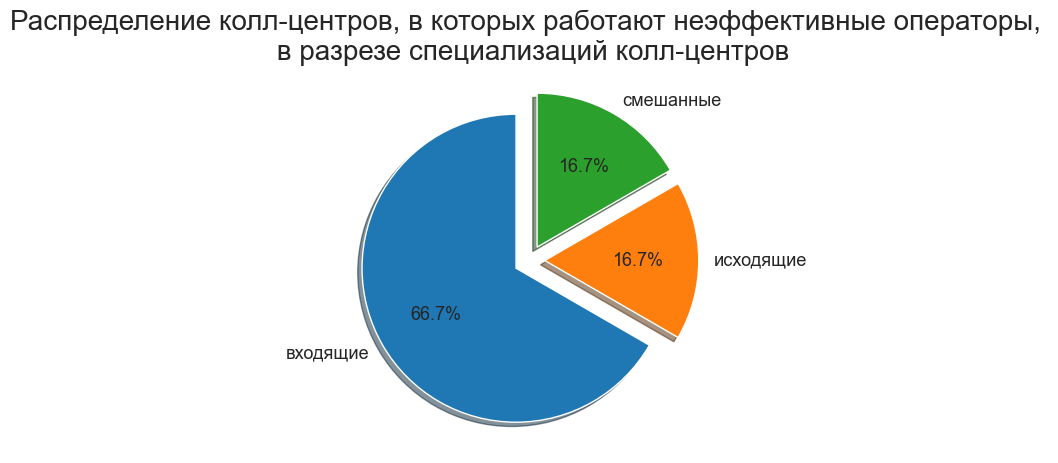

In [144]:
table_for_pie_result_in = table_for_pie_result_in.reset_index()
plt.figure(figsize=(15, 5))
ax = plt.pie(table_for_pie_result_in['operator_id'],\
             labels=table_for_pie_result_in['specialty'],\
             startangle=90, explode=[0.1,0.1,0.1],
       shadow=True, autopct='%2.1f%%',\
             textprops={'fontsize': 13})
plt.title('Распределение колл-центров, в которых работают неэффективные операторы, \n в разрезе специализаций колл-центров',\
          fontsize = 20)   
plt.show()

## По направлению исходящих звонков.

### Доля внутренних исходящих звонков от общего количества исходящих звонков оператора (выше первого квартиля).

В пункте 4.1.6.4 установили пороговое значение, свыше которого доля внутренних исходящих звонков уже может свидетельствовать о неэффективности оператора, на уровне верхней границы графика (свыше 17%). Кроме того, выявили 16 колл-центров, у которых данный показатель не выполняется.

Посмотрим количество операторов, у которых доля внутренних исходящих звонков от суммарного количества исходящих звонков превышает 17%.

In [145]:
is_internal_operators_out = operators_data.loc[operators_data['direction'] == 'out']\
                                  .groupby(['operator_id', 'user_id', 'specialty', 'direction'])\
                                  .agg({'calls_count':'sum'}).reset_index()
is_internal_operators_out_sub = dataset.loc[(dataset['direction'] == 'out')&(dataset['internal'] == True)]\
                     .groupby(['operator_id', 'user_id', 'specialty', 'direction']).agg({'calls_count':'sum'}).reset_index()
is_internal_operators_out_sub = is_internal_operators_out_sub[['operator_id', 'calls_count']]
is_internal_operators_out = is_internal_operators_out.merge(is_internal_operators_out_sub, on='operator_id')

is_internal_operators_out['ratio_internal'] = round(is_internal_operators_out['calls_count_y']/\
                                             is_internal_operators_out['calls_count_x']*100, 2)

is_internal_operators_out_result = is_internal_operators_out.loc[is_internal_operators_out['ratio_internal'] > 17.00]\
.sort_values(by='ratio_internal', ascending=False)
#display(is_internal_operators_out_result)

print('Всего операторов, у которых доля внутренних исходящих звонков более 17%, ',\
     len(operators_all_in_result), 'операторов.')

Всего операторов, у которых доля внутренних исходящих звонков более 17%,  14 операторов.


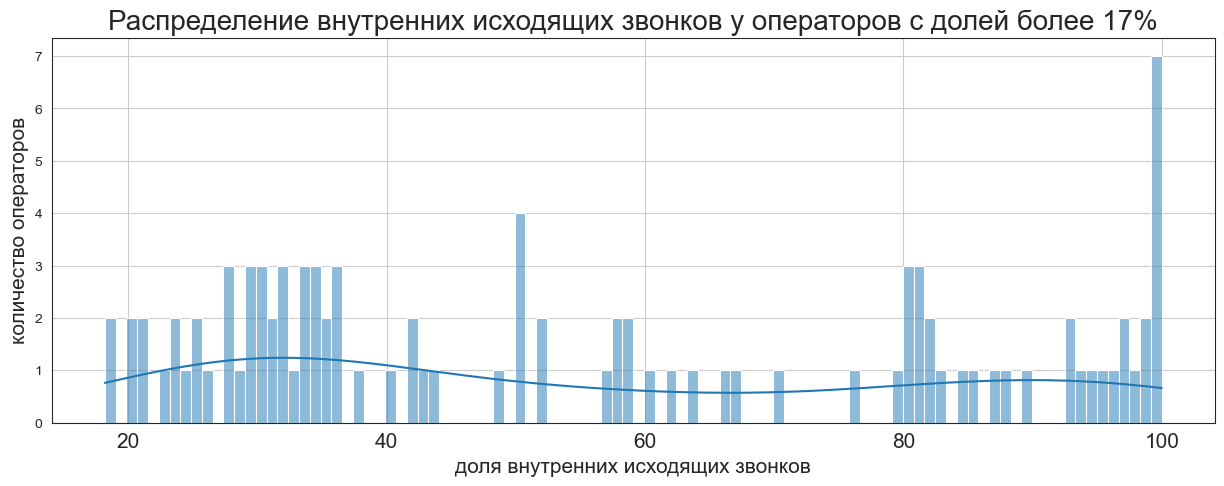

Количество операторов, у которых доля внутренних исходящих звонков выше 17% от общего количества исходящих звонков 98 операторов.
Количество колл-центров, в которых работают операторы, с долей внутренних исходящих звонков выше 17% 34 организации.


In [146]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(is_internal_operators_out_result['ratio_internal'], kde=True, bins=98)
        
sns.set_style('white')
plt.title('Распределение внутренних исходящих звонков у операторов с долей более 17%',\
          fontsize = 20)
plt.xlabel(' ', fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('доля внутренних исходящих звонков', fontsize = 15)
plt.ylabel('количество операторов', fontsize = 15)
plt.grid(True)
plt.show()

print('Количество операторов, у которых доля внутренних исходящих звонков выше 17% от общего количества исходящих звонков',\
     is_internal_operators_out_result['operator_id'].nunique(), 'операторов.')
print('Количество колл-центров, в которых работают операторы, с долей внутренних исходящих звонков выше 17%',\
     is_internal_operators_out_result['user_id'].nunique(), 'организации.')

На гистограмме видно, что у большинства операторов (7 человек) доля внутренних исходящих звонков составляет 100%. Значительная доля внутренних звонков (более 80%) у единичного количества операторов.

Также есть есть колл-центры, в которых более одного оператора, у которого идёт превышение порогового значения критерия.

In [147]:
is_internal_operators_users_group = is_internal_operators_out_result.groupby('user_id').agg({'operator_id':'count'})\
.sort_values(by='operator_id', ascending=False)
is_internal_operators_users_group.loc[is_internal_operators_users_group['operator_id'] > 1]

print\
('Количество колл-центров, в которых работают операторы, у которых доля внутренних исходящих звонков более 17%',\
 len(is_internal_operators_users_group.loc[is_internal_operators_users_group['operator_id'] > 1]), 'колл-центров.')

Количество колл-центров, в которых работают операторы, у которых доля внутренних исходящих звонков более 17% 16 колл-центров.


Здесь особенное внимание стоит обратить на колл-центры со значительным количеством операторов, не выполняющих показатель "Доля внутренних исходящих звонков от общего количества исходящих звонков не более 17%".

В пункте 4.1.6.4 выявлено 16 колл-центрах, в которых доля внутренних исходящих звонков от количества исходящих звонков превышает пороговое значение в 17%. Посмотрим работают ли в данных организациях выявленные 98 операторов.

In [148]:
is_missed_users_in_result['level_in_miss'] = True
is_missed_users_in_result_sub = is_missed_users_in_result[['user_id', 'level_in_miss']]

is_missed_operators_in_result = is_missed_operators_in_result.merge(is_missed_users_in_result_sub, on='user_id', how='left')

In [149]:
internal_users_out_result['level_out_internal'] = True
internal_users_out_result_sub = internal_users_out_result[['user_id', 'level_out_internal']]
is_internal_operators_out_result = is_internal_operators_out_result\
.merge(internal_users_out_result_sub, on='user_id', how='left')
print('Количество операторов, работающих в колл-центрах, у которых доля внутренних исходящих звонков более 17%',\
      is_internal_operators_out_result['level_out_internal'].sum(), 'операторов.')

Количество операторов, работающих в колл-центрах, у которых доля внутренних исходящих звонков более 17% 71 операторов.


Создадим таблицу, в которой укажем, что операторы не выполняют показатель "Доля внутренних исходящих звонков от общего количества исходящих звонков не более 17%".

In [150]:
is_internal_operators_out_result['Показатель_1'] = 1
operators_out_result_1 = is_internal_operators_out_result[['operator_id', 'user_id', 'specialty', 'direction',\
                                                           'ratio_internal', 'level_out_internal', 'Показатель_1']]

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
operators_out_result_1_1 = operators_out_result_1.copy()
operators_out_result_1_1.columns = ['идентификатор оператора', 'идентификатор колл-центра',\
                                    'специализация колл-центра', 'направление звонков',\
                                    'доля внутренних исходящих звонков', 'невыполнение показателя колл-центром',\
                                    'невыполнение показателя']

(operators_out_result_1_1.head(3)
 .style
 .format('{0:,.0f}', subset=['идентификатор оператора', 'идентификатор колл-центра'])
 .format('{0:,.2f}', subset=['доля внутренних исходящих звонков'])
 .set_caption('Сведения о невыполнении операторами показателя №1')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,идентификатор оператора,идентификатор колл-центра,специализация колл-центра,направление звонков,доля внутренних исходящих звонков,невыполнение показателя колл-центром,невыполнение показателя
0,"914,440","167,412",входящие,out,100.00,nan,1
1,"907,986","167,176",смешанные,out,100.00,True,1
2,"907,994","167,176",смешанные,out,100.00,True,1


### Длительность исходящего звонка оператора не более пяти минут (выше верхней границы графика боксплот).

В пункте 4.1.7.4 установили пороговое значение для допустимой максимальной длительности одного исходящего звонка в 300 секунд или 5 минут (верхняя граница графика боксплот). Кроме того, выявили 26 колл-центров, у которых данный показатель не выполняется.

Посмотрим количество операторов, у которых длительность одного исходящего звонка превышает 5 минут.

In [151]:
duration_operators_out = operators_data.loc[operators_data['direction'] == 'out']\
                                  .groupby(['operator_id', 'user_id', 'specialty', 'direction'])\
                                  .agg({'one_call_duration':'mean'}).reset_index()
duration_operators_out['one_call_duration'] = round(duration_operators_out['one_call_duration'], 0)

duration_operators_out_ceiling = duration_operators_out.loc[duration_operators_out['one_call_duration'] > 300.00]\
.sort_values(by='one_call_duration', ascending=False)
#duration_operators_out_ceiling

print('Всего операторов, у которых длительность исходящего звонка более 5 минут, ',\
     len(duration_operators_out_ceiling), 'операторов.')

Всего операторов, у которых длительность исходящего звонка более 5 минут,  5 операторов.


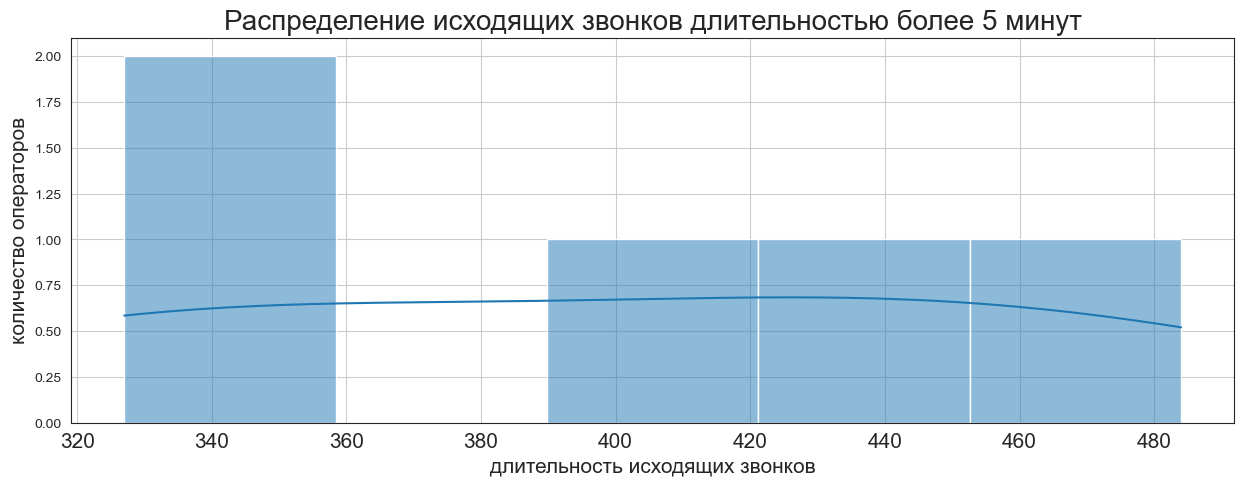

Количество операторов, у которых длительность одного исходящего звонка превышает 5 минут, 5 операторов.
Количество колл-центров, в которых работают операторы, у которых длительность одного исходящего звонка превышает 5 минут, 3 организаций.


In [152]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(duration_operators_out_ceiling['one_call_duration'], kde=True, bins=5)
        
sns.set_style('white')
plt.title('Распределение исходящих звонков длительностью более 5 минут',\
          fontsize = 20)
plt.xlabel(' ', fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('длительность исходящих звонков', fontsize = 15)
plt.ylabel('количество операторов', fontsize = 15)
plt.grid(True)
plt.show()

print('Количество операторов, у которых длительность одного исходящего звонка превышает 5 минут,',\
     duration_operators_out_ceiling['operator_id'].nunique(), 'операторов.')
print\
('Количество колл-центров, в которых работают операторы, у которых длительность одного исходящего звонка превышает 5 минут,',\
     duration_operators_out_ceiling['user_id'].nunique(), 'организаций.')

Также есть есть колл-центры, в которых более одного оператора, у которого идёт превышение порогового значения критерия.

In [153]:
duration_operators_out_ceiling_group = duration_operators_out_ceiling.groupby('user_id').agg({'operator_id':'count'})\
.sort_values(by='operator_id', ascending=False)
duration_operators_out_ceiling_group.loc[duration_operators_out_ceiling_group['operator_id'] > 1]

print\
('Количество колл-центров, в которых работают операторы, у которых длительность одного исходящего звонка превышает 5 минут,',\
 len(duration_operators_out_ceiling_group.loc[duration_operators_out_ceiling_group['operator_id'] > 1]), 'колл-центра.')

Количество колл-центров, в которых работают операторы, у которых длительность одного исходящего звонка превышает 5 минут, 2 колл-центра.


В пункте 4.1.7.4 выявлено 26 колл-центров, в которых длительность одного входящего звонка превышает пороговое значение в 5 минут. Посмотрим работают ли в данных организациях выявленные 2 оператора.

In [154]:
one_call_duration_ceiling_out_sub = one_call_duration_ceiling[['user_id', 'level_duration_ceiling']]
duration_operators_out_ceiling = duration_operators_out_ceiling.merge(one_call_duration_ceiling_out_sub,\
                                                                      on='user_id', how='left')
duration_operators_out_ceiling
print('Количество операторов, работающих в колл-центрах, в которых длительность одного исходящего звонка превышает 5 минут,',\
      duration_operators_out_ceiling['level_duration_ceiling'].sum(), 'операторов.')

Количество операторов, работающих в колл-центрах, в которых длительность одного исходящего звонка превышает 5 минут, 5 операторов.


Создадим таблицу, в которой укажем, что операторы не выполняют показатель "Длительность одного исходящего звонка оператора не превышает 5 минут".

In [155]:
duration_operators_out_ceiling['Показатель_2'] = 1
duration_operators_out_ceiling_1 = duration_operators_out_ceiling[['operator_id', 'user_id', 'specialty', 'direction',\
                                                   'one_call_duration', 'Показатель_2']]

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
duration_operators_out_ceiling_1_1 = duration_operators_out_ceiling_1.copy()
duration_operators_out_ceiling_1_1.columns = ['идентификатор оператора', 'идентификатор колл-центра',\
                                    'специализация колл-центра', 'направление звонков',\
                                    'длительность одного исходящего звонка',\
                                    'невыполнение показателя']

(duration_operators_out_ceiling_1_1.head(3)
 .style
 .format('{0:,.0f}', subset=['идентификатор оператора', 'идентификатор колл-центра', 'длительность одного исходящего звонка'])
 .set_caption('Сведения о невыполнении операторами показателя №2')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,идентификатор оператора,идентификатор колл-центра,специализация колл-центра,направление звонков,длительность одного исходящего звонка,невыполнение показателя
0,"918,390","167,455",исходящие,out,484,1
1,"891,154","166,658",исходящие,out,444,1
2,"890,232","166,520",исходящие,out,409,1


### Длительность исходящего звонка оператора не менее одной минуты (выше первого квартиля).

В пункте 4.1.7.4 установили пороговое значение для допустимой минимальной длительности одного исходящего звонка в 60 секунд или 1 минуту (первый квартиль). Кроме того, выявили 124 колл-центров, у которых данный показатель не выполняется.

Посмотрим количество операторов, у которых длительность одного исходящего звонка менее 1 минуты.

In [156]:
duration_operators_out_floor = duration_operators_out\
.loc[(duration_operators_out['one_call_duration'] < 60.00)&(duration_operators_out['one_call_duration'] > 0)]\
.sort_values(by='one_call_duration', ascending=True)
#display(duration_operators_out_floor)

print('Всего операторов, у которых длительность исходящего звонка менее 1 минуты, ',\
     len(duration_operators_out_floor), 'операторов.')

Всего операторов, у которых длительность исходящего звонка менее 1 минуты,  299 операторов.


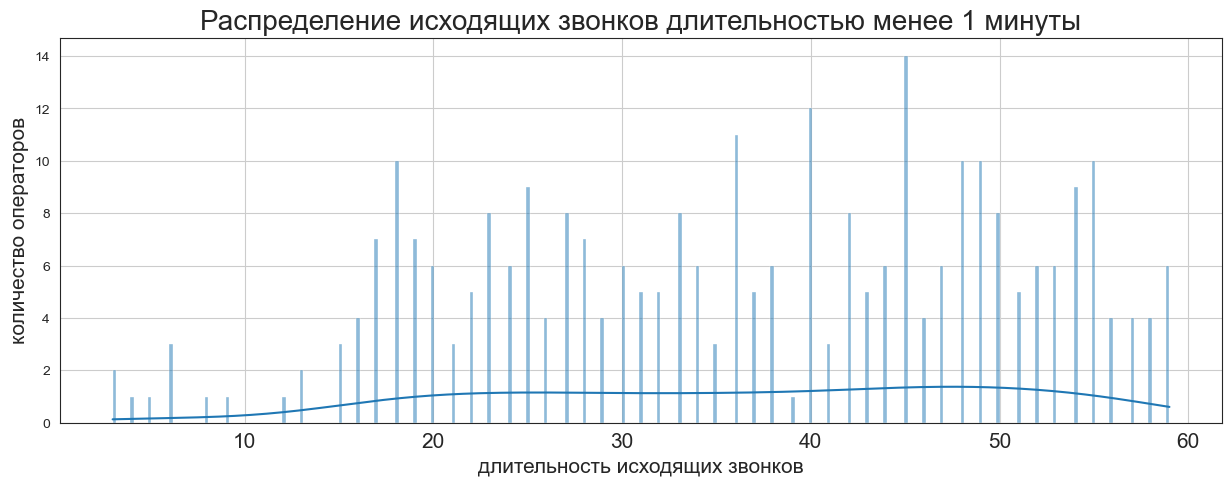

Количество операторов, у которых длительность одного исходящего звонка менее 1 минуты, 299 операторов.
Количество колл-центров, в которых работают операторы, у которых длительность одного исходящего звонка менее 1 минуты, 107 организаций.


In [157]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(duration_operators_out_floor['one_call_duration'], kde=True, bins=299)
        
sns.set_style('white')
plt.title('Распределение исходящих звонков длительностью менее 1 минуты',\
          fontsize = 20)
plt.xlabel(' ', fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('длительность исходящих звонков', fontsize = 15)
plt.ylabel('количество операторов', fontsize = 15)
plt.grid(True)
plt.show()

print('Количество операторов, у которых длительность одного исходящего звонка менее 1 минуты,',\
     duration_operators_out_floor['operator_id'].nunique(), 'операторов.')
print\
('Количество колл-центров, в которых работают операторы, у которых длительность одного исходящего звонка менее 1 минуты,',\
     duration_operators_out_floor['user_id'].nunique(), 'организаций.')

Также есть есть колл-центры, в которых более одного оператора, у которого идёт недостижение порогового значения критерия.

In [158]:
duration_operators_out_floor_group = duration_operators_out_floor.groupby('user_id').agg({'operator_id':'count'})\
.sort_values(by='operator_id', ascending=False)
print('Количество колл-центров, в которых работают более одного оператора, не выполняющих показатель',\
      len(duration_operators_out_floor_group.loc[duration_operators_out_floor_group['operator_id'] > 1]), 'колл-центра.')

Количество колл-центров, в которых работают более одного оператора, не выполняющих показатель 52 колл-центра.


В пункте 4.1.7.4 выявлено 124 колл-центра, в которых длительность одного входящего звонка не достигает порогового значения в 1 минуту. Посмотрим работают ли в данных организациях выявленные 299 операторов.

In [159]:
duration_operators_out_floor = duration_operators_out_floor.merge(one_call_duration_floor_sub, on='user_id', how='left')

print('Количество операторов, работающих в колл-центрах, в которых длительность одного исходящего звонка менее 1 минуты,',\
      duration_operators_out_floor['level_duration_floor'].sum(), 'оператор.')

Количество операторов, работающих в колл-центрах, в которых длительность одного исходящего звонка менее 1 минуты, 281 оператор.


Создадим таблицу, в которой укажем, что операторы не выполняют показатель "Длительность одного исходящего звонка оператора не менее 1 минуты".

In [160]:
duration_operators_out_floor['Показатель_3'] = 1
duration_operators_out_floor_1 = duration_operators_out_floor[['operator_id', 'user_id', 'specialty', 'direction',\
                                                 'one_call_duration', 'Показатель_3']]

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
duration_operators_out_floor_1_1 = duration_operators_out_floor_1.copy()
duration_operators_out_floor_1_1.columns = ['идентификатор оператора', 'идентификатор колл-центра',\
                                            'специализация колл-центра', 'направление звонков',\
                                            'длительность одного исходящего звонка',\
                                            'невыполнение показателя']

(duration_operators_out_floor_1_1.head(3)
 .style
 .format('{0:,.0f}', subset=['идентификатор оператора', 'идентификатор колл-центра', 'длительность одного исходящего звонка'])
 .set_caption('Сведения о невыполнении операторами показателя №3')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,идентификатор оператора,идентификатор колл-центра,специализация колл-центра,направление звонков,длительность одного исходящего звонка,невыполнение показателя
0,"935,548","168,101",входящие,out,3,1
1,"921,062","167,445",смешанные,out,3,1
2,"940,952","168,275",входящие,out,4,1


### Доля исходящих звонков оператора колл-центра, специализирующегося на обзвоне клиентов, не менее 70%.

В пункте 4.1.3 колл-центры категоризированы по специализациям: при доле звонков одного типа 70 и более процентов у колл-центра будет та или иная специализация (или входящие, или исходящие). При доле звонков менее 70 специализация будет смешанной.

В данном пункте рассмотрим долю исходящих звонков одного оператора, работающего в колл-центре, специализирующемся на обзвоне клиентов.

In [161]:
operators_all_out = operators_data.loc[operators_data['specialty'] == 'исходящие']\
                                    .groupby(['operator_id', 'user_id', 'specialty'])\
                                    .agg({'calls_count':'sum'})
operators_all_out = operators_all_out.reset_index()
operators_ratio = operators_data.loc[(operators_data['direction'] == 'out')&\
                                     (operators_data['specialty'] == 'исходящие')]\
                                    .groupby('operator_id')\
                                    .agg({'calls_count':'sum'})

operators_ratio = operators_ratio.reset_index()
operators_all_out = operators_all_out.merge(operators_ratio, on='operator_id')
operators_all_out['ratio'] = round(operators_all_out['calls_count_y'] / operators_all_out['calls_count_x']*100, 2)
operators_all_out.sort_values(by='ratio')
operators_all_out_result = operators_all_out.loc[operators_all_out['ratio'] < 70.00]

print('Всего операторов, у которых доля исходящих звонков менее 70%, ',\
     len(operators_all_in_result), 'операторов.')

Всего операторов, у которых доля исходящих звонков менее 70%,  14 операторов.


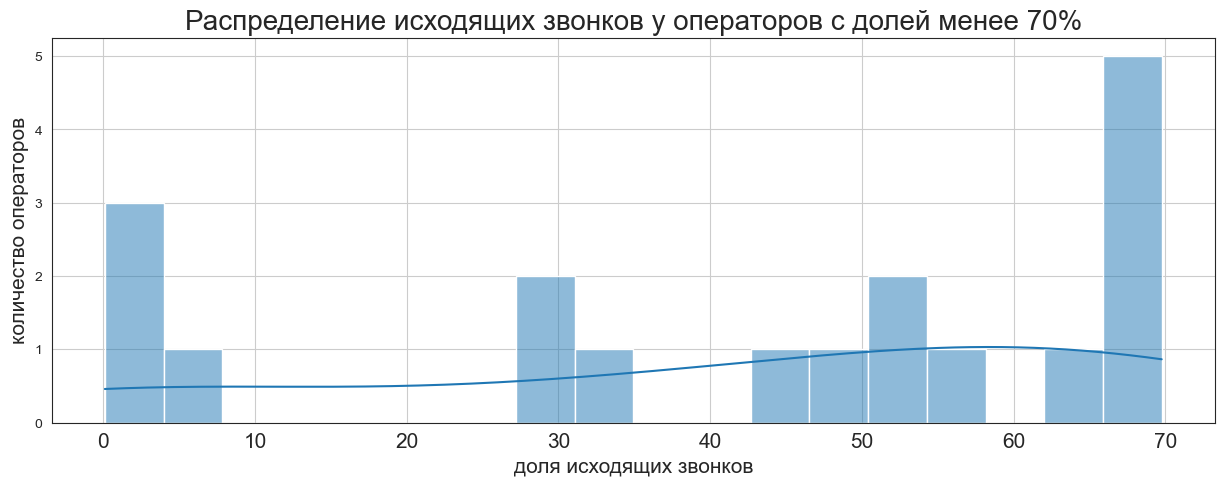

Количество операторов "исходящих" колл-центров, у которых доля входящих менее 70%, 18 операторов.
Количество "исходящих" колл-центров, в которых работают операторы, у которых доля входящих менее 70% 14 организаций.


In [162]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(operators_all_out_result['ratio'], kde=True, bins=18)

sns.set_style('white')
plt.title('Распределение исходящих звонков у операторов с долей менее 70%',\
          fontsize = 20)
plt.xlabel(' ', fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('доля исходящих звонков', fontsize = 15)
plt.ylabel('количество операторов', fontsize = 15)
plt.grid(True)
plt.show()

print('Количество операторов "исходящих" колл-центров, у которых доля входящих менее 70%,',\
     operators_all_out_result['operator_id'].nunique(), 'операторов.')
print\
('Количество "исходящих" колл-центров, в которых работают операторы, у которых доля входящих менее 70%',\
     operators_all_out_result['user_id'].nunique(), 'организаций.')

Создадим таблицу, в которой укажем, что операторы не выполняют показатель "Доля исходящих звонков оператора "исходящего" колл-центра составляет не менее 70%".

In [163]:
operators_all_out_result['Показатель_4'] = 1
operators_all_out_result_1 = operators_all_out_result[['operator_id', 'user_id', 'specialty', 'ratio',\
                                                     'Показатель_4']]

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
operators_all_out_result_1_1 = operators_all_out_result_1.copy()
operators_all_out_result_1_1.columns = ['идентификатор оператора', 'идентификатор колл-центра', 'специализация колл-центра', \
                                        'доля исходящих звонков', 'невыполнение показателя']

(operators_all_out_result_1_1.head(3)
 .style
 .format('{0:,.0f}', subset=['идентификатор оператора', 'идентификатор колл-центра'])
 .format('{0:,.2f}', subset=['доля исходящих звонков'])
 .set_caption('Сведения о невыполнении операторами показателя №4')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,идентификатор оператора,идентификатор колл-центра,специализация колл-центра,доля исходящих звонков,невыполнение показателя
10,"887,276","166,485",исходящие,67.52,1
17,"890,402","166,658",исходящие,69.75,1
44,"896,708","166,941",исходящие,69.72,1


### Вывод по направлению исходящих звонков (выявление неэффективных операторов).

По направлению входящих звонков разработаны четыре показателя, характеризующие эффективность работы операторов.
1. Доля внутренних исходящих звонков от общего количества исходящих звонков оператора (выше первого квартиля) - не более 17%.
2. Длительность исходящего звонка оператора (выше верхней границы графика боксплот) - не более 5 минут.
3. Длительность исходящего звонка оператора (выше первого квартиля) - не менее 1 минуты.
4. Доля исходящих звонков оператора колл-центра, специализирующегося на обзвоне клиентов, - не менее 70%.

Определим, что неэффективный оператор, тот оператор, который суммарно не выполнил минимум два из четырёх показателей.

Для этого создадим сводную таблицу с данными по показателям.

In [164]:
#добавим в таблицу столбец с направлением звонка для дальнейшего объединения
operators_all_out_result_1['direction'] = 'out'

#создадим таблицы для итоговой таблицы по показателям
parameter_1 = operators_out_result_1[['operator_id', 'user_id', 'specialty', 'direction', 'Показатель_1']]
parameter_2 = duration_operators_out_ceiling_1[['operator_id', 'user_id', 'specialty', 'direction', 'Показатель_2']]
parameter_3 = duration_operators_out_floor_1[['operator_id', 'user_id', 'specialty', 'direction', 'Показатель_3']]
parameter_4 = operators_all_out_result_1[['operator_id', 'user_id', 'specialty', 'direction', 'Показатель_4']]

In [165]:
result_parameters_out = parameter_1.merge(parameter_2, on=['operator_id', 'user_id', 'specialty', 'direction'], how='outer')\
.merge(parameter_3, on=['operator_id', 'user_id', 'specialty', 'direction'], how='outer')\
.merge(parameter_4, on=['operator_id', 'user_id', 'specialty', 'direction'], how='outer')

#заполним пропуски в столбцах с показателями False
list_columns = ['Показатель_1', 'Показатель_2', 'Показатель_3', 'Показатель_4']

for i in list_columns:
    result_parameters_out[i] = result_parameters_out[i].fillna(0)
    
#добавим столбец с суммарным весом всех показателей по каждому оператору
result_parameters_out['total_score'] = result_parameters_out['Показатель_1'] + result_parameters_out['Показатель_2'] +\
result_parameters_out['Показатель_3'] + result_parameters_out['Показатель_4']

#отсортируем итоговую таблицу по убывания общего суммарного веса всех показателей
result_parameters_out.sort_values(by='total_score', ascending=False)

#выведем список неэффективных операторов
result_parameters_out = result_parameters_out.loc[result_parameters_out['total_score'] > 1]
#display(result_parameters_out)

#следующий код для вывода таблицы, копирование, чтобы в дальнейшем, если понадобится,
#использовать таблицу с оригинальными названиями, как в исходном датасете
result_parameters_out_1 = result_parameters_out.copy()
result_parameters_out_1.columns = ['идентификатор оператора', 'идентификатор колл-центра',\
                                  'специализация колл-центра', 'направление звонков',\
                                  'показатель №1', 'показатель №2', 'показатель №3', 'показатель №4',\
                                  'количество невыполненных показателей']

(result_parameters_out_1.head(3)
 .style
 .format('{0:,.0f}', subset=['идентификатор оператора', 'идентификатор колл-центра',\
                            'показатель №1', 'показатель №2', 'показатель №3', 'показатель №4',\
                            'количество невыполненных показателей'])
 .set_caption('Сведения о неэффективных операторах показателей по исходящим звонкам')
 .set_table_styles([{'selector': 'caption', 
                    'props': [('color', 'black'), ('text-align','center'), ('font-size', '22px')]
                    }])
)

,идентификатор оператора,идентификатор колл-центра,специализация колл-центра,направление звонков,показатель №1,показатель №2,показатель №3,показатель №4,количество невыполненных показателей
1,"907,986","167,176",смешанные,out,1,0,1,0,2
2,"907,994","167,176",смешанные,out,1,0,1,0,2
3,"893,172","166,803",входящие,out,1,0,1,0,2


In [166]:
print('Количество неэффективных операторов по направления исходящих звонков составляет',\
     result_parameters_out['operator_id'].nunique(), 'операторов или',\
      '{0:.2%}'.format(result_parameters_out['operator_id'].nunique()/operators_data['operator_id'].nunique()))
print('Количество колл-центров, в которых работают неэффективные операторы по направления исходящих звонков составляет',\
     result_parameters_out['user_id'].nunique(), 'организаций.')

Количество неэффективных операторов по направления исходящих звонков составляет 65 операторов или 11.48%
Количество колл-центров, в которых работают неэффективные операторы по направления исходящих звонков составляет 28 организаций.


In [167]:
#создадим таблицу для построения графика распределения колл-центров,
#в которых работают неэффективные операторы, по специализациям
table_for_pie_result_out = result_parameters_out.groupby('specialty').agg({'operator_id':'count'})
table_for_pie_result_out['ratio'] = round(table_for_pie_result_out['operator_id']/\
                                         table_for_pie_result_out['operator_id'].sum()*100, 2)

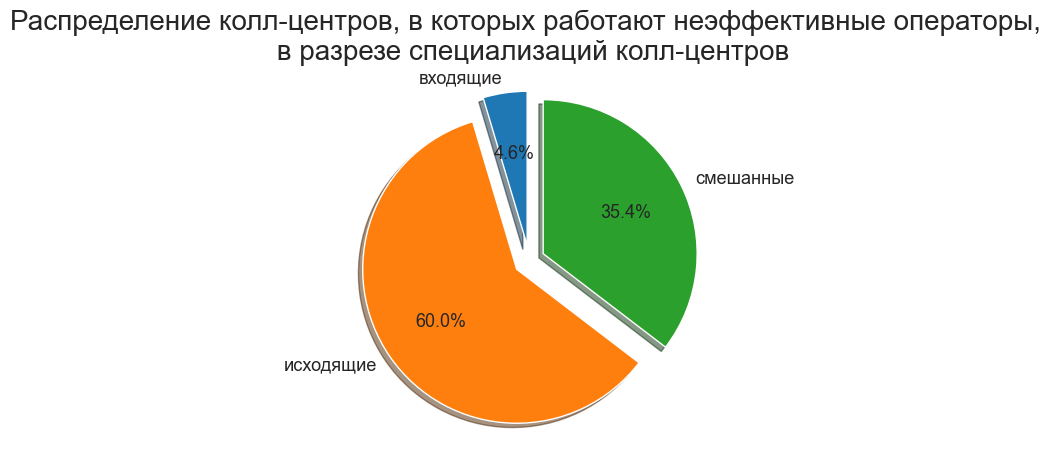

In [168]:
table_for_pie_result_out = table_for_pie_result_out.reset_index()
plt.figure(figsize=(15, 5))
ax = plt.pie(table_for_pie_result_out['operator_id'],\
             labels=table_for_pie_result_out['specialty'],\
             startangle=90, explode=[0.1,0.1,0.1],
       shadow=True, autopct='%2.1f%%',\
             textprops={'fontsize': 13})
plt.title('Распределение колл-центров, в которых работают неэффективные операторы, \n в разрезе специализаций колл-центров',\
          fontsize = 20)   
plt.show()

## Вывод по пункту 5.

Расчёты при определении критериев (показателей) неэффективности операторов проводились с учётом следующих аспектов:
   - абсолютное количество звонков с выбранными характеристиками (входящие, исходящие) более 50 звонков в целом у колл-центра и более 10 звонков в целом у оператора;
   - количество дней работы оператора, по которым есть данные, более 5 дней.

Количество операторов, по данным о работе которых проводится анализ неэффективности 566 операторов (52% от общего числа операторов (1 078)).

1. **По направлению входящих звонков.**

        Разработаны пять критериев (показателей), характеризиющие неэффективность операторов. При невыполнении трёх их пяти критериев оператор признаётся неэффективным.
        Выявлены 6 неэффективных операторов, работающих в 5 колл-центрах. То есть доля неэффективных операторов от всего количества операторов, на основе данных о работе которых проводился анализ, составляет 1%.
        67% неэффективных операторов работают в колл-центрах, специализирующихся на приёме звонков.
2. **По направлению исходящих звонков.**
    
        Разработаны четыре критерия (показателя), характеризиющие неэффективность операторов. При невыполнении двух их четырёх критериев оператор признаётся неэффективным.
        Выявлены 65 неэффективных операторов, работающих в 28 колл-центрах. То есть доля неэффективных операторов от всего количества операторов, на основе данных о работе которых проводился анализ, составляет почти 13%.
        60% неэффективных операторов работают в колл-центрах, специализирующихся на обзвоне клиентов.

# Проверка статических гипотез.

## Средняя длительность одного звонка без учёта времени ожидания не зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип).

    H_0: Среднее время ожидания у клиентов не зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип).
    H_1: Среднее время ожидания у клиентов зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип).

    Так как у нас множественное тестирование гипотез (три сравнения), то необходимо в целях снижения групповой вероятности ошибки первого рода (FWER) применить один из методов корректировки уровня значимости. Так как метод Бонферрони грубая поправка, применим метод Шидака.

In [169]:
alpha = 1 - (1 - 0.05)**1/3

In [170]:
# results = вызов метода для проверки гипотезы
results = stats.ttest_ind(dataset[dataset['specialty'] == 'входящие']['one_call_duration'],\
                          dataset[dataset['specialty'] == 'исходящие']['one_call_duration'], \
                          equal_var=False)
# alpha = задайте значение уровня значимости
alpha = alpha
# вывод значения p-value на экран
print('Гипотеза: средняя длительность одного звонка не зависит от специализации колл-центра: "входящие" и "исходящие".')
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

Гипотеза: средняя длительность одного звонка не зависит от специализации колл-центра: "входящие" и "исходящие".
4.144676479084717e-21
Отвергаем нулевую гипотезу.


Получается, что средняя длительность одного звонка без учёта времени ожидания различается у "входящих" и "исходящих" колл-центров.

Перейдём к следующему тестированию гипотезы.

In [171]:
# results = вызов метода для проверки гипотезы
results = stats.ttest_ind(dataset[dataset['specialty'] == 'входящие']['one_call_duration'],\
                          dataset[dataset['specialty'] == 'смешанные']['one_call_duration'], \
                          equal_var=False)
# alpha = задайте значение уровня значимости
alpha = alpha
# вывод значения p-value на экран
print('Гипотеза: средняя длительность одного звонка не зависит от специализации колл-центра: "входящие" и "смешанные".')
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

Гипотеза: средняя длительность одного звонка не зависит от специализации колл-центра: "входящие" и "смешанные".
8.271410020637457e-07
Отвергаем нулевую гипотезу.


Получается, что средняя длительность одного звонка без учёта времени ожидания различается у "входящих" и "смешанных" колл-центров.

Перейдём к следующему тестированию гипотезы.

In [172]:
# results = вызов метода для проверки гипотезы
results = stats.ttest_ind(dataset[dataset['specialty'] == 'исходящие']['one_call_duration'],\
                          dataset[dataset['specialty'] == 'смешанные']['one_call_duration'], \
                          equal_var=False)
# alpha = задайте значение уровня значимости
alpha = alpha
# вывод значения p-value на экран
print('Гипотеза: средняя длительность одного звонка не зависит от специализации колл-центра: "исходящие" и "смешанные".')
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

Гипотеза: средняя длительность одного звонка не зависит от специализации колл-центра: "исходящие" и "смешанные".
2.2149124773460479e-10
Отвергаем нулевую гипотезу.


Получается, что средняя длительность одного звонка без учёта времени ожидания различается у "исходящих" и "смешанных" колл-центров.

Таким образом, нулевая гипотеза "Средняя длительность одного звонка без учёта времени ожидания не зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип)" отвергнута.

## Доля пропущенных входящих звонков не зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип).¶

    Здесь будем проверять гипотезу о равенстве долей. Также применим к уровню значимости метод Шидака (так как у нас множественное тестирование гипотезы).

    H_0: Доля пропущенных входящих звонков не зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип).
    H_1: Доля пропущенных входящих звонков зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип).

In [173]:
from statsmodels.stats.proportion import proportions_ztest

# alpha = задайте значение уровня значимости
alpha = alpha

stat, p_value = proportions_ztest([dataset.loc[(dataset['specialty'] == 'входящие')&(dataset['direction'] == 'in')]\
                                   ['is_missed_call'].sum(),\
                                   dataset.loc[(dataset['specialty'] == 'исходящие')&(dataset['direction'] == 'in')]\
                                   ['is_missed_call'].sum()],\
                                  [len(dataset.loc[(dataset['specialty'] == 'входящие')&(dataset['direction'] == 'in')]),\
                                   len(dataset.loc[(dataset['specialty'] == 'исходящие')&(dataset['direction'] == 'in')])],\
                                       alternative='two-sided')

print('Гипотеза: доля пропущенных звонков не зависит от специализации колл-центра.')
print(p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Гипотеза: доля пропущенных звонков не зависит от специализации колл-центра.
0.12221323443915645
Отвергаем нулевую гипотезу


Получается, что доля пропущенных входящих звонков различается у "входящих" и "исходящих" колл-центров.

Перейдём к следующему тестированию гипотезы.

In [174]:
# alpha = задайте значение уровня значимости
alpha = alpha

stat, p_value = proportions_ztest([dataset.loc[(dataset['specialty'] == 'входящие')&(dataset['direction'] == 'in')]\
                                   ['is_missed_call'].sum(),\
                                   dataset.loc[(dataset['specialty'] == 'смешанные')&(dataset['direction'] == 'in')]\
                                   ['is_missed_call'].sum()],\
                                  [len(dataset.loc[(dataset['specialty'] == 'входящие')&(dataset['direction'] == 'in')]),\
                                   len(dataset.loc[(dataset['specialty'] == 'смешанные')&(dataset['direction'] == 'in')])],\
                                       alternative='two-sided')

print('Гипотеза: доля пропущенных звонков не зависит от специализации колл-центра.')
print(p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Гипотеза: доля пропущенных звонков не зависит от специализации колл-центра.
2.930696543411625e-60
Отвергаем нулевую гипотезу


Получается, что доля пропущенных входящих звонков различается у "входящих" и "смешанных" колл-центров.

Перейдём к следующему тестированию гипотезы.

In [175]:
# alpha = задайте значение уровня значимости
alpha = alpha

stat, p_value = proportions_ztest([dataset.loc[(dataset['specialty'] == 'исходящие')&(dataset['direction'] == 'in')]\
                                   ['is_missed_call'].sum(),\
                                   dataset.loc[(dataset['specialty'] == 'смешанные')&(dataset['direction'] == 'in')]\
                                   ['is_missed_call'].sum()],\
                                  [len(dataset.loc[(dataset['specialty'] == 'исходящие')&(dataset['direction'] == 'in')]),\
                                   len(dataset.loc[(dataset['specialty'] == 'смешанные')&(dataset['direction'] == 'in')])],\
                                       alternative='two-sided')

print('Гипотеза: доля пропущенных звонков не зависит от специализации колл-центра.')
print(p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Гипотеза: доля пропущенных звонков не зависит от специализации колл-центра.
1.8230144266206398e-41
Отвергаем нулевую гипотезу


Получается, что доля пропущенных входящих звонков различается у "исходящих" и "смешанных" колл-центров.

Таким образом, нулевая гипотеза "Доля пропущенных входящих звонков не зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип)" отвергнута.

## Вывод по пункту 6.
    
    Проводилось тестирование двух гипотез:
    1. Средняя длительность одного звонка без учёта времени ожидания не зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип).
    2. Доля пропущенных входящих звонков не зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип).
    
    Так как проводилось множественное тестирование гипотез в целях снижения групповой вероятности ошибки первого рода (FWER) применялся метод корректировки уровня значимости - метод Шидака.
    
    Обе гипотезы по результатам тестирования были отвергнуты. Следовательно:
        - средняя длительность одного звонка без учёта времени ожидания зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип);
        - доля пропущенных входящих звонков зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип).

# Вывод по проекту.
    
   **1. По результатам исследования данных о работе операторов колл-центров, зарегистрированных в сервисе компании "Нупозвони", разработана методология выявления неэффективных операторов отдельно по входящим и исходящим звонкам.**
    
    1.2. По направлению входящих звонков сформулированы пять показателей (критериев) оценки неэффективности работы операторов:
    - доля пропущенных входящих звонков от общего количества входящих звонков оператора (выше уровня нижней границы графика боксплот), - не более 2%;
    - длительность ожидания ответа оператора (выше третьего квартиля) - не более 24 секунд;
    - длительность входящего звонка оператора (выше верхней границы графика боксплот) - не более 5 минут;
    - длительность входящего звонка оператора (выше первого квартиля) - не менее 1 минуты;
    - доля входящих звонков оператора колл-центра, специализирующегося на приёме звонков, - не менее 70%.
    
    Установлено, что неэффективный оператор, тот оператор, который суммарно не выполнил минимум три из пяти показателей.

    Выявлены 6 (шесть) неэффективных операторов по направлению входящих звонков, работающих в 5 колл-центрах.
    66% неэффективных операторов работают в колл-центрах, специализирующихся на приёме звонков.
            
    2.2. По направлению исходящих звонков сформулированы пять показателей (критериев) оценки неэффективности работы операторов:
    - доля внутренних исходящих звонков от общего количества исходящих звонков оператора (выше первого квартиля) - не более 17%;
    - длительность исходящего звонка оператора (выше верхней границы графика боксплот) - не более 5 минут;
    - длительность исходящего звонка оператора (выше первого квартиля) - не менее 1 минуты;
    - доля исходящих звонков оператора колл-центра, специализирующегося на обзвоне клиентов, - не менее 70%.
    
    Установлено, что неэффективный оператор, тот оператор, который суммарно не выполнил минимум два из четырёх показателей.

    Выявлены 65 неэффективных операторов, работающих в 28 колл-центрах.
    60% неэффективных операторов работают в колл-центрах, специализирующихся на обзвоне клиентов.

   **2. Проводилось тестирование двух статистических гипотез.**
   
    1. Средняя длительность одного звонка без учёта времени ожидания не зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип).
    2. Доля пропущенных входящих звонков не зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип).
    
    Так как проводилось множественное тестирование гипотез в целях снижения групповой вероятности ошибки первого рода (FWER) применялся метод корректировки уровня значимости - метод Шидака.
    
    Обе гипотезы по результатам тестирования были отвергнуты. Следовательно:
        - средняя длительность одного звонка без учёта времени ожидания зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип);
        - доля пропущенных входящих звонков зависит от специализации колл-центра (обзвон клиентов, приём входящих звонков или смешанный тип).